<img src="https://gist.githubusercontent.com/nesnoj/6ee605cd3494fa6e3e848385c4afbe19/raw/a883b1bdc69c0c5bbb0b00ba92f43033aa86ec64/dingo_model.png" alt="DINGO Model" width="800"  align="center">

In [1]:
import warnings

from pandas.core.common import SettingWithCopyWarning

warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
%%capture

from ding0.core import NetworkDing0
from ding0.tools.logger import setup_logger
from ding0.tools.results import save_nd_to_pickle
from ding0.tools.plots import plot_mv_topology
from egoio.tools import db
from sqlalchemy.orm import sessionmaker
import oedialect

from ding0.tools import results # to load pickl file


# create new network
nd = NetworkDing0(name='network')


# set ID of MV grid district
mv_grid_districts = [40] # fn

In [3]:
import osmnx as ox

import networkx as nx 

import pandas as pd
from sqlalchemy import func              
from geoalchemy2.shape import to_shape 


from shapely.geometry import Point, Polygon, LineString



import folium

In [4]:
from config.config_lv_grids_osm import get_config_osm
from config.db_conn_local import create_session_osm 

from grid.lv_grid.routing import build_graph_from_ways, \
get_location_substation_at_pi, subdivide_graph_edges, \
get_mvlv_subst_loc_list, get_cluster_graph_and_nodes, \
add_mv_load_station_to_mvlv_subst_list

from grid.lv_grid.geo import convertCoords

from grid.lv_grid.parameterization import parameterize_by_load_profiles
#from grid.lv_grid.clustering import 

from grid.lv_grid.geo import get_Point_from_x_y, get_points_in_load_area, \
get_convex_hull_from_points

#### SET DING0 SETTINGS

In [5]:
# TODO set in config file
ding0_default=False
retain_all=False #  weil sonst graphen außerhalb des polys unverbunden zum graphen beibehalten werden

In [6]:
engine = db.connection(section='oedb_dialect', readonly=True)
session = sessionmaker(bind=engine)()

In [7]:
%%time

print('ding0_default', ding0_default)
if ding0_default:
    
    lv_stations, lv_grid_districts = nd.import_mv_grid_districts(session, mv_grid_districts_no=mv_grid_districts)

else:
    
    id_db, row, simp_graph, geo_load_area, buildings_w_loads_df, street_loads = nd.import_mv_grid_districts(
        session, ding0_default, mv_grid_districts_no=mv_grid_districts)
    
    #d_db, row, simp_graph, geo_load_area, buildings_w_loads_df, street_loads = nd.import_mv_grid_districts(
    #    session, ding0_default, mv_grid_districts_no=mv_grid_districts)

ding0_default False
found
bicycle_parking is not matched in config and will be categorized as leftover
bicycle_parking is not matched in config and will be categorized as leftover
Begin topologically simplifying the graph...
Simplified graph: 945 to 622 nodes, 1956 to 1310 edges
Wall time: 10.5 s


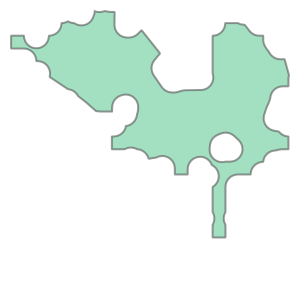

In [8]:
# la aggregated fn
geo_load_area

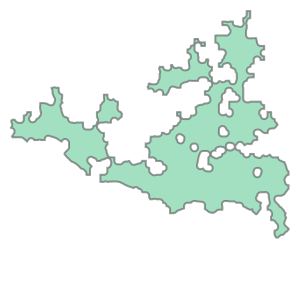

In [44]:
# la aggregated fn
geo_load_area

In [21]:
from shapely import wkt

In [53]:
%%time

geo_load_area = wkt.loads(u'POLYGON ((9.403330484845149 47.6685599815124, 9.403431006737179 47.6686146661229, 9.403595823320479 47.6687473706754, 9.40371954906438 47.6688991364868, 9.40374317738072 47.6689491749799, 9.403800322007751 47.6690386630232, 9.40382305214637 47.6690634777434, 9.404039756028309 47.6692760482326, 9.40410869974982 47.6693514433323, 9.4041378769556 47.669387213345, 9.404242065927029 47.6695524062175, 9.4042951641039 47.6697283660561, 9.404295013939359 47.6699079448049, 9.40424162098433 47.6700838473211, 9.4041371537503 47.6702489277306, 9.40398585569767 47.6703964797313, 9.40379387291194 47.6705205090494, 9.40356900445811 47.6706159769765, 9.40332038555019 47.6706790050902, 9.403264276812701 47.6706890053654, 9.40313426309654 47.6707074917854, 9.403051698091719 47.6707163183201, 9.40301432455558 47.670721538073, 9.402966254987099 47.6707331947153, 9.40296504534915 47.6707336760238, 9.40296398961387 47.6707343014007, 9.402963124783961 47.670735048927, 9.40296248117097 47.6707358924025, 9.402962081333079 47.6707368022639, 9.40296193928425 47.6707377466216, 9.402962060003221 47.6707386923763, 9.40297585916192 47.6707719482464, 9.40299121917945 47.6707955779927, 9.403222282236561 47.6711101533155, 9.40327411407006 47.6711903852134, 9.40329601219924 47.6712294023351, 9.403363614248949 47.6713982151605, 9.403381158027949 47.6715726988974, 9.403347967117449 47.671746131171, 9.40326531978458 47.6719118300498, 9.40313639980916 47.6720634114886, 9.40311627262046 47.6720824661541, 9.4031055877419 47.6720936609682, 9.403087338982569 47.672120582853, 9.403072030042519 47.6721633869779, 9.403067434331399 47.6721852730829, 9.403060226227479 47.6722099775711, 9.40304092129522 47.6722957742474, 9.403021260275899 47.6723600107007, 9.402998451239579 47.6724606734393, 9.402998718279649 47.6724925429713, 9.40300460150581 47.6725607837697, 9.403008918952009 47.6725882085804, 9.403022009005429 47.6726229439489, 9.40302260056613 47.672623791891, 9.40302341973001 47.6726245483282, 9.40302443660512 47.6726251856575, 9.40302561408522 47.6726256806224, 9.40306140909353 47.6726349267391, 9.403090548500369 47.6726427233874, 9.403191641533081 47.6726707167649, 9.403523573291441 47.6728039368073, 9.403565560986589 47.6728270197521, 9.40360971469531 47.6728534158537, 9.40367664695516 47.6728893974635, 9.40367789012886 47.6728898398982, 9.40367923330678 47.6728901181167, 9.40368062953357 47.6728902223928, 9.403732688641931 47.6728874971924, 9.40377225948005 47.6728815777084, 9.404294666681871 47.6727858848592, 9.40433484323149 47.6727770934591, 9.40438336135413 47.6727609110802, 9.404384453788831 47.6727603472766, 9.40438536532915 47.6727596518215, 9.404436816074931 47.6727004795622, 9.404467446471971 47.672661232239, 9.404501556532271 47.6726224458596, 9.404661089326449 47.67247704235, 9.40466229404649 47.672476150385, 9.404837004699891 47.6723681286687, 9.40485294602045 47.672359922111, 9.405048126681461 47.6722544211544, 9.405167797525969 47.6721968259815, 9.40521785266564 47.6721754745245, 9.405458496577459 47.6720947297135, 9.405718368174011 47.6720486804217, 9.405986661511839 47.6720392414579, 9.406096972532261 47.6720429865854, 9.40613217746257 47.6720420470428, 9.406147379096531 47.6720426574268, 9.406270659320761 47.6720320384316, 9.40627096451939 47.6720336560412, 9.4064337191598 47.6720198424299, 9.406682704960129 47.6720307721115, 9.406924189793431 47.6720732505146, 9.40714951297101 47.6721457541861, 9.40735059334666 47.6722456828322, 9.40752021911387 47.6723694525634, 9.40765230644503 47.6725126244131, 9.407742117698691 47.6726700635236, 9.407786431368381 47.6728361232925, 9.40778365767321 47.6730048478794, 9.407775452109959 47.6730570252479, 9.40776611054442 47.6738694312795, 9.407772104648281 47.6739141505194, 9.407772489069879 47.6739150321933, 9.407773120439529 47.6739158462484, 9.40777397449413 47.6739165614011, 9.40777501841273 47.6739171501683, 9.40777621207825 47.6739175899242, 9.407777509618651 47.6739178637691, 9.407907897514891 47.6739272611235, 9.408160813870809 47.6739627052708, 9.408398657126201 47.6740308335869, 9.40861228744979 47.6741290280625, 9.408793495333651 47.674253515299, 9.4089353170517 47.6743995114934, 9.40903230227322 47.6745614062515, 9.40908072354658 47.6747329781676, 9.4090925632342 47.6748212901316, 9.409092947685069 47.6748221718005, 9.409093579086599 47.6748229858476, 9.40909443317447 47.6748237009897, 9.40909547712646 47.6748242897441, 9.40909667082421 47.6748247294854, 9.40909796839442 47.6748250033145, 9.40916399510653 47.6748297611406, 9.410365353526521 47.6748362418672, 9.410431481128869 47.6748321969473, 9.4104327848148 47.6748319371506, 9.4104339884437 47.6748315103417, 9.410435045760631 47.6748309329226, 9.41043591613362 47.6748302270831, 9.41043656611463 47.6748294199484, 9.41043697072533 47.674828542536, 9.410443990270039 47.6747838935948, 9.41045328985359 47.6739714876552, 9.410447096676419 47.6739253013548, 9.41041327591287 47.6739062279101, 9.41025901486284 47.6738349163595, 9.41007440050979 47.6737060367544, 9.409931703001551 47.6735547634534, 9.409836708360711 47.6733872306201, 9.409793268125579 47.6732102316824, 9.409803143239371 47.6730309438463, 9.40981357388975 47.6729801871324, 9.40987726164494 47.6728041674334, 9.409992300411441 47.6726405116322, 9.41015393061412 47.6724959901137, 9.410355465366351 47.6723765816311, 9.410588567135321 47.6722872259917, 9.41084359265829 47.672231619725, 9.41110999184226 47.6722120631824, 9.411376744152239 47.6722293653886, 9.41163281444684 47.6722828105785, 9.411729083660131 47.672310428817, 9.411788325330511 47.6723286038534, 9.41180252687565 47.6723332499673, 9.41180364477168 47.672333567895, 9.412020604970129 47.6724121295418, 9.41221218720284 47.6725166027479, 9.412371707773261 47.6726433428697, 9.412493601367061 47.6727879284321, 9.41251820972124 47.6728247326, 9.41256366181519 47.6729021607684, 9.412609737125949 47.6729927903701, 9.41263264058002 47.6730585621262, 9.41266670811552 47.6730764759486, 9.41271483949669 47.6730929277527, 9.4127547572106 47.6731019724626, 9.412818026674181 47.6731140476692, 9.412925507951019 47.6731379745839, 9.41297761631297 47.6731512771621, 9.41318152186418 47.6732173522886, 9.413365728794259 47.6733060273528, 9.413524812772369 47.6734146912012, 9.413560461193899 47.6734436337462, 9.413629085373399 47.6735044820375, 9.4140759189282 47.6739380945742, 9.41414657290804 47.6740146476074, 9.414178150246521 47.674053063855, 9.414283424729939 47.6742186539265, 9.414337272035469 47.6743951757135, 9.414337488264881 47.6745754061629, 9.414330967611081 47.6746191315377, 9.414310874750431 47.674708330524, 9.413976544734419 47.6758132472039, 9.413964807292849 47.6758702087299, 9.413958504807219 47.6759268742536, 9.41395751049858 47.6759843838023, 9.41404490740662 47.6771267735512, 9.414048969348171 47.6771541055834, 9.41406193759064 47.6771890953507, 9.41406252180159 47.6771899357338, 9.414063334497319 47.6771906842894, 9.41406434522148 47.6771913129648, 9.41406551609643 47.6771917982, 9.41406680324274 47.6771921218104, 9.414119447404291 47.6771979432723, 9.414160064102211 47.6771984015522, 9.415673035259161 47.6771658575169, 9.4157235035184 47.6771634829374, 9.41577359137805 47.6771598405556, 9.415823651462469 47.6771549047288, 9.416280748359391 47.6770978752228, 9.41636576719117 47.6770833286931, 9.41644813806246 47.6770652902157, 9.416529624922459 47.6770433735021, 9.417497862017621 47.6767319806815, 9.417617805741889 47.6766982031449, 9.417673191851041 47.6766847320491, 9.41792488859952 47.6766418878151, 9.418184133147291 47.6766332426028, 9.41844086512374 47.6766591319028, 9.41868512164713 47.6767185510426, 9.41890742389333 47.6768091941682, 9.41909914489352 47.6769275437138, 9.419252844296841 47.6770690068896, 9.41936255711191 47.6772280938938, 9.41938206232769 47.6772656528528, 9.419419021482391 47.6773498962827, 9.41950988722798 47.6776019922593, 9.419526867040039 47.6776413051726, 9.41953148480783 47.677650443957, 9.4195522219362 47.6776864116907, 9.419580785275111 47.6777303414764, 9.41965945969786 47.6778914833461, 9.41969153211285 47.6780597817914, 9.41967583877071 47.6782291324925, 9.41961294842441 47.6783933929038, 9.41950514176618 47.6785466050527, 9.419356328762889 47.6786832116528, 9.41929031218714 47.6787330660571, 9.41927484552455 47.6787473022436, 9.419252225822319 47.6787643284793, 9.41922483086155 47.6787949282375, 9.419208404824049 47.6788209294428, 9.41866388974063 47.6798085819579, 9.4186500448128 47.6798383361963, 9.41864139193259 47.6798773691353, 9.418643728605369 47.6799040064023, 9.41864851104291 47.6799184094727, 9.418657568994011 47.6799398334196, 9.4187026561977 47.6801021609762, 9.418702660792761 47.6802673198552, 9.418657582192459 47.6804296348895, 9.418641115683339 47.6804685815897, 9.418602094643569 47.6805469205807, 9.41832396504501 47.681029939943, 9.418310499991209 47.6810574880665, 9.41830128561368 47.6810953920783, 9.41830134350025 47.6810962528674, 9.41830166345872 47.6810970869847, 9.418302231650051 47.6810978583525, 9.418303023498639 47.6810985336073, 9.418304004754919 47.6810990835426, 9.41835430194735 47.6811169528814, 9.41839493573694 47.6811262885176, 9.41936301698518 47.681311301948, 9.419405021620349 47.6813177829342, 9.41946115410933 47.6813204831862, 9.41946244770649 47.6813203657881, 9.41946367905418 47.681320073251, 9.4194726960145 47.6813163989711, 9.419689893074199 47.6812453386649, 9.419922621533519 47.6812022532312, 9.42016307701177 47.6811885875037, 9.42094099488143 47.6811927068515, 9.42100712980522 47.6811886555594, 9.421008433598651 47.6811883956376, 9.421009637288551 47.6811879687137, 9.421010694617641 47.6811873911942, 9.42101156495348 47.6811866852727, 9.42101221484945 47.6811858780776, 9.421012619330501 47.6811850006287, 9.421019630605359 47.6811403511392, 9.42102768033457 47.6804244273671, 9.421057577912149 47.6802423680544, 9.42114190914498 47.6800682991945, 9.42127710880345 47.6799095787238, 9.421457461579561 47.6797729157336, 9.42156256047285 47.6797081274272, 9.42169119988356 47.6796122622096, 9.42191830662232 47.6795022884118, 9.42217460713378 47.6794271658043, 9.42225589767142 47.6794162188774, 9.42235959788353 47.6793955433252, 9.422360801520201 47.679395116386, 9.422361858797171 47.6793945388529, 9.422362729084011 47.6793938329201, 9.42236337893598 47.6793930257162, 9.422363783379719 47.6793921482615, 9.42237079322908 47.6793474986452, 9.42237990593906 47.6785350933233, 9.422373898639711 47.6784903749721, 9.422373513934581 47.6784894933512, 9.422329239970191 47.6784324406216, 9.422306365237089 47.6784092322281, 9.42221138444175 47.6782592085654, 9.422158456634421 47.6780999937283, 9.422149356815121 47.6779369283702, 9.422184389809379 47.6777754822541, 9.42226238009834 47.6776210707776, 9.42238071130221 47.6774788733273, 9.42248068667408 47.6773809565765, 9.42250227596379 47.6773574248154, 9.422511905684569 47.6773423728475, 9.422526873578731 47.6773242766307, 9.4225224812111 47.6773196561984, 9.42248510650127 47.6772934464282, 9.42245266434257 47.6772765370543, 9.42232149144643 47.6772148453048, 9.42222445581676 47.6771645366852, 9.42218141713489 47.6771399979468, 9.42201005447021 47.6770222708204, 9.42187376579245 47.6768851822097, 9.42177723469017 47.6767334434912, 9.42172377829435 47.6765722694837, 9.42171523332072 47.6764071992192, 9.421751893001449 47.6762439055779, 9.421832497066029 47.6760880003306, 9.42195427510811 47.6759448412882, 9.421986740647609 47.6759137519885, 9.422061813568771 47.6758485115522, 9.42208911467897 47.6758269320444, 9.422115073605591 47.6758042700303, 9.42214174019211 47.6757722715036, 9.42214216939818 47.6757713918068, 9.422142339109399 47.6757704725667, 9.42213859023259 47.6757344525718, 9.422131053704961 47.6757117793012, 9.422105592059861 47.6756055439824, 9.422104164951991 47.6755959497204, 9.422101177097829 47.675440707456, 9.42213808547514 47.6752874773351, 9.422152109139841 47.6752501369269, 9.422185220685259 47.675175736657, 9.42267342985177 47.6742302735409, 9.42272568046649 47.6741439087947, 9.422753489832839 47.6741040402755, 9.422896491857241 47.6739447270897, 9.42308538238651 47.6738090259652, 9.423311895230739 47.6737028751936, 9.42356611803927 47.6736309199088, 9.423836926043681 47.673596308842, 9.4239018957681 47.6735926981407, 9.42398332798591 47.6735910675152, 9.424078711695421 47.6735863775342, 9.424080052821679 47.6735861330236, 9.424081301020919 47.673585720992, 9.424082411018301 47.6735851563846, 9.42409994541145 47.6735720422236, 9.424296205600429 47.673452051815, 9.42452397059566 47.6733610072547, 9.424720612594459 47.6733150661375, 9.42469655247816 47.6732190809469, 9.42470462612302 47.6730423279416, 9.4247641602317 47.6728701424104, 9.42487280908264 47.6727093072486, 9.424913865022891 47.6726616962591, 9.425077289973171 47.6725110708436, 9.42528357813282 47.6723868127885, 9.425523657778911 47.672294386298, 9.42578697140719 47.6722378557693, 9.42606193995729 47.6722197070865, 9.426365141538049 47.6722212971916, 9.4264312645043 47.6722172425924, 9.426432568042859 47.6722169826046, 9.426474419344281 47.6722021335061, 9.42671376649052 47.672136545922, 9.42696744507823 47.6721037991115, 9.42722570685218 47.6721051514532, 9.42747862746317 47.6721405509805, 9.427716487778151 47.6722086373778, 9.42775800389569 47.6722239230154, 9.42775930149921 47.6722241966236, 9.427825326577789 47.6722289431928, 9.430357369068719 47.6722421555869, 9.4304234917426 47.6722380985747, 9.43042479526142 47.6722378385394, 9.430425998663409 47.6722374115098, 9.430427055702371 47.6722368338965, 9.43042792575698 47.6722361278968, 9.430428575391449 47.672235320642, 9.430428979640769 47.6722344431543, 9.43043598148485 47.6721897928589, 9.43044544900539 47.671333614426, 9.43047268461018 47.6711599307376, 9.43054950047244 47.670993185114, 9.43067294418571 47.6708397853979, 9.430838271603211 47.6707056265099, 9.431039129194509 47.6705958639317, 9.43126779822194 47.6705147156098, 9.43151549135106 47.6704652998874, 9.431772690299081 47.6704495156902, 9.43310338730678 47.6704564188668, 9.433378276776949 47.6704774869551, 9.433640613395051 47.6705369113302, 9.433878830067499 47.6706320718343, 9.434082423060451 47.6707587726024, 9.434242415103959 47.6709114270439, 9.434351751231 47.6710833041442, 9.43440560989827 47.67126682523, 9.434417492240399 47.6713551346377, 9.43441787709906 47.6713560162194, 9.434418508858361 47.671356830122, 9.434419363240229 47.6713575450679, 9.434420407411141 47.6713581335818, 9.434421601244329 47.6713585730477, 9.434422898861291 47.671358846577, 9.4345204454512 47.6713658533404, 9.43474166559848 47.6713815308524, 9.43498504861482 47.6714320737397, 9.43520952397887 47.6715133281517, 9.435406709707349 47.6716222600625, 9.435569242681259 47.6717548019501, 9.43569105358163 47.6719060046604, 9.43576759354055 47.6720702221924, 9.43579600404181 47.6722413225076, 9.4357972720902 47.6722982730896, 9.43579755694673 47.6722991465949, 9.435820338796059 47.67233373443, 9.43584324209227 47.6723578705514, 9.435856186918461 47.6723696520078, 9.435885196855271 47.6723950851235, 9.436023428127021 47.6725449207527, 9.436115254383949 47.6727102435944, 9.4361570681051 47.6728845595387, 9.43614722626412 47.6730610211475, 9.436086114947811 47.6732326966267, 9.43597613427106 47.6733928421243, 9.43582160416763 47.673535166655, 9.435783333453131 47.6735639338178, 9.43574146783271 47.673595500858, 9.4357013628163 47.6736326701956, 9.43570081096097 47.6736334862277, 9.435700511660171 47.673634360454, 9.43570047701213 47.6736352575369, 9.435722095150879 47.6737178116222, 9.43573403489876 47.6739727182948, 9.435711626324411 47.6741075136497, 9.435702756272811 47.6749170794598, 9.43570877474613 47.6749617971665, 9.435709159653459 47.6749626787422, 9.43570979147705 47.6749634926361, 9.435710645936339 47.6749642075706, 9.43571169019485 47.6749647960713, 9.43571288412244 47.6749652355224, 9.43571418183698 47.674965509036, 9.435844577405531 47.6749748731, 9.436082051573759 47.6750070632138, 9.43630681063649 47.6750681019772, 9.436511260505711 47.6751559270484, 9.4366884931969 47.6752675710325, 9.43683252021926 47.6753992617298, 9.436938474917049 47.6755465495756, 9.43700277692577 47.6757044579688, 9.437023253183661 47.6758676514109, 9.437013893720939 47.6767238286248, 9.43701991353417 47.6767685462214, 9.43702029847725 47.6767694277917, 9.437020930343531 47.6767702416773, 9.437021784850829 47.6767709566011, 9.43708795331624 47.6768082436893, 9.4371977568528 47.6768598266958, 9.437391945053969 47.6770018716763, 9.437536235119 47.6771689008145, 9.437659431597931 47.6773554736813, 9.437677493313419 47.6773796623187, 9.43770760716137 47.6774087682099, 9.43770860539577 47.6774094224896, 9.43778583674426 47.6774435846166, 9.437839892594139 47.6774627120617, 9.43803265766492 47.6775657229611, 9.43819380129905 47.6776911365311, 9.43831772154947 47.6778345931281, 9.43840011032376 47.6779911058553, 9.438438103177161 47.6781552339061, 9.438430378936911 47.6783212716917, 9.438377205687811 47.6784834471798, 9.438360418621221 47.6785099312973, 9.43833116385775 47.6785734486826, 9.438324167958189 47.6786180993501, 9.438315306764499 47.6794305061837, 9.43832132800982 47.6794752236513, 9.43832171299513 47.6794761052159, 9.43832234491491 47.679476919093, 9.438323199484939 47.6794776340057, 9.43832424386447 47.6794782224802, 9.438325437918699 47.6794786619019, 9.438326735760651 47.6794789353841, 9.438392771097099 47.6794836755689, 9.43959424102278 47.6794898354557, 9.439660372266861 47.6794857728833, 9.439661675922491 47.679485512739, 9.43966287941741 47.6794850856094, 9.439663936501841 47.6794845079089, 9.43966480655272 47.6794838018383, 9.43966545613441 47.6794829945314, 9.43966586028391 47.6794821170126, 9.43967285514189 47.6794374662771, 9.43967762612737 47.678998999941, 9.43970684965044 47.6788188409293, 9.43978938692679 47.6786464161621, 9.439921822048291 47.6784888605858, 9.440098674467469 47.6783526937966, 9.440312625833741 47.6782435502828, 9.440554822843721 47.6781659462958, 9.44081524357167 47.6781230929956, 9.44108311212524 47.6781167635944, 9.44134734447729 47.6781472199942, 9.44159700703848 47.6782132019518, 9.44175098807554 47.6782808728577, 9.441752260125231 47.6782795613469, 9.441861336179491 47.678327943505, 9.44186260157003 47.6783282905347, 9.441863942443989 47.6783284649411, 9.441865307824351 47.6783284600936, 9.441866645802371 47.6783282761765, 9.441916469595419 47.6783141959255, 9.4419520040484 47.6782997155023, 9.44248524579799 47.6780576643142, 9.442518830298161 47.6780407866243, 9.44262490632266 47.677969413337, 9.442826318771941 47.6778583500373, 9.443056062105279 47.6777761873305, 9.44330519653726 47.677726122296, 9.443564027851931 47.6777101030354, 9.44360648366508 47.6777103189292, 9.443672612301841 47.6777062539262, 9.44367391589201 47.6777059937337, 9.443675119311891 47.6777055665596, 9.443676176314581 47.6777049888198, 9.443677046280181 47.6777042827165, 9.44367769577631 47.6777034753851, 9.44367809984327 47.6777025978506, 9.443685090970989 47.6776579468168, 9.44369386698156 47.6768455387735, 9.44368784136549 47.6768008215405, 9.4436819534652 47.6767873418306, 9.44360606370169 47.676663311471, 9.443556047133971 47.6765045211873, 9.44354946816518 47.6763422359171, 9.443586544816419 47.6761818436899, 9.44361306877418 47.6761105004393, 9.44361574293734 47.6760794898484, 9.44361355456391 47.6760615415954, 9.44361264207245 47.6760567755956, 9.44360612119692 47.6758697389658, 9.443657501030311 47.6756859132799, 9.443764515549439 47.6755134037253, 9.44392244582283 47.6753598164643, 9.4441243281541 47.6752319232876, 9.444361261163699 47.675135363067, 9.44462279826239 47.6750743931618, 9.44469271439449 47.6750634833006, 9.44474148973595 47.6750506492928, 9.444742660000299 47.6750501499196, 9.44478188118393 47.6750252043829, 9.44480822450091 47.6750028177343, 9.44525374356828 47.6745845180165, 9.445276742740131 47.6745605192892, 9.44529938572777 47.6745269148775, 9.445299696480291 47.6745260211249, 9.445299743078211 47.6745251035032, 9.445299523726391 47.6745241973637, 9.445289275657069 47.6745057203891, 9.44527538765648 47.674479436013, 9.445237589506631 47.6744042010129, 9.44518481385006 47.6742613280277, 9.44516755601939 47.6741145330045, 9.4451862871255 47.6739678257872, 9.44519681365856 47.673926071463, 9.445199098250701 47.6738999532262, 9.44520549495738 47.6738725365313, 9.44520543318896 47.6738716507689, 9.445205107850301 47.6738707917114, 9.445204532382251 47.6738699948495, 9.44517005176483 47.6738398178215, 9.445138462305559 47.6738195034606, 9.443835328924949 47.6730630005963, 9.443804034755971 47.6730464969249, 9.443758969347821 47.6730290012177, 9.443757645823309 47.673028691742, 9.443756260088801 47.6730285552473, 9.44375486112139 47.673028596558, 9.44375349836586 47.673028814214, 9.443752219986999 47.6730292005224, 9.44370959300262 47.673049285735, 9.443680556097799 47.6730675709478, 9.4433914449545 47.6732676176867, 9.44329809583026 47.6733262474971, 9.44325156000118 47.6733527591363, 9.44304198865092 47.6734504099256, 9.44280855308973 47.6735189822979, 9.44255996593539 47.6735559168738, 9.442305505402841 47.6735598351118, 9.4420546689572 47.6735305907681, 9.442046897267151 47.6735291505761, 9.44181640443694 47.6734702867118, 9.441606137928041 47.6733834345324, 9.44142345015222 47.6732716310577, 9.44127472904186 47.6731387857741, 9.44116517468245 47.6729895439141, 9.4410986175023 47.6728291240105, 9.44107738437404 47.6726631354081, 9.441080975169299 47.6723322345002, 9.4410749523259 47.6722875170279, 9.44107456734648 47.6722866354699, 9.44107393547076 47.672285821606, 9.441073080981321 47.6722851067123, 9.44107203671579 47.6722845182621, 9.441070842804599 47.6722840788689, 9.441069545129221 47.6722838054185, 9.441003518776601 47.6722790668407, 9.43980221691365 47.6722729225614, 9.439736094945429 47.6722769852422, 9.43973479147283 47.6722772453886, 9.439692943943751 47.6722920995622, 9.43945361266023 47.6723577155485, 9.43919994081989 47.6723904913113, 9.4389416773599 47.6723891672333, 9.438688747706131 47.6723537942013, 9.438450872267611 47.6722857316493, 9.438409352935521 47.6722704500668, 9.43840805527452 47.6722701765849, 9.438342029181131 47.6722654364011, 9.43724235100767 47.6722597856529, 9.436977665612011 47.6722402286863, 9.436724188704639 47.672185081481, 9.436492273310799 47.6720965964849, 9.43648558249005 47.6720934011053, 9.436481238603751 47.6720918810585, 9.43627789220357 47.6720038872522, 9.43610169119758 47.6718922831951, 9.43595855067958 47.6717608155755, 9.435853275752921 47.6716138978953, 9.43578940023952 47.6714564622906, 9.4357690680838 47.6712937939459, 9.43577034886852 47.6711768725621, 9.435796634040519 47.6710062665327, 9.43587077451782 47.6708422358226, 9.435990021869859 47.6706908601755, 9.43614995589995 47.670557750228, 9.43626611639966 47.6704921737436, 9.43626447703269 47.6704908700552, 9.436409220351139 47.670407626727, 9.436438862925071 47.670384535175, 9.43691011669763 47.6699777282332, 9.4369837816566 47.6699194838443, 9.437021827628859 47.6698918990546, 9.437189952311201 47.6697893043461, 9.437381579799171 47.6697077031922, 9.437591047298421 47.6696495069516, 9.4376713798857 47.6696324794303, 9.43768461082392 47.6696285663376, 9.437696239703561 47.6696260058233, 9.437902528384431 47.6695927268026, 9.43811404687836 47.6695822672237, 9.438371271808659 47.6695835879851, 9.43843739042746 47.6695795261208, 9.438438693838259 47.6695792659895, 9.438439897111399 47.6695788388711, 9.438440954005589 47.6695782611795, 9.43844182390511 47.669577555115, 9.43844247338011 47.6695767478114, 9.43844287747171 47.6695758702929, 9.43844987199277 47.6695312194204, 9.438458728415309 47.6687188086658, 9.438452708251519 47.6686740909732, 9.43845232334359 47.6686732094044, 9.438441370337239 47.6686590995964, 9.43831871930171 47.6685319976835, 9.43822083773107 47.6683638937379, 9.43817510197478 47.6681858990066, 9.43818339180876 47.6680053313277, 9.43824536586083 47.667829614243, 9.43835847573612 47.6676659718015, 9.438518070868581 47.6675211315758, 9.43871758977475 47.6674010480998, 9.438948829837409 47.6673106580941, 9.439202284523359 47.6672536775362, 9.43946753417343 47.667232448915, 9.439733674305829 47.6672478449443, 9.439805123141619 47.6672569819394, 9.439806482714641 47.6672569733307, 9.439807813653511 47.6672567855919, 9.43980906486761 47.66725642593, 9.43981018832644 47.6672559081512, 9.43981114090392 47.6672552521316, 9.439811886033301 47.6672544830537, 9.439812395111421 47.6672536304401, 9.43982228608812 47.667218378977, 9.439823871542631 47.6671918200131, 9.439817030833041 47.6666604965566, 9.43981436981286 47.6666291492613, 9.439804786331051 47.6665962398037, 9.43980426464161 47.6665953338813, 9.439803515326791 47.6665945041871, 9.439802561790749 47.666593776636, 9.43975548832011 47.6665686249637, 9.439706494046829 47.6665469077194, 9.439523578898029 47.6664491522124, 9.439368996124889 47.6663311249733, 9.439247585908211 47.666196521744, 9.439228177401841 47.6661699737375, 9.439142811852779 47.666020829699, 9.439130463033679 47.6659917299131, 9.43908553989292 47.6658322852961, 9.43908412597915 47.6656699804916, 9.43912626780636 47.6655102016028, 9.439210566511949 47.6653582508611, 9.43933422432842 47.6652191706766, 9.43936837267035 47.6651876684735, 9.43943301083999 47.6651334124396, 9.439477705862769 47.6650911987837, 9.43947823286639 47.6650903933613, 9.43949026852883 47.6650525433643, 9.439492884575079 47.6650222039409, 9.439495480911701 47.6647734504962, 9.43951648119114 47.664621161093, 9.43957568194323 47.6644735507074, 9.43967133821004 47.6643349694027, 9.43980063075419 47.6642095011224, 9.43983121822404 47.6641846708357, 9.439831867608749 47.6641838635217, 9.43983227163382 47.6641829859956, 9.439846080613799 47.6640948084551, 9.439903935774479 47.6639118614845, 9.44001699997041 47.6637411280256, 9.44018028728623 47.6635901363186, 9.440386597471029 47.6634655440585, 9.44062683346197 47.6633728448629, 9.44089040250199 47.6633161260706, 9.44116568316635 47.6632978885442, 9.44243148618744 47.66330434753, 9.44249759641971 47.6633002831918, 9.44249889965087 47.6633000230111, 9.44250010274329 47.6632995958466, 9.442502853162321 47.6632980921293, 9.442510072620321 47.6632519758759, 9.44251933694199 47.6623957925011, 9.442546526929601 47.6622221050125, 9.44262329019581 47.6620553501407, 9.442746676355441 47.6619019360843, 9.442911943473449 47.6617677583147, 9.443112740336559 47.6616579730395, 9.443341350540621 47.6615767990772, 9.443588989011459 47.6615273557567, 9.443846139566499 47.6615115430638, 9.444636673684601 47.6615155593694, 9.44490278533778 47.6615353115466, 9.44515750911353 47.6615910482052, 9.44539032407827 47.6616804672498, 9.445591614075919 47.6617998753827, 9.44575306487708 47.6619443406295, 9.44581513403679 47.6620135120869, 9.44581603650043 47.6620141718559, 9.4458615327337 47.6620362889423, 9.445900429506651 47.6620497319499, 9.446622722342131 47.6622691389404, 9.44666362809534 47.6622799397349, 9.446718168601491 47.6622882824316, 9.44671950625021 47.6622883029723, 9.4468162172171 47.6622766004701, 9.446857014483619 47.662270026267, 9.446911748501581 47.6622628729654, 9.44713682535456 47.6622468525241, 9.44736264251382 47.6622571306439, 9.44758253369351 47.6622934039075, 9.44763536351817 47.6623054530023, 9.447741046232331 47.6623330323964, 9.448037192498431 47.6624203845477, 9.448075956140899 47.6624303266426, 9.44812865496354 47.6624381514004, 9.448130020472 47.6624381707528, 9.44813136555368 47.6624380106354, 9.44813263914731 47.6624376771265, 9.44813379290558 47.6624371828865, 9.448172904242259 47.6624120517033, 9.44819847021224 47.6623899833297, 9.448787802290621 47.6618266965261, 9.4488739471005 47.6617529430324, 9.44891725488961 47.661719639762, 9.449121493250789 47.6615925347856, 9.449360581036689 47.6614972058448, 9.44962390243564 47.6614378856051, 9.4498997657986 47.6614172079114, 9.450175922690519 47.6614360908605, 9.45024011308475 47.6614451772489, 9.45037445547125 47.6614692600092, 9.451857569321 47.6617926330308, 9.451900346517521 47.6618003296451, 9.452013420435449 47.6618083478837, 9.45226660228086 47.66184354713, 9.45250475939039 47.6619115087416, 9.4527187224194 47.6620096161347, 9.45290025339512 47.6621340920674, 9.453042362872379 47.6622801440491, 9.45313957904758 47.6624421488384, 9.45314353919966 47.6624512135814, 9.45314417114621 47.6624520273795, 9.45314502564068 47.6624527421823, 9.453146069845261 47.6624533305201, 9.45314726363185 47.6624537697835, 9.45314856112376 47.6624540430918, 9.453214575992421 47.6624587743526, 9.45448035962327 47.6624650939056, 9.454495107731059 47.6624661507188, 9.45449375983989 47.6624561607088, 9.45450328821001 47.6615562059881, 9.454527267584361 47.6613932365759, 9.454594942013999 47.6612359956312, 9.45470402449368 47.6610897960957, 9.454850828985069 47.6609595777948, 9.455030394997509 47.660849740541, 9.455236655212939 47.6607639954869, 9.455462640488969 47.6607052397477, 9.45570071531403 47.6606754585277, 9.455831261895311 47.6606674163268, 9.455832564992139 47.6606671559869, 9.455833767912109 47.660666728675, 9.455834824427511 47.6606661508126, 9.45583569393718 47.6606654446064, 9.455836343026251 47.6606646371957, 9.45583674675067 47.6606637596088, 9.455843724939641 47.6606191074172, 9.455850861432349 47.659943358989, 9.45588202913844 47.6597569471448, 9.45597020968032 47.6595790903707, 9.45611149303466 47.659417673901, 9.45629961503851 47.6592798540237, 9.45652623516642 47.6591717408354, 9.45658760885458 47.65914858649, 9.456633860730889 47.6591219698712, 9.45667715558919 47.6590886977384, 9.45683065143179 47.6589884360755, 9.456832013626579 47.65898768052, 9.457060563007641 47.658885798864, 9.45712108388792 47.6588645607395, 9.45724585200948 47.6588262111547, 9.45732095929856 47.6588062456269, 9.45759767412177 47.6587553777091, 9.4578841175767 47.6587462289555, 9.45816671230841 47.6587792330153, 9.458432063362521 47.6588528255035, 9.458507069915051 47.6588804220349, 9.458508367345409 47.65888069528, 9.458574378123821 47.658885423311, 9.459840074513229 47.6588916807798, 9.46011491309846 47.6589126817632, 9.460377221610109 47.6589720423352, 9.460615434193929 47.659067145151, 9.460819047296621 47.6591937968893, 9.460979082761961 47.6593464131214, 9.46108848370883 47.6595182645175, 9.46114242573633 47.6597017735378, 9.46115435134884 47.659790080572, 9.461154736579561 47.6597909620649, 9.461155368620171 47.659791775818, 9.461156223181749 47.6597924905591, 9.461157267423919 47.6597930788212, 9.46115846121714 47.6597935179978, 9.461159758684451 47.6597937912114, 9.46129012043116 47.6598031249892, 9.46154300392976 47.6598384459461, 9.461780852395981 47.6599064586773, 9.46199452579862 47.6600045496153, 9.462175812974809 47.6601289493399, 9.46231774715214 47.6602748774115, 9.462414873678989 47.6604367260534, 9.46246345967425 47.6606082756327, 9.46246163753519 47.6607829336584, 9.462409476779939 47.6609539881175, 9.46230898145291 47.6611148654147, 9.46216401318121 47.6612593830022, 9.46198014282799 47.6613819869905, 9.461764436435701 47.6614779656052, 9.46152518368088 47.6615436302844, 9.46127157927587 47.6615764574519, 9.46114103125227 47.6615845061405, 9.46113972815915 47.6615847665436, 9.46113852526182 47.6615851939136, 9.46113746878709 47.6615857718271, 9.461136599334569 47.6615864780751, 9.461135950316921 47.6615872855169, 9.46113554667547 47.661588163123, 9.461121774833339 47.6616763434883, 9.46106399759325 47.6618593019422, 9.46095100735384 47.6620300573702, 9.46078778594493 47.6621810802486, 9.46058153033705 47.6623057111063, 9.460341335327749 47.6623984542052, 9.460077792499121 47.6624552199085, 9.45980252313284 47.6624735050425, 9.45853673876155 47.6624672470716, 9.45847063088385 47.6624713211064, 9.45846932775472 47.6624715814775, 9.45846812481444 47.662472008818, 9.458467068291471 47.6624725867053, 9.458466198787271 47.6624732929318, 9.45846554971649 47.6624741003573, 9.458465146022499 47.6624749779532, 9.45845136936355 47.66256315794, 9.458393581625369 47.662746114895, 9.458280580568649 47.6629168674813, 9.45811734850021 47.6630678863006, 9.457911082860649 47.6631925120605, 9.4576708788899 47.6632852492478, 9.45740732856528 47.6633420084864, 9.457132053499031 47.6633602868877, 9.455801537181889 47.6633536761066, 9.455786788793681 47.6633526194697, 9.45578813695797 47.6633626094596, 9.45577909287328 47.6642187937411, 9.45578512757662 47.6642635105892, 9.455785512748511 47.664264392099, 9.455807491903361 47.6642926926425, 9.45590460549003 47.6644545467364, 9.45595317352412 47.6646260988554, 9.455951329093001 47.6648007564107, 9.45589914257137 47.6649718074076, 9.455798618993789 47.6651326783837, 9.455776043905979 47.6651607572738, 9.45577564014485 47.6651616348585, 9.455761858136579 47.6652498143865, 9.45570967052206 47.6654208652547, 9.45560914546804 47.6655817360202, 9.455464145743999 47.6657262443863, 9.455280243421839 47.6658488368177, 9.45506450577269 47.6659448019841, 9.454825223674369 47.6660104518406, 9.45457159296703 47.6660432633804, 9.454441032559179 47.6660513040447, 9.45443972931894 47.6660515643672, 9.45443852626139 47.6660519916625, 9.45443746961949 47.6660525695098, 9.45443659999928 47.6660532757029, 9.454435950819869 47.666054083103, 9.454435547028799 47.6660549606824, 9.45442856685519 47.6660996126643, 9.454419962980801 47.666912025957, 9.45442599680629 47.6669567428207, 9.454426381974811 47.6669576243342, 9.454427013996471 47.6669584381233, 9.4544278685831 47.6669591529145, 9.45442891289334 47.6669597412389, 9.454430106795041 47.6669601804874, 9.454431404407091 47.66696045378, 9.454497425164231 47.6669651842616, 9.454993038114379 47.6669676544092, 9.455250833028879 47.6669861913739, 9.455498279722439 47.6670385140551, 9.45572579568211 47.667122596238, 9.455924570113311 47.6672351817962, 9.45608690511555 47.6673719107704, 9.456206513787309 47.6675274881911, 9.456278763717579 47.6676958891128, 9.45630085643166 47.6678705919212, 9.4562820854806 47.6679836820861, 9.45628454187006 47.6679838676366, 9.45626378198118 47.6681098142875, 9.45626547525649 47.6681399625062, 9.45633393308951 47.6686669685595, 9.456339750070271 47.6686951972272, 9.456355710705029 47.6687312380237, 9.456356333604351 47.6687320196031, 9.45635717706619 47.6687327000093, 9.45635820631791 47.6687332511918, 9.45635937892791 47.6687336504277, 9.45636064655409 47.6687338812581, 9.45641617332466 47.668736123223, 9.45645813133633 47.6687334788909, 9.456645703638911 47.6687151137279, 9.456775619760551 47.6687068105422, 9.45683922045527 47.6687048878128, 9.457099512027479 47.6687144786404, 9.4573519267327 47.6687585437066, 9.45758658202144 47.6688353577808, 9.45764562928861 47.6688598341672, 9.45769913302447 47.6688778406012, 9.457700513779249 47.6688781146876, 9.457701944154159 47.6688782207805, 9.457751703346901 47.6688759613814, 9.457800808634349 47.6688690408098, 9.457883017959229 47.668854505196, 9.457980230293231 47.668833685946, 9.457980692421341 47.6688346723778, 9.45817797347172 47.6687982643524, 9.45841716610361 47.6687846577765, 9.459287777249241 47.6687889641096, 9.45954589712322 47.668807535043, 9.459793633507489 47.6688599736712, 9.46002136901374 47.6689442442817, 9.460220262597771 47.6690570754039, 9.46038259275068 47.6691940867944, 9.46050205725542 47.6693499594631, 9.4605740178737 47.6695186421452, 9.460595680460679 47.6696935862062, 9.46059561180676 47.6696966555928, 9.460602101405261 47.6697318714888, 9.46060253158411 47.6697327725738, 9.46060320358187 47.6697336032928, 9.46060409363424 47.6697343342684, 9.460605170265961 47.669734939651, 9.460606395403421 47.6697353980319, 9.460617797117269 47.6697379278289, 9.46079523830346 47.6697912499953, 9.46097325929307 47.6697462707717, 9.46123114275216 47.6697183153205, 9.46130725894705 47.6697152414398, 9.4613518744162 47.6697118849558, 9.46140707597152 47.6697017849807, 9.461408239300139 47.6697013865222, 9.46146224036046 47.669672250467, 9.46146630024079 47.6696695575645, 9.461545890121061 47.6696209051494, 9.461584966180091 47.6695989061698, 9.461790555591939 47.6695038791736, 9.462018921451969 47.6694367202197, 9.462261903224929 47.6693998291772, 9.462510818164381 47.6693945243127, 9.4627567715397 47.6694209951906, 9.46299097443254 47.6694782959002, 9.46320505775501 47.6695643788514, 9.463391371276609 47.6696761679336, 9.46354325698106 47.6698096684235, 9.4636552869884 47.6699601097181, 9.46372345754145 47.6701221157955, 9.46374533212183 47.6702898973135, 9.463745082666531 47.6703150272829, 9.46374568278571 47.6703495773799, 9.46375307987633 47.6703945678314, 9.46375348982167 47.6703954371927, 9.46375414459111 47.6703962350713, 9.463755018601329 47.6703969302925, 9.463756077703041 47.6703974956925, 9.4637572805148 47.6703979091799, 9.46380953475189 47.6704077775249, 9.46386346111685 47.6704122783358, 9.464129866930341 47.6704538422875, 9.46437786371605 47.6705316958657, 9.46459677211902 47.6706424865373, 9.46477716522951 47.6707814434048, 9.46491127451494 47.6709425826271, 9.46499332437762 47.6711189650736, 9.46501978092825 47.6713029951213, 9.465018104957011 47.6714643572387, 9.46502414849202 47.6715090734271, 9.46502453387542 47.6715099549015, 9.465025166119821 47.6715107686277, 9.465026020928519 47.6715114833348, 9.465027065451601 47.6715120715568, 9.465028259548729 47.6715125106889, 9.465029557331301 47.6715127838553, 9.465095584881359 47.6715175079366, 9.465439170051241 47.6715191872014, 9.465665368467199 47.6715335399817, 9.46588456578545 47.6715739598225, 9.465979229075529 47.6716040072727, 9.465980680523121 47.6716018184145, 9.466009684465471 47.6716106179387, 9.466075345703411 47.6716276558983, 9.466239070030699 47.6716790968922, 9.466246605441521 47.6716819038872, 9.466455627137931 47.6717785463618, 9.466633463680591 47.6719004394449, 9.466773547602729 47.6720430818169, 9.466870705454021 47.6722012058793, 9.46689653324127 47.6722581540396, 9.466910263056731 47.6722802894931, 9.46691952725473 47.6723006071169, 9.466920174808831 47.672301419204, 9.46692104324705 47.6723021307964, 9.46692209949045 47.6723027147894, 9.46696497778845 47.6723181785843, 9.467164488606841 47.6724066860924, 9.467337133134819 47.6725180720226, 9.46747724965833 47.6726486837024, 9.46758024304898 47.6727942379604, 9.467642735473641 47.6729499615726, 9.46766267720033 47.6731107477821, 9.46766050398452 47.6733210114162, 9.467636560395819 47.6734839827915, 9.46756890948504 47.6736412308867, 9.46745983675801 47.6737874423654, 9.46731302742781 47.6739176767699, 9.4671334419284 47.6740275334697, 9.466927148321041 47.6741133003727, 9.4667011172548 47.6741720793724, 9.46646298640978 47.6742018842886, 9.4663324071985 47.6742099390959, 9.466331103811971 47.6742101995589, 9.46632990066237 47.6742106269832, 9.46632884398621 47.6742112049431, 9.46632797439082 47.6742119112279, 9.46632732529438 47.6742127186955, 9.46632692164124 47.6742135963154, 9.466319950631121 47.6742582488865, 9.46631153221246 47.6750706600476, 9.46631757727541 47.6751153760875, 9.466317962707571 47.6751162575559, 9.46631859501634 47.6751170712733, 9.46631944990253 47.6751177859691, 9.46632049451325 47.6751183741778, 9.466321688704831 47.6751188132951, 9.466322986584981 47.6751190864458, 9.466389018873549 47.6751238097423, 9.46759038976785 47.6751296621561, 9.467656513165981 47.6751255826487, 9.46765781656897 47.67512532217, 9.467659019728931 47.6751248947313, 9.467660076408951 47.6751243167589, 9.467660946001519 47.6751236104638, 9.4676615950886 47.6751228029886, 9.467661998726211 47.6751219253642, 9.46766896869384 47.6750772727253, 9.46767781809128 47.6742210918184, 9.46770492970689 47.6740473990145, 9.46778162933512 47.6738806273994, 9.46790496903594 47.6737271858147, 9.468070208659199 47.6735929707903, 9.46827099804783 47.6734831399649, 9.468499621084611 47.6734019139078, 9.468747292202091 47.6733524139495, 9.469004493963119 47.6733365422525, 9.47033526951112 47.6733429926443, 9.47061018939649 47.673363967181, 9.470872583449131 47.673423302242, 9.4711108820434 47.6735183816077, 9.47131457783378 47.6736450129905, 9.4714746890182 47.6737976128595, 9.471584155376791 47.6739694526065, 9.471638149624191 47.6741529552055, 9.47165009643164 47.6742412604926, 9.47165048194856 47.6742421419426, 9.47165111433087 47.6742429556296, 9.47165196927654 47.6742436702841, 9.4716530139304 47.6742442584422, 9.4716542081471 47.6742446975015, 9.471655506033411 47.674244970589, 9.471721537684671 47.6742496906689, 9.47237027442293 47.6742528210203, 9.472639173068879 47.674272899762, 9.47289635061235 47.6743296942072, 9.473130964821859 47.674420809998, 9.473333124568081 47.6745424058295, 9.47349430678879 47.6746893553727, 9.473607715813159 47.6748554633693, 9.47366856989788 47.675033726795, 9.47367430289024 47.675216630084, 9.473624672505119 47.6753964619744, 9.47361418215743 47.6754204650574, 9.47360008937658 47.6754588087516, 9.47358842385565 47.6754977544963, 9.4733796570168 47.6763947990167, 9.473374832797489 47.6764258620331, 9.473377078234151 47.6764613910304, 9.473377399821899 47.6764623014219, 9.47337797210699 47.6764631537101, 9.47337877410679 47.6764639166459, 9.47337977641596 47.6764645622563, 9.473380942285189 47.6764650668704, 9.47344126832259 47.6764812475879, 9.473508518111339 47.6764944098721, 9.47375324559677 47.6765608859694, 9.473973504599529 47.6766589839807, 9.47416047165224 47.6767847742216, 9.474202744282429 47.6768195708266, 9.47420908126645 47.6768243088433, 9.47423948096742 47.6768412918353, 9.474287813021499 47.6768589536197, 9.474328614720029 47.6768689985879, 9.475245426258549 47.67706103588, 9.475303229697159 47.6770709284659, 9.47534935272992 47.6770745760689, 9.47540297115118 47.6770730699503, 9.475483107971289 47.6770665089128, 9.47575693815992 47.6770634767516, 9.47602579181731 47.6770987889369, 9.47627805410322 47.6771709199382, 9.476502826842371 47.6772767535965, 9.476595680406509 47.6773309773121, 9.4766073781652 47.6773365703711, 9.476647779192749 47.6773602285919, 9.4766489124729 47.6773606554815, 9.47670374540826 47.6773722381493, 9.47674833682114 47.677376754314, 9.477786748003361 47.6774452866281, 9.47792088822376 47.6774588818032, 9.477980292497289 47.6774670355123, 9.47823885689788 47.6775217411234, 9.47847542164776 47.6776110461598, 9.478679986401181 47.6777311754667, 9.47884390337115 47.6778770508364, 9.478960242896539 47.6780425056546, 9.479024086416199 47.6782205455585, 9.47903273446008 47.6784036440946, 9.478985820854881 47.6785840608801, 9.478969242691511 47.6786234829687, 9.47892547967013 47.6787102888943, 9.47882042852469 47.6788881124629, 9.47879917394692 47.6789298817438, 9.47878107671213 47.6789720024864, 9.478779934739441 47.6789752406882, 9.478698096747941 47.679136762224, 9.47857219034657 47.6792847550918, 9.478406839460471 47.6794137838208, 9.478208116862399 47.6795191094157, 9.47798332114777 47.679596863429, 9.47774070866283 47.67964419006, 9.47748919023349 47.6796593510591, 9.476990084985861 47.6796569666293, 9.47692395651756 47.6796610517639, 9.476922653046721 47.6796613123523, 9.47692144985764 47.6796617398919, 9.47692039318834 47.6796623179525, 9.476919523645909 47.6796630243197, 9.47691887464647 47.6796638318481, 9.47691847113065 47.6796647095048, 9.47691150854077 47.6797093626395, 9.47690325583593 47.6805217726013, 9.47690931070788 47.6805664879458, 9.476909696361529 47.6805673693746, 9.47691032890399 47.6805681830289, 9.47691118402709 47.6805688976402, 9.476912228868819 47.6805694857465, 9.476913423276629 47.6805699247472, 9.476914721349949 47.6805701977716, 9.476980761584599 47.6805749146704, 9.47748713292671 47.6805773338032, 9.47772903705417 47.6805936518626, 9.47796240027826 47.6806397389668, 9.478179280044589 47.6807140265412, 9.478372294734701 47.6808139861989, 9.478534874878131 47.6809362157833, 9.478661486740579 47.6810765551472, 9.478747820680031 47.6812302277315, 9.478858927551229 47.681500972473, 9.478873009749041 47.6815294492445, 9.47889950613243 47.6815639700731, 9.478900315642401 47.6815646376642, 9.478901311619371 47.6815651778134, 9.47893660516686 47.6815772390313, 9.479149570065591 47.6816682598228, 9.47933303381757 47.6817850166347, 9.479480290850409 47.6819232421647, 9.47958595876997 47.682077884421, 9.47964617510859 47.6822432913501, 9.479658738542479 47.6824134174024, 9.4796231894104 47.6825820444861, 9.479540826582051 47.6827430092362, 9.479414660049761 47.682890428292, 9.47924930096671 47.6830189133484, 9.47905079314317 47.6831237681185, 9.47882639215452 47.6832011600055, 9.47858430013339 47.6832482602069, 9.47833336594176 47.6832633471259, 9.478284552922011 47.683263114417, 9.478218419924961 47.6832672003228, 9.47821711636931 47.6832674609261, 9.47821591310657 47.6832678884792, 9.478214856377599 47.6832684665512, 9.47821398679177 47.6832691729274, 9.478213337766871 47.683269980462, 9.47821293424451 47.683270858122, 9.47819918563818 47.6833590397265, 9.478141444321521 47.6835420052998, 9.478028462757759 47.6837127765721, 9.47786522239352 47.6838638233211, 9.47765892103464 47.6839884850229, 9.47741865549582 47.6840812645792, 9.477155020469191 47.6841380707457, 9.47687964130221 47.6841563985641, 9.4755485856262 47.6841500275623, 9.475273606189759 47.6841290654928, 9.47501115260093 47.6840697412433, 9.474772798101149 47.6839746708112, 9.474569053099939 47.6838480464591, 9.47440890167198 47.6836954518279, 9.474299405400259 47.6835236156924, 9.47424539203544 47.6833401152248, 9.474233438755521 47.6832518106054, 9.47423305312781 47.6832509291683, 9.47423242059492 47.6832501154997, 9.474231565464651 47.6832494008683, 9.47423052059928 47.6832488127372, 9.474229326152271 47.6832483737078, 9.474228028025699 47.6832481006517, 9.474161984613101 47.683243382095, 9.47162939228796 47.6832311830402, 9.471563258796751 47.6832352649237, 9.47154614327509 47.683238685483, 9.47130273233333 47.6832708725683, 9.47105470322894 47.6832716479614, 9.47081084359005 47.6832409841906, 9.47057979329872 47.6831799676675, 9.47036973833827 47.6830907601902, 9.4701881207338 47.68297652234, 9.470167859244221 47.6829611296159, 9.470166921545911 47.6829606743371, 9.470110407240689 47.6829444290455, 9.470063609863651 47.6829368063738, 9.469267333375541 47.6828381618292, 9.46914866188626 47.6828195905992, 9.46909012905704 47.682808480777, 9.468862897064909 47.6827495720294, 9.468856189313289 47.6827473329692, 9.46870089640124 47.6826862642029, 9.46866067101252 47.6826678564919, 9.46861041948031 47.6826513696351, 9.468575918574761 47.6826451062775, 9.46834412867392 47.6825867808176, 9.46813253042777 47.6825002015207, 9.467948576844821 47.6823884179714, 9.46779874708861 47.6822553675016, 9.467688318265409 47.6821057364908, 9.46762117957339 47.6819447952845, 9.46759969535676 47.6817782125483, 9.46760293946215 47.6814644543637, 9.46759689256954 47.6814197385309, 9.46759650706894 47.6814188570697, 9.467595874663189 47.6814180433621, 9.46759501965521 47.6814173286784, 9.467593974902581 47.6814167404834, 9.46759278055444 47.6814163013813, 9.467591482509061 47.6814160282464, 9.4675254420463 47.6814113056827, 9.46632392461192 47.6814054524449, 9.46625779304004 47.6814095311274, 9.466256489470689 47.6814097915884, 9.466140401936739 47.681451026076, 9.46614010811796 47.6814506480061, 9.466120501507501 47.6814592606112, 9.46586543798916 47.6815258029026, 9.46559554425551 47.6815553185745, 9.46555461700409 47.6815568813433, 9.46550567710646 47.6815648227067, 9.46546919248428 47.6815743832802, 9.46525291646148 47.6816387013244, 9.46512867952746 47.6816706931249, 9.465071601793399 47.6816832006453, 9.464815043068601 47.6817208300515, 9.464552532983021 47.6817233204361, 9.464294492445809 47.681690572938, 9.4640511649106 47.6816238875401, 9.463832209682151 47.6815259114552, 9.463646318428919 47.6814005340254, 9.463500870133441 47.6812527323073, 9.46340163818231 47.6810883734791, 9.46339413011998 47.6810712243896, 9.46333648761455 47.6809479723574, 9.463313218781639 47.6809056579334, 9.4628243771756 47.6801360888609, 9.462806336828301 47.6801110504339, 9.46277650902827 47.6800813362775, 9.462737025813439 47.6800547224175, 9.4626533388578 47.6800090134565, 9.46250377733254 47.6798934302818, 9.462385784937171 47.6797622024904, 9.462302866633999 47.6796192284831, 9.462291368385189 47.6795929296395, 9.462290736085469 47.6795921159007, 9.462289881181221 47.6795914011749, 9.462288836526019 47.6795908129289, 9.46228764226527 47.6795903737686, 9.462286344293879 47.6795901005705, 9.46222030665256 47.6795853748035, 9.46101883231858 47.6795794633478, 9.4609527026665 47.6795835388295, 9.460951399116491 47.6795837992276, 9.46095019579632 47.6795842265914, 9.460949138949079 47.6795848044977, 9.46094826918867 47.6795855107378, 9.460947619939599 47.6795863181712, 9.460947216152089 47.6795871957688, 9.460940239722341 47.6796318478759, 9.460936207744879 47.6800170071181, 9.460908319285609 47.6801931411937, 9.460829446388111 47.6803620560164, 9.460702706473519 47.6805170742644, 9.460533109302199 47.6806520679003, 9.46032735898125 47.6807617004362, 9.46009358896378 47.6808416379138, 9.459841040513391 47.6808887202531, 9.459579697347079 47.6809010861935, 9.45931989090699 47.6808782468835, 9.459071891875711 47.6808211052095, 9.458845504095329 47.6807319200968, 9.458820969272789 47.6807198978694, 9.45871726097069 47.6806634666999, 9.458346769890509 47.6804401139627, 9.458308113335191 47.6804193120917, 9.458253378936231 47.6803988839708, 9.45819330638076 47.6803871796467, 9.45814421934036 47.6803834236286, 9.457581805198791 47.6803618265115, 9.45753995304297 47.6803616170442, 9.457485976930201 47.6803667827022, 9.45748470012327 47.6803670861123, 9.457483536122989 47.6803675529091, 9.457482530110131 47.680368164974, 9.45748172113289 47.6803688985497, 9.457458337476391 47.6804021937231, 9.457446156576241 47.6804292667268, 9.45743231937719 47.6804665314076, 9.45739324801327 47.6805529367677, 9.457372360308099 47.6805919351869, 9.457256520907491 47.6807545231273, 9.457094593194389 47.6808979829595, 9.45689322179746 47.6810164275631, 9.456660670158771 47.6811049963239, 9.456406481427109 47.6811600546221, 9.45614108680364 47.6811793430064, 9.45587537741909 47.6811620699295, 9.455815218643041 47.6811539384521, 9.455685665287691 47.6811317545758, 9.455460157111551 47.6810847947903, 9.4554178960885 47.681077592123, 9.455361138933741 47.6810740752327, 9.455359865351189 47.6810741755805, 9.455358649672871 47.6810744510977, 9.455357543999121 47.6810748899764, 9.45535659571572 47.6810754734077, 9.45532324772139 47.6811067201535, 9.45530353083972 47.6811329965214, 9.455048800171941 47.681521111989, 9.45503422484933 47.6815464768507, 9.45502234665668 47.6815808822291, 9.455022289255339 47.681581828289, 9.45502249480676 47.6815827649262, 9.45502295604294 47.6815836590224, 9.455023705811961 47.6815845364928, 9.45506120848362 47.6816152912533, 9.45514375898119 47.6816862040892, 9.455282750296551 47.6818332152439, 9.45537671256413 47.6819957159181, 9.45542204253351 47.6821674753193, 9.45541772680474 47.6823168133847, 9.455419830186161 47.6823169125882, 9.45541534293795 47.6823605383846, 9.45541939863346 47.6823955163425, 9.45541976624251 47.6823963898135, 9.45542038197611 47.6823971969424, 9.455421221528979 47.6823979058689, 9.455422251760821 47.6823984886088, 9.455470525654111 47.6824162215158, 9.45551014253528 47.6824259521296, 9.45575670886217 47.6824772843236, 9.45579653859313 47.6824841464944, 9.455850311305159 47.6824878649706, 9.45585166197408 47.682487778072, 9.45585296139055 47.6824875142896, 9.455854159395731 47.6824870838057, 9.455895110746869 47.6824644484143, 9.456111711981819 47.6823671406821, 9.456352368643911 47.6823004957928, 9.456607706463901 47.682267109736, 9.456867779387689 47.6822682829806, 9.456997366569199 47.6822775623403, 9.457794362940071 47.6822815142862, 9.45805252878203 47.6823000857192, 9.458300309914611 47.682352519, 9.458528088801589 47.6824367789599, 9.458727024175611 47.6825495950825, 9.45888939418125 47.68268658843, 9.459008896095661 47.6828424415915, 9.459080890994519 47.6830111050591, 9.45911231408261 47.6831263455941, 9.45913494057106 47.683186167398, 9.459163137311331 47.6832440031518, 9.459197559832671 47.6833011974034, 9.4592585886572 47.6833856436156, 9.459274744047841 47.6834056175952, 9.45930943635345 47.6834364834254, 9.459440448083869 47.683579207712, 9.459529520435771 47.6837360147316, 9.4595734875774 47.6839013319027, 9.4595707865604 47.6840692841566, 9.45956207674794 47.6841250158335, 9.45955354918879 47.6849374224856, 9.45955958949229 47.6849821386805, 9.459559974881669 47.6849830201684, 9.459581964886301 47.6850113196784, 9.45967912902389 47.6851731688378, 9.45972772876789 47.685344717583, 9.45972589598664 47.685519373455, 9.45967370060661 47.6856904245236, 9.459573148002271 47.6858512973237, 9.45955056582469 47.685879376704, 9.45955016196339 47.6858802542938, 9.45953638066687 47.6859684334107, 9.45948418419308 47.6861394843507, 9.459383630111031 47.6863003569405, 9.45935368227223 47.6863301942091, 9.459383000416221 47.6863603242627, 9.459480166449829 47.6865221734947, 9.45952876677827 47.6866937222166, 9.45954069560565 47.6867820282718, 9.459541081008011 47.6867829097589, 9.45954171335195 47.6867837235109, 9.459542568336939 47.6867844382557, 9.459543613106289 47.686785026526, 9.459544807510211 47.6867854657149, 9.45954610564829 47.6867857389446, 9.45961215227862 47.686790466317, 9.460813794748811 47.6867963933451, 9.460879933679591 47.6867923179699, 9.460881237412689 47.6867920575737, 9.46088244090223 47.6867916302122, 9.460883497898619 47.6867910523088, 9.460884367782221 47.6867903460718, 9.460885017123781 47.6867895386416, 9.46088542096955 47.6867886610473, 9.460899200182959 47.6867004817937, 9.4609513925339 47.6865294302217, 9.461051942166099 47.6863685562054, 9.46119698466117 47.6862240419195, 9.461380945930969 47.6861014408071, 9.461596756455 47.6860054641882, 9.46183612295693 47.6859398002328, 9.462089847079939 47.6859069722505, 9.46222045663891 47.6858989225788, 9.46230192652374 47.6858826490919, 9.46255882963257 47.6858496266798, 9.462820329482989 47.6858515531141, 9.46307612862614 47.6858883525355, 9.46331615406379 47.6859585758402, 9.463530953852549 47.6860594577352, 9.463712069269279 47.6861870256163, 9.463852367890761 47.6863362559849, 9.46394632447493 47.6865012722479, 9.46399023858207 47.6866755761147, 9.463982380360539 47.6868523034846, 9.46392305874631 47.6870244947484, 9.463866179151699 47.6871374141378, 9.463854722487589 47.6871645509167, 9.46384773000967 47.6872014452784, 9.46384782757676 47.6872023430984, 9.4638481880204 47.6872032097648, 9.4638487968595 47.6872040104589, 9.463849629633589 47.6872047130122, 9.46385065288519 47.687205289199, 9.46389910503358 47.6872229190746, 9.463938417531731 47.6872324158627, 9.464177666553679 47.6872812108061, 9.46421862490369 47.6872880803618, 9.464273389953849 47.6872915606424, 9.46427472391459 47.6872914650907, 9.46427600344323 47.6872911928935, 9.464277177895619 47.6872907548244, 9.46427820078649 47.6872901682225, 9.46431226887189 47.6872609765876, 9.464333179995609 47.6872361998879, 9.46450171920374 47.6870111526564, 9.464569557635221 47.686931138516, 9.46460329584953 47.6868957296512, 9.464773737724411 47.6867520192813, 9.46498425808732 47.6866350851346, 9.465225856793589 47.6865499262347, 9.46548820524762 47.6865001831679, 9.465760087918129 47.6864879824678, 9.466029881743751 47.686513845718, 9.4662860529479 47.6865766672576, 9.4663421190109 47.686595048596, 9.46644497060273 47.6866333341279, 9.466510808378199 47.6866555085343, 9.46651216574039 47.6866557688548, 9.466564134579921 47.6866589616481, 9.46660484145622 47.6866576220266, 9.467694156044891 47.6865874404539, 9.46773665970824 47.6865832165098, 9.467790271026089 47.6865720542527, 9.46779141970765 47.6865716274814, 9.46779241688621 47.6865710524054, 9.4677932213232 47.6865703528072, 9.46781408758349 47.686541667079, 9.46786540384255 47.6864460092806, 9.467992796672361 47.6863014002223, 9.46815814962663 47.6861755767702, 9.46835556050728 47.6860730299418, 9.46857798300368 47.6859974199176, 9.46881747818869 47.6859514454152, 9.46906549785407 47.6859367473782, 9.46962338622464 47.6859394526143, 9.469869073905739 47.6859562859174, 9.47010581282867 47.6860038117635, 9.470325290659989 47.6860803614417, 9.470519801047031 47.6861832471565, 9.47068251417824 47.6863088563886, 9.470807716586259 47.6864527787219, 9.470891011775279 47.6866099606879, 9.47092947462694 47.6867748831913, 9.47092175415875 47.6869417552909, 9.4708681210204 47.6871047175333, 9.47082985001585 47.687184725004, 9.470822906273851 47.687211400105, 9.47064723121537 47.6881341001729, 9.470642177085169 47.6881755855062, 9.470639953872031 47.6882169244529, 9.470640538341931 47.6882585491584, 9.47066283466093 47.6885307167194, 9.470667541310601 47.6885605090267, 9.47068214230198 47.6885976725039, 9.470682726911919 47.6885984624743, 9.470683536410551 47.6885991558617, 9.47070961516363 47.688613957018, 9.470723307057771 47.6886195482722, 9.470770307535419 47.6886362727034, 9.470974459839301 47.6887261110968, 9.47115067933122 47.6888398104916, 9.47129294683659 47.6889734873601, 9.47139640273633 47.689122575789, 9.471457512976979 47.689281983421, 9.471474189821629 47.6894462653809, 9.471445863211869 47.6896098102487, 9.47143401737417 47.6896475475243, 9.4714032204649 47.6897272915924, 9.47140118572047 47.6897317124363, 9.47138611948715 47.6897679722976, 9.471384426783921 47.6897676506399, 9.47129953482127 47.6899254428953, 9.4711571456259 47.6900808875708, 9.470970807883131 47.6902134007124, 9.470748369960161 47.6903174007764, 9.47049920096873 47.6903885071797, 9.470233796111369 47.6904237248369, 9.470158138378251 47.6904283929204, 9.470156834600081 47.6904286534266, 9.470155631102539 47.6904290808893, 9.470154574135471 47.6904296588813, 9.47015370431741 47.6904303651908, 9.47015305507508 47.6904311726746, 9.470152651358431 47.6904320503017, 9.47014568139018 47.6904767027662, 9.470137319223401 47.6912891078793, 9.47014336943251 47.6913338233606, 9.47014375504998 47.6913347048087, 9.4701443876169 47.6913355184978, 9.47014524282417 47.6913362331583, 9.470146287806561 47.6913368213263, 9.4701474824061 47.6913372603987, 9.470148780714849 47.6913375335022, 9.470279223904839 47.6913468564953, 9.47053226833687 47.6913821562698, 9.47077027412038 47.6914501485498, 9.47098409517918 47.6915482205536, 9.47116551467651 47.691672603589, 9.471307560755021 47.6918185178576, 9.47140477446259 47.6919803561136, 9.471453419567361 47.6921518991231, 9.47146537005888 47.6922402036628, 9.471465755705671 47.6922410851059, 9.47146638830454 47.692241898787, 9.471467243545129 47.6922426134369, 9.47146828856094 47.692243201592, 9.47146948319272 47.6922436406498, 9.47147078153129 47.6922439137376, 9.471601227253659 47.6922532351531, 9.47183880324428 47.6922853474769, 9.472063679851381 47.6923463123746, 9.4722682590158 47.6924340700001, 9.47244562838481 47.6925456552374, 9.472589794849849 47.6926772978719, 9.47269588704388 47.6928245499631, 9.47276031995662 47.6929824361179, 9.47278091610314 47.6931456215897, 9.47277214652768 47.6940017951202, 9.47277819933082 47.6940465103993, 9.472778585013449 47.694047391837, 9.472779217655081 47.6940482055099, 9.472780072943751 47.694048920149, 9.472781118011101 47.6940495082911, 9.47278231269588 47.6940499473342, 9.472783611086889 47.6940502204062, 9.472849668234099 47.6940549397819, 9.47405148151633 47.6940607215846, 9.47411762872022 47.6940566382305, 9.47411893257024 47.6940563776777, 9.47412013611978 47.6940559501722, 9.47412119311694 47.6940553721429, 9.47412206294204 47.6940546658032, 9.474122712168089 47.6940538582972, 9.47412311584578 47.694052980657, 9.47413687439523 47.6939648000303, 9.47419464184987 47.6937818375167, 9.4743076584276 47.6936110710661, 9.474470940311701 47.6934600303732, 9.474677287489889 47.693335375293, 9.47491760126762 47.693242602213, 9.475181285457809 47.6931858017296, 9.475456713558611 47.6931674783072, 9.47672325437266 47.6931735410518, 9.47678940022114 47.6931694560802, 9.47679070403507 47.6931691954954, 9.47679190754158 47.6931687679603, 9.47679296449042 47.6931681899049, 9.47679383426375 47.6931674835436, 9.47679448343659 47.6931666760214, 9.47679488706167 47.6931657983709, 9.476801851638591 47.6931211455366, 9.476810109085401 47.692308740548, 9.47680405297605 47.6922640254514, 9.476803667237711 47.6922631440271, 9.47680303455428 47.6922623303768, 9.476802179239369 47.6922616157685, 9.476801134162329 47.6922610276643, 9.47679993948478 47.6922605886646, 9.47679864111765 47.6922603156401, 9.476732585914901 47.6922555986453, 9.47553081452946 47.6922498463137, 9.475464669761831 47.6922539305275, 9.475463365964361 47.6922541910966, 9.47546216246822 47.6922546186173, 9.47546110552323 47.69225519666, 9.47546023574707 47.6922559030111, 9.475459586564851 47.6922567105257, 9.475459182924221 47.6922575881717, 9.47544542711316 47.6923457690399, 9.47539068911863 47.69252238949, 9.475284423615379 47.6926879234193, 9.47513098978218 47.6928355796328, 9.47493668207815 47.6929593003324, 9.474709472042161 47.6930540096673, 9.474458681253671 47.6931158220029, 9.47419459887259 47.6931422013565, 9.47392805945548 47.6931320654564, 9.473669998379259 47.6930858301513, 9.473431003125571 47.6930053923462, 9.47322087884899 47.6928940521663, 9.47304824606435 47.6927563775446, 9.47292018696729 47.6925980167912, 9.472841954900939 47.6924254668407, 9.47281675888579 47.6922458066885, 9.472825975499889 47.6913458631386, 9.4728499112894 47.6911828920332, 9.47291756942059 47.6910256420172, 9.47302666343827 47.6908794263389, 9.47317350691373 47.6907491853691, 9.47335313803868 47.6906393196862, 9.473559487294811 47.6905535414031, 9.47378558253123 47.6904947487578, 9.474023784521201 47.6904649282015, 9.47415440375412 47.6904568643131, 9.47415570751267 47.6904566037592, 9.47415691097757 47.6904561762525, 9.474157967900171 47.6904555982218, 9.47415883766366 47.6904548918805, 9.47415948684341 47.6904540843729, 9.474159890491901 47.690453206731, 9.47416685697447 47.6904085540074, 9.474172305732161 47.6898751263183, 9.47421293544171 47.6896616769158, 9.474328089025249 47.6894610510529, 9.474378957438679 47.689396768772, 9.47437935351515 47.6893958881763, 9.474384773808479 47.6893590547726, 9.474382490637851 47.6893280015723, 9.474318262183949 47.6888973036741, 9.474311622683709 47.6888048920386, 9.47431177603986 47.6887744843155, 9.47431624734674 47.6887744952315, 9.474316636670419 47.688676742464, 9.47436660112259 47.6885073713562, 9.474463964167549 47.6883477061836, 9.47460506680353 47.6882037466384, 9.47478460656332 47.6880809021995, 9.47499583679577 47.6879837888812, 9.475230820188481 47.6879160557995, 9.4754807270049 47.6878802480711, 9.47550856392324 47.6878781358624, 9.475515468661809 47.6878775874855, 9.475770934045361 47.6878563919835, 9.475794272402361 47.6878545981987, 9.47585713742191 47.6878501496705, 9.476113990160581 47.6878489893125, 9.47636630745788 47.6878815344174, 9.47660450481737 47.6879465487336, 9.476819534022161 47.6880415626329, 9.4770032268021 47.6881629669087, 9.47714860509782 47.6883061498582, 9.477250146139649 47.6884656724452, 9.477303992272111 47.6886354748926, 9.47731350711298 47.6886918619746, 9.477322825950599 47.6887216899834, 9.47732420915095 47.6887301766315, 9.47732462044114 47.6887310824247, 9.47732527501417 47.6887319202749, 9.477326149775349 47.6887326606211, 9.47732721386105 47.688733277342, 9.47737251031714 47.6887508367094, 9.477409867510531 47.6887609115761, 9.477713179769459 47.6888317326264, 9.477750503696511 47.6888392367514, 9.47779914401003 47.6888444966424, 9.47784839516506 47.6888439860351, 9.477886918278349 47.6888401616906, 9.47796594657709 47.6888299257332, 9.47800966885228 47.6888226236055, 9.47806343026236 47.6888072189794, 9.478064450252729 47.6888067344673, 9.47806529696008 47.6888061159334, 9.47806593262607 47.6888053909608, 9.47808449391454 47.6887679626578, 9.47809188240584 47.6887379275477, 9.47811988935463 47.6885694315513, 9.47812407948585 47.6885213676603, 9.478124491745509 47.6884736232358, 9.47812113192732 47.6884255285242, 9.47809813371892 47.688270912269, 9.478090112173961 47.6882330637179, 9.478079796545609 47.6881956745206, 9.478067095989511 47.6881584153914, 9.478007928251619 47.6880130811152, 9.47796332703113 47.6878331320484, 9.477973879044381 47.6876508210222, 9.47803914122254 47.6874737931592, 9.478156376314351 47.6873094719584, 9.478320667756011 47.6871647480086, 9.47852512590476 47.6870456900605, 9.478761176977789 47.686957290567, 9.47901892257604 47.6869032563593, 9.47928755471869 47.6868858532294, 9.47944953855693 47.6868866238493, 9.479515676105679 47.6868825372105, 9.479516979746361 47.6868822765923, 9.479518183082901 47.6868818490257, 9.47951923987161 47.6868812709422, 9.4795201095008 47.6868805645569, 9.47952075855102 47.686879757016, 9.47952116207971 47.6868788793527, 9.47952812341053 47.6868342262062, 9.47953633627006 47.6860218184999, 9.479530278502001 47.6859771034165, 9.4795298927635 47.6859762219991, 9.47952926011371 47.6859754083621, 9.479528404864951 47.685974693773, 9.47952735988404 47.6859741056931, 9.47951800430525 47.6859706677359, 9.47926188006258 47.6858435947691, 9.479259518320941 47.6858454135683, 9.479187617036411 47.6858027338783, 9.4790695836358 47.6857391545636, 9.478882605649559 47.6856161150436, 9.47873513692706 47.685470587263, 9.47863295717363 47.6853082752078, 9.478580070864121 47.6851355406695, 9.47857855034759 47.6849591538815, 9.478628454697899 47.6847860281552, 9.478727827479339 47.6846229489196, 9.47887277350215 47.6844763077829, 9.47905761154809 47.6843518520393, 9.479275097071181 47.6842544594345, 9.479516706140229 47.6841879470148, 9.479544272535611 47.6841824357581, 9.479545475808701 47.6841820081907, 9.47954653254151 47.6841814301061, 9.479547402124521 47.6841807237196, 9.479548051140039 47.6841799161774, 9.47954845464684 47.6841790385129, 9.47955541557582 47.6841343853059, 9.4795621792986 47.6834652366003, 9.47958868389316 47.683293428921, 9.47966372547684 47.6831283150682, 9.47978448280816 47.6829761016289, 9.479946416311099 47.682842510215, 9.480143438759381 47.6827325624059, 9.4803681441115 47.6826503910106, 9.48061208589216 47.6825990847384, 9.48086609465788 47.682580572114, 9.481082632464609 47.6825933136266, 9.4810829123765 47.6825919127888, 9.481129357030319 47.6825961615941, 9.481146043114361 47.682598745842, 9.48114720022852 47.6825988913589, 9.481147191348301 47.682598923674, 9.48136204363025 47.682632198548, 9.481581306351559 47.6826960246636, 9.48177995063314 47.6827855456643, 9.481951458361371 47.6828978241546, 9.482090201733911 47.6830291759899, 9.482119241783289 47.6830627258097, 9.48217157092007 47.6831300022791, 9.482209030206221 47.6831720900325, 9.48220991039077 47.6831727320239, 9.48221096603047 47.6831732388507, 9.48221215255422 47.6831735891136, 9.482267911525931 47.6831814607683, 9.48231185624218 47.6831829912142, 9.482732974237861 47.6831829912069, 9.482776545194341 47.6831815300114, 9.48283100261034 47.683174133834, 9.4828322460016 47.6831737818781, 9.48290462955279 47.6831406766517, 9.482977865792551 47.6831035153365, 9.48302983100066 47.6830797994676, 9.48326176118964 47.682995425857, 9.483513884858199 47.6829439278617, 9.48377612955866 47.6829273628392, 9.48403801856608 47.6829463925653, 9.48428908936307 47.6830002567996, 9.48432001604427 47.6830092792577, 9.48459434483863 47.6831174875954, 9.48482243351047 47.6832669226976, 9.484869958798219 47.6833066280592, 9.4848710037861 47.6833072160889, 9.484872198324981 47.6833076550022, 9.48487349650925 47.683307927932, 9.48493954097383 47.6833126400248, 9.48614110461469 47.6833182888948, 9.486207237039681 47.6833141982006, 9.4862085405559 47.6833139375021, 9.48620974375318 47.6833135098612, 9.486210800393181 47.6833129317118, 9.486211669869929 47.683312225272, 9.48621231876983 47.6833114176899, 9.486212722156109 47.6833105400003, 9.486226457023211 47.6832223573758, 9.486278561618709 47.6830512933704, 9.48637902521649 47.6828903957474, 9.486523986704229 47.6827458475887, 9.48670787510653 47.6826232036392, 9.48692362370279 47.6825271768652, 9.48716294159613 47.682461457364, 9.4874166322974 47.6824285705797, 9.4876749470858 47.6824297802696, 9.487927959575069 47.6824650399489, 9.48816594710193 47.682532994676, 9.48837976429181 47.6826310331125, 9.488561194456761 47.682755387856, 9.488703265329759 47.6829012801952, 9.48880051700618 47.6830631037272, 9.48884921179536 47.6832346397841, 9.48886119013418 47.6833229428272, 9.48886157601272 47.683323824213, 9.48891386849477 47.6833910597391, 9.488998407233 47.68352547335, 9.489049334698411 47.6836674148845, 9.48906528214339 47.6838130702474, 9.48905171811564 47.684936773174, 9.48904297414702 47.6850322241885, 9.48903506833293 47.6850782750047, 9.4889726093242 47.6852645343302, 9.48885286640698 47.6854375058549, 9.48868134172797 47.6855892408139, 9.488665562192001 47.6856004657548, 9.48864847695932 47.6856139421557, 9.488622242040501 47.6856427296126, 9.48862181948552 47.6856435319032, 9.48860481853316 47.6857301134699, 9.48860353126895 47.6857412017197, 9.48859523448743 47.6857842010293, 9.4885329290013 47.685962098104, 9.488418224480149 47.6861276445067, 9.488255950288879 47.6862738696079, 9.488052938964451 47.6863946162814, 9.487817738552859 47.6864848001864, 9.48775899757409 47.686502208057, 9.48763237939743 47.6865345971567, 9.48755411090986 47.6865515659089, 9.487489674048319 47.6865680443769, 9.48683472469723 47.6867620392253, 9.48679907510688 47.6867739847774, 9.48675611757934 47.6867939314851, 9.486755134342101 47.6867946033435, 9.48675435519888 47.6867953880832, 9.48675380785973 47.6867962577952, 9.486753511790621 47.6867971815484, 9.4867534775212 47.6867981264897, 9.48677212707511 47.6868741535024, 9.48678890297913 47.6870543363273, 9.486751609561329 47.6872330992881, 9.486661777515289 47.6874031025052, 9.4865230948225 47.6875573656976, 9.48634125539783 47.6876895548057, 9.486123725344759 47.6877942420891, 9.48587943641126 47.6878671290145, 9.48561841923128 47.6879052227784, 9.485351391415939 47.6879069592115, 9.485089317416319 47.6878722670143, 9.48484295824346 47.6878025706854, 9.484832569727081 47.6877987539347, 9.484831271429909 47.6877984810049, 9.48470083462577 47.6877891753454, 9.48444779818913 47.6877539082754, 9.484209791460231 47.6876859456179, 9.483995961256859 47.687587899263, 9.48381452514055 47.687463537237, 9.483672455591909 47.6873176388749, 9.48357521206322 47.6871558111265, 9.48352653120533 47.686984273061, 9.48351456119798 47.6868959695979, 9.483514175384499 47.6868950881948, 9.48351354266058 47.6868942745811, 9.48351268734138 47.6868935600234, 9.48351164229644 47.6868929719818, 9.48351044768612 47.6868925330543, 9.48350914941876 47.6868922601088, 9.48344310049352 47.6868875471571, 9.48224145379965 47.6868818686015, 9.48217531647115 47.6868859568878, 9.48217401284389 47.6868862175378, 9.48217280952935 47.6868866451335, 9.48217175277037 47.6868872232427, 9.48217088317749 47.6868879296491, 9.482170234168761 47.6868887372058, 9.482169830685169 47.6868896148789, 9.482162871638099 47.6869342681941, 9.48215469999935 47.6877466757728, 9.482160760246151 47.6877913906746, 9.482161146043101 47.687792272082, 9.48216177875662 47.6877930857031, 9.48216263407196 47.6877938002711, 9.482163679119751 47.6877943883254, 9.482164873739499 47.6877948272673, 9.48216617202249 47.6877951002287, 9.48229660838885 47.6878044089088, 9.48254964360874 47.6878396809507, 9.482787648862111 47.6879076472125, 9.48300147809319 47.6880056959123, 9.48318291415131 47.6881300592534, 9.483324984542859 47.6882759581943, 9.483422229381601 47.6884377860784, 9.483470911239481 47.6886093240702, 9.48348288155397 47.6886976274651, 9.483483267380249 47.6886985088675, 9.483483900125711 47.6886993224806, 9.483484755474359 47.688700037038, 9.483541201504121 47.6887317977916, 9.483615359316939 47.68876535281, 9.4837886245775 47.688879812947, 9.48392798374125 47.6890137737885, 9.48402872886523 47.689162710032, 9.484217275009369 47.689526641932, 9.484220708127321 47.6895331112951, 9.484224212903349 47.6895395618397, 9.48422779032607 47.6895459953851, 9.484317282730069 47.6897033143645, 9.48434006217798 47.6897387760558, 9.484364918189801 47.6897733634543, 9.484392074599301 47.689807388021, 9.484395116083791 47.6898108388553, 9.48442032367551 47.6898363746369, 9.484448985038171 47.6898575174988, 9.48461442471721 47.6900089995895, 9.484729092045351 47.6901805954278, 9.484787865998619 47.6903646423593, 9.48478812138001 47.6905529216388, 9.484782321560241 47.6905901461596, 9.48473490890804 47.6907507485072, 9.48464481077839 47.6909027648277, 9.48451507119697 47.6910410585395, 9.48435007375987 47.6911609567043, 9.484155393539989 47.6912584079383, 9.48393760871471 47.6913301193235, 9.483704078279359 47.6913736676904, 9.483462693359201 47.6913875815096, 9.482196195837711 47.691381596786, 9.482130052722519 47.6913856850311, 9.48212874898095 47.6913859456798, 9.482127545560649 47.691386373274, 9.482126488708509 47.6913869513815, 9.48212561903865 47.6913876577859, 9.482124969972091 47.6913884653405, 9.482124566452031 47.6913893430115, 9.482117606735599 47.6914339962259, 9.482108992907211 47.6922901713408, 9.482085085900859 47.6924531444072, 9.482017453884881 47.692610400003, 9.48190838172623 47.6927566245384, 9.481761554618419 47.6928868771146, 9.48158193359582 47.6929967564868, 9.48137558791985 47.6930825497968, 9.48114948999895 47.6931413580458, 9.48091127977235 47.6931711940653, 9.48078065472307 47.6931792660025, 9.48077935092917 47.6931795266348, 9.480778147455609 47.6931799542138, 9.480777090551349 47.6931805323076, 9.480776220832521 47.6931812387007, 9.480775571722001 47.6931820462465, 9.480775168164691 47.6931829239117, 9.48076820702634 47.6932275770004, 9.48075093317842 47.6949399251355, 9.48075699301787 47.6949846399589, 9.480757378844009 47.6949855213682, 9.48075801162314 47.6949863349947, 9.480758867037981 47.6949870495712, 9.480759912215341 47.6949876376369, 9.48076110698975 47.6949880765928, 9.480762405446541 47.6949883495701, 9.480828464519639 47.6949930641298, 9.48469297443677 47.6950113268758, 9.48482693924176 47.695003044035, 9.48510305231072 47.6950056070454, 9.48537232747166 47.6950470007356, 9.48562294620741 47.6951254083373, 9.48584390871466 47.6952373885301, 9.48602551664014 47.6953780264607, 9.48606704645656 47.6954179616147, 9.48618709217415 47.6955035863968, 9.486352422880749 47.6956489256472, 9.486470256303759 47.6958140551374, 9.48653560352742 47.6959919841631, 9.48654569751921 47.6961751800808, 9.48650011036057 47.6963558871917, 9.486400771460771 47.6965264550819, 9.486251885966571 47.6966796625181, 9.48607226282158 47.6968006029095, 9.486065438972791 47.6968061456894, 9.486064789899279 47.6968069532652, 9.48606438640344 47.6968078309484, 9.486050647504531 47.6968960129688, 9.48599291865024 47.6970789814948, 9.485879933186171 47.6972497597495, 9.48571667273051 47.6974008172025, 9.485510335974791 47.697525492858, 9.485270021294401 47.6976182890024, 9.48500632554844 47.6976751136596, 9.48473087676201 47.6976934610562, 9.48346422395522 47.6976874908941, 9.48339807283562 47.6976915798864, 9.48339676894059 47.6976918405493, 9.483395565383111 47.697692268156, 9.48339450841536 47.6976928462738, 9.48339363865589 47.6976935526861, 9.483392989529159 47.6976943602457, 9.483392585980701 47.6976952379186, 9.48338562648131 47.6977398910776, 9.48337747147608 47.6985522945108, 9.483383534005011 47.6985970091128, 9.483383919902851 47.6985978905114, 9.48338455276757 47.6985987041213, 9.4833854082786 47.6985994186762, 9.483386453559049 47.6986000067158, 9.4833876484395 47.6986004456424, 9.48338894700119 47.6986007185881, 9.48345501094671 47.6986054315585, 9.48465693145161 47.6986110969865, 9.484723083652099 47.6986070072362, 9.48472438756362 47.6986067465576, 9.484766243495519 47.6985918753593, 9.485005638959951 47.698526161153, 9.485259410285661 47.6984932796938, 9.48551780565384 47.6984944945344, 9.48577089558203 47.6985297589919, 9.48600895443135 47.6985977179414, 9.48605050904335 47.6986129812931, 9.48605180761945 47.6986132542072, 9.48611787182198 47.6986179655706, 9.487319792859219 47.698623601759, 9.48738594486127 47.6986195103993, 9.48738724875953 47.698619249689, 9.48738845230549 47.6986188220385, 9.487389509247381 47.6986182438824, 9.487390378967641 47.6986175374386, 9.48739102804333 47.6986167298557, 9.48739143153089 47.6986158521683, 9.48739838767696 47.6985711987708, 9.48740084262114 47.6983247218597, 9.487424826914861 47.6981614289514, 9.48749271100754 47.6980038847356, 9.48760219173154 47.6978574334629, 9.487749554954179 47.6977270430427, 9.48792980160467 47.6976171365342, 9.48813681727103 47.6975314421223, 9.488363579611651 47.697472866667, 9.48860239654638 47.6974433971116, 9.4894393813278 47.69739328197, 9.48948114128161 47.6973894165837, 9.48953270072812 47.6973794213304, 9.48961405674496 47.697351469412, 9.489852574456661 47.6972883920717, 9.490104645469261 47.6972576887267, 9.49036075166827 47.6972605187231, 9.49061122259516 47.6972967752018, 9.49084660054441 47.6973650891329, 9.4910579976333 47.6974628810024, 9.491237431370781 47.6975864581998, 9.49137812606152 47.6977311544333, 9.49140341166714 47.6977636537765, 9.491500699652869 47.697925473774, 9.49154941722705 47.6980970074132, 9.49154769172973 47.6982716628159, 9.491495588964201 47.6984427280702, 9.49139511074533 47.698603629166, 9.49137254030788 47.698631714947, 9.491372136888121 47.6986325926491, 9.491365184181671 47.6986772463006, 9.49135715490895 47.6994896500608, 9.49136322447605 47.6995343642063, 9.491363610517441 47.6995352455764, 9.491364243519669 47.69953605914, 9.491365099156891 47.6995367736323, 9.491366144547349 47.6995373615955, 9.49136733951741 47.6995378004349, 9.49136863814487 47.6995380732859, 9.49149910590385 47.699547370971, 9.49173672786854 47.6995794400265, 9.49196165978657 47.6996403638696, 9.49216630173016 47.6997280840415, 9.492343739225619 47.6998396366917, 9.4924879768627 47.6999712527067, 9.49259414086972 47.7001184850453, 9.49265864381003 47.7002763589822, 9.492679305832491 47.7004395401835, 9.492670865376709 47.7012957125353, 9.49267693628954 47.70134042657, 9.492677322366809 47.7013413079347, 9.49267795541185 47.70134212149, 9.49267881109718 47.7013428359714, 9.492679856539199 47.7013434239217, 9.49268105156229 47.7013438627464, 9.492682350242211 47.7013441355815, 9.492748418548761 47.7013488429401, 9.49395040395634 47.7013544063664, 9.494016558935369 47.7013503110073, 9.49401786286916 47.7013500502184, 9.494019066423871 47.7013496224956, 9.49402012334741 47.7013490442762, 9.494020993022909 47.7013483377807, 9.49402164202915 47.7013475301594, 9.49402204542525 47.7013466524487, 9.49402899619937 47.7013019986844, 9.49404583156621 47.6995896533839, 9.49403975966238 47.6995449393865, 9.494039373575101 47.6995440580257, 9.49403874053051 47.6995432444776, 9.4940378848561 47.6995425300062, 9.494036839435051 47.6995419420684, 9.494035644442191 47.6995415032582, 9.494034345800561 47.6995412304389, 9.493903877604531 47.6995319357752, 9.493650777213681 47.6994966901314, 9.4934127041523 47.6994287478201, 9.493198807787589 47.6993307199497, 9.49301730822385 47.6992063738361, 9.49287518038008 47.6990604882027, 9.492777885948801 47.6988986695104, 9.49272916353693 47.6987271364804, 9.492717175123159 47.6986388345112, 9.49271678906525 47.6986379531454, 9.492694775077 47.6986096604628, 9.492597482057199 47.698447841576, 9.49254876066504 47.6982763084292, 9.492550482765379 47.6981016530083, 9.49260258167226 47.6979305872204, 9.49270305478875 47.6977696849597, 9.492725624119039 47.6977415988916, 9.492726027508629 47.6977407211841, 9.49273297890328 47.6976960674249, 9.49274098602397 47.6968836628405, 9.492734915560019 47.6968389487133, 9.49273452951512 47.6968380673469, 9.4926869816127 47.6967769559399, 9.492621182085919 47.6967072019597, 9.492521618939399 47.6965180971595, 9.4924872001491 47.6963187345585, 9.492482690860379 47.6953949538507, 9.49247894816628 47.6953485565167, 9.492476514982579 47.695333046069, 9.492469228810529 47.6952477917893, 9.4924686654398 47.6952087981278, 9.492490371903431 47.6950388384365, 9.49255960174893 47.6948747970227, 9.49267381651017 47.6947226877944, 9.492828828632399 47.6945880871636, 9.493018955034239 47.6944759296265, 9.49323722547447 47.6943903268799, 9.49347563808157 47.6943344171039, 9.49372545267966 47.6943102499318, 9.49378307775282 47.6943084465785, 9.49390940608334 47.6943085899074, 9.49621920457472 47.6943861021873, 9.49626134160212 47.6943860983063, 9.496315647002911 47.6943805760597, 9.49631691035145 47.6943802660427, 9.49631805812882 47.6943797933879, 9.496319045079661 47.6943791767314, 9.49631983228941 47.6943784403875, 9.49634256719987 47.6943446504322, 9.49635411680546 47.6943172590584, 9.496784501823299 47.6930630363474, 9.496865343637131 47.6929004892964, 9.49699075927496 47.6927514296095, 9.497156101780771 47.6926213798814, 9.497355245061531 47.6925151583579, 9.49758081087249 47.6924367004404, 9.497824442168289 47.6923889129014, 9.49807711269465 47.6923735662057, 9.499363962345249 47.6923794601528, 9.499430105348869 47.6923753614943, 9.499431409027521 47.6923751006396, 9.49943261232688 47.6923746728552, 9.49943366900467 47.6923740945808, 9.499434538453491 47.692373388039, 9.499435187260801 47.692372580382, 9.49943559049338 47.6923717026474, 9.499442535316341 47.6923270483407, 9.499450435247351 47.6915146410688, 9.499444359563739 47.6914699271934, 9.499443973443769 47.6914690458483, 9.499443340412441 47.6914682323282, 9.49944248479671 47.6914675178964, 9.499441439477531 47.691466930008, 9.49944024462579 47.6914664912552, 9.49943894615912 47.691466218499, 9.499308497457831 47.6914569302569, 9.499055433063431 47.6914216970021, 9.498817390178729 47.6913537662053, 9.49860351701119 47.6912557485324, 9.49842203277368 47.6911314109074, 9.49827991179628 47.6909855317276, 9.49818261550779 47.6908237172058, 9.498133882586711 47.6906521859028, 9.498135585341149 47.6904775297339, 9.49818765782882 47.690306460635, 9.498288098468169 47.6901455526273, 9.4984330470289 47.6900009891919, 9.49861693303216 47.6898783256606, 9.498832689849371 47.6897822757525, 9.499072026267649 47.6897165304536, 9.499325745085949 47.6896836161994, 9.499456358311001 47.6896755221057, 9.49945766192107 47.6896752612503, 9.49945886515698 47.689674833465, 9.4994599217789 47.6896742551896, 9.49946079118156 47.6896735486466, 9.499461439954199 47.6896727409883, 9.499461843164941 47.6896718632525, 9.49946878758826 47.6896272088854, 9.49947668646068 47.6888148005483, 9.49947061106025 47.6887700866161, 9.499470224959831 47.6887692052699, 9.49946959196105 47.688768391749, 9.49946873638963 47.6887676773164, 9.499467691124799 47.6887670894276, 9.49946649633538 47.6887666506745, 9.49946519793659 47.6887663779184, 9.499399145165709 47.6887616745979, 9.498197453304501 47.6887561712119, 9.49813131485301 47.6887602691364, 9.49813001125939 47.6887605299762, 9.498128808033821 47.688760957747, 9.49812775141573 47.6887615360099, 9.498126882010229 47.6887622425426, 9.49812623322819 47.6887630501933, 9.498125830001859 47.6887639279246, 9.49811211398902 47.6888521118204, 9.498057457564469 47.6890287439663, 9.497951272264579 47.6891943002433, 9.49779791397758 47.6893419885399, 9.497603674062949 47.6894657497418, 9.497376521278129 47.6895605063366, 9.497125774853471 47.6896223707507, 9.496861722128539 47.689648804865, 9.496595196443041 47.6896387241609, 9.496337132610501 47.6895925422227, 9.496098118225749 47.6895121537657, 9.49588795922844 47.6894008568907, 9.495715277558171 47.6892632177538, 9.495587157416489 47.6891048832096, 9.49550885465128 47.6889323491175, 9.49548358118372 47.6887526938223, 9.49549197166456 47.6878965160142, 9.495485899828619 47.6878518018439, 9.495485513803199 47.6878509204833, 9.495484880878561 47.6878501069391, 9.49548402537757 47.6878493924751, 9.495482980176771 47.687848804548, 9.49548178544249 47.6878483657513, 9.49548048708786 47.6878480929478, 9.495350048257039 47.6878387999794, 9.495097004327929 47.6878035575269, 9.494858983355369 47.6877356180196, 9.494645132704621 47.6876375924583, 9.49446367072316 47.6875132480701, 9.49432157088572 47.687367363512, 9.49422429380872 47.6872055452036, 9.494175577432349 47.6870340118513, 9.49416358915135 47.6869457095406, 9.49416320315526 47.686944828175, 9.49416257026256 47.6869440146228, 9.494161714794901 47.6869433001481, 9.49416066962751 47.6869427122082, 9.494159474925469 47.6869422733968, 9.49415817660064 47.6869420005776, 9.49402774030051 47.6869327060312, 9.493782431271161 47.686899067202, 9.49355094542647 47.6868346790809, 9.4933416333116 47.6867418644033, 9.49316204547114 47.6866239713484, 9.49301866005769 47.6864852527418, 9.492916649148381 47.6863307126241, 9.49285969219908 47.6861659257232, 9.492849843362251 47.6859968363443, 9.492887457448081 47.6858295439358, 9.49297117719143 47.6856700830662, 9.493097982274421 47.6855242057509, 9.49326329832714 47.6853971739777, 9.493461161967559 47.6852935699146, 9.4936844359225 47.6852171306431, 9.49392506646865 47.6851706133747, 9.4941743739095 47.68515569601, 9.495440719410571 47.6851615420147, 9.49550685345457 47.6851574457055, 9.49550815697021 47.6851571848964, 9.495509360133219 47.6851567571536, 9.495510416706569 47.685156178915, 9.495511286086851 47.6851554724018, 9.495511934864179 47.6851546647652, 9.495512338106471 47.685153787042, 9.49551928532504 47.6851091328301, 9.495527245437399 47.6842967230506, 9.495521173978339 47.6842520088045, 9.49552078797897 47.6842511274426, 9.49552015509771 47.6842503138971, 9.495519299655779 47.6842495994322, 9.49551825452742 47.6842490115044, 9.49551705987621 47.6842485727074, 9.49551576161207 47.684248299904, 9.49544971499188 47.6842435941946, 9.49418339206616 47.6842377483102, 9.49390840466719 47.6842168330608, 9.4936459292491 47.6841575534897, 9.493407540016101 47.6840625236238, 9.49320374890954 47.683935933937, 9.49304354203743 47.6837833665418, 9.492933983427839 47.6836115490119, 9.492879903580439 47.6834280576993, 9.49286791832705 47.6833397550949, 9.492867532379829 47.6833388737232, 9.492866899551601 47.6833380601621, 9.49286604416154 47.6833373456762, 9.49286499908189 47.6833367577228, 9.49286380447437 47.6833363188967, 9.492862506247199 47.6833360460617, 9.49273207930962 47.6833267499625, 9.49247905931975 47.6832915013995, 9.49224106261736 47.6832235560701, 9.492027235634909 47.6831255251984, 9.49184579581024 47.683001176216, 9.491703715766571 47.6828552879561, 9.49160645535966 47.6826934669807, 9.49155775188915 47.6825219320987, 9.49154576910527 47.6824336293127, 9.4915453831874 47.682432747936, 9.49152337672245 47.6824044548019, 9.49142611772581 47.682242633632, 9.49137741527411 47.6820710986331, 9.49137914050473 47.6818964418621, 9.491431226611811 47.6817253752782, 9.491531671490691 47.6815644728059, 9.49155423430855 47.6815363867535, 9.49155463758966 47.6815355090434, 9.4915615877355 47.6814908550069, 9.491589135802529 47.6787007349626, 9.49161436164515 47.6785330793944, 9.491685823787529 47.6783716409149, 9.491800965190951 47.6782221951276, 9.491955666249289 47.6780900885391, 9.492144392210641 47.677980047298, 9.492360391205651 47.6778960081316, 9.492595935795441 47.6778409775262, 9.49307455065629 47.6777624817307, 9.493317230080111 47.6777385621747, 9.49356226996224 47.6777454691982, 9.49380118123238 47.6777829635175, 9.49402568710545 47.6778497461922, 9.4942280097804 47.6779435036193, 9.494241291452401 47.6779509763008, 9.494242485946939 47.6779514151129, 9.4942437840458 47.6779516879322, 9.494309822490569 47.677956394377, 9.498173057720081 47.6779741802406, 9.49823918231035 47.6779700822581, 9.498240485629969 47.6779698214154, 9.498241688601979 47.6779693936409, 9.49824274499669 47.6779688153737, 9.49824361421757 47.6779681088363, 9.498244262860849 47.6779673011805, 9.49824466599962 47.6779664234441, 9.49825837878511 47.6778782390636, 9.4983104378977 47.6777071688501, 9.49841085336555 47.677546259726, 9.49855576592593 47.6774016952152, 9.49873960648357 47.6772790306911, 9.498955310156299 47.6771829799106, 9.49919458777345 47.6771172338937, 9.49944824439345 47.6770843191033, 9.4995788256319 47.6770762247878, 9.49958012892205 47.677075963929, 9.499581331861989 47.6770755361396, 9.499582388223249 47.6770749578591, 9.499583257410579 47.6770742513107, 9.499583906021501 47.6770734436467, 9.49958430913035 47.6770725659049, 9.499591251689431 47.6770279112557, 9.499599570910499 47.6761717282065, 9.49960112188578 47.6761617521118, 9.499586349838999 47.6761626678119, 9.499246902092979 47.6761611148403, 9.49892702697999 47.6761329488264, 9.498626844338551 47.6760530692723, 9.498611141792139 47.6760473013815, 9.498573566291491 47.6760350610974, 9.49841481973055 47.6759738382707, 9.498403613455039 47.6759687896099, 9.49821200881456 47.6758637058118, 9.49813938927322 47.6758155935869, 9.49799500583179 47.6757023819216, 9.497994339279989 47.6757017607075, 9.497874517137941 47.6755662817523, 9.497791925780231 47.6754186348301, 9.49774915718629 47.6752634541576, 9.49773804392351 47.675185055489, 9.497738900100339 47.6751850000998, 9.49773385571422 47.6751654723897, 9.49773319692792 47.6751594125108, 9.497739019706071 47.6749880239769, 9.497793274160131 47.6748205685063, 9.49789395121747 47.674663245658, 9.498037323230021 47.6745218798053, 9.49821808202924 47.6744017045199, 9.498277815927141 47.6743690040216, 9.49827868508649 47.6743682974826, 9.49827933368358 47.6743674898252, 9.49827973679324 47.6743666120871, 9.49829344852686 47.6742784275472, 9.49834808821373 47.6741017940058, 9.4984542408565 47.673936236105, 9.498607551145421 47.6737885457455, 9.4988017293125 47.6736647817701, 9.499028809200841 47.6735700214267, 9.499279475072059 47.6735081521047, 9.499543443745299 47.6734817118812, 9.49980988639699 47.6734917854163, 9.500067872728421 47.673537959463, 9.50030681929305 47.6736183398175, 9.500516923605471 47.6737296290142, 9.500689566235369 47.6738672615798, 9.500817664399509 47.6740255913027, 9.500895962548841 47.6741981228399, 9.500921248027231 47.6743777781631, 9.500912527070771 47.6752777318378, 9.50091097637709 47.6752877079555, 9.50092574814896 47.675286792076, 9.50219185161041 47.6752925597865, 9.502257972432441 47.6752884593669, 9.502259275663681 47.675288198476, 9.50226047853948 47.6752877706567, 9.50226153483383 47.6752871923498, 9.50226240395407 47.6752864857795, 9.502263052500281 47.6752856780987, 9.50226345554929 47.6752848003463, 9.502270395535801 47.6752401454863, 9.502278465758129 47.6744050722254, 9.502302296111081 47.6742421074604, 9.50236983013561 47.6740848505734, 9.50247878597129 47.6739386141108, 9.50249947899689 47.6739162326371, 9.502646198546509 47.6737859397411, 9.50282571125674 47.6736760147542, 9.50303195097022 47.673590172185, 9.503257948501931 47.6735313127495, 9.50349606712061 47.6735014253654, 9.50360614972532 47.6734945971057, 9.50360745290428 47.6734943361984, 9.503608655726881 47.6734939083638, 9.503609711969171 47.6734933300434, 9.503610581040491 47.6734926234617, 9.503611229542811 47.6734918157722, 9.503611632554639 47.6734909380141, 9.503618571122081 47.6734462830285, 9.503619723466549 47.6733267148757, 9.503642718102411 47.6731666890003, 9.503707866559431 47.6730120689181, 9.50381304696192 47.6728678897135, 9.503954833901711 47.6727388464318, 9.504128610016631 47.6726291411991, 9.504134462586631 47.6726260652855, 9.504181447507531 47.6725987363059, 9.50421443221304 47.6725774887033, 9.504247408091411 47.6725486006954, 9.50427980514984 47.6725213431667, 9.504450418272629 47.6723834301377, 9.504474719506851 47.6723643414859, 9.50455367678175 47.6723040653993, 9.50458620683686 47.6722671221281, 9.504602017427599 47.6722445957038, 9.504651897300491 47.6721804106277, 9.504690828613031 47.6721349128769, 9.50469450178602 47.6721305650654, 9.504722236880109 47.6720973118704, 9.50474827333006 47.6720577786944, 9.504748591644431 47.6720568589807, 9.50474864867023 47.6720559151648, 9.50474844237494 47.6720549808867, 9.5047479801115 47.6720540894469, 9.504721639255189 47.6720234292204, 9.5046963529698 47.6720017714242, 9.504558936171019 47.6718949231156, 9.504483744033269 47.6718307231864, 9.504455479598381 47.6718041694223, 9.504459749959519 47.6718020907784, 9.504393528202749 47.6717408377634, 9.504350894426359 47.671692753871, 9.50433318436489 47.6716768118572, 9.504283363808179 47.6716214317502, 9.504255337534611 47.6715986048837, 9.504086683251289 47.6714741298949, 9.50407805194047 47.6714678786391, 9.504069336352091 47.6714616841974, 9.504060532674719 47.6714555438611, 9.50365734836952 47.6711795735058, 9.503620044718691 47.6711567951459, 9.5035662713899 47.671133822869, 9.503506212897349 47.6711196666659, 9.503456633983699 47.6711141065717, 9.50238561637121 47.6710360697136, 9.5022640961592 47.6710322424122, 9.502264265971229 47.671029766273, 9.50206462914837 47.6710182315436, 9.50181341092085 47.6709686052776, 9.501581644766871 47.6708863771645, 9.501378476413951 47.6707747920501, 9.501211922937021 47.6706382532277, 9.501088556389959 47.670482148657, 9.50101324449 47.6703126383301, 9.5009889585846 47.6701364111761, 9.500991036731049 47.6699218951392, 9.50098496215621 47.6698771808819, 9.50098457616977 47.669876299533, 9.500983943377671 47.6698754860136, 9.500983088097691 47.6698747715866, 9.500982043197849 47.669874183707, 9.500980848832951 47.6698737449668, 9.500979550901899 47.6698734722266, 9.50091352221393 47.6698687697967, 9.499712271002929 47.669863283352, 9.499646156941999 47.6698673822496, 9.499644853834781 47.6698676431102, 9.499643651064019 47.669868070902, 9.499642594851689 47.6698686491851, 9.49962399129616 47.6698837739151, 9.49942819740121 47.6700129227466, 9.499197181059699 47.6701119380826, 9.498940901022049 47.6701765514539, 9.49889734089767 47.6701841623579, 9.49889611159905 47.6701845622273, 9.49884972613796 47.6702081052024, 9.49881216476242 47.6702235695317, 9.498743651912649 47.6702868479599, 9.498517099345021 47.670457544032, 9.498310536969059 47.6705834545008, 9.498069485811261 47.6706772284047, 9.497804688150559 47.6707346867129, 9.497527944676619 47.6707532687869, 9.496977386799029 47.6707507388742, 9.496728463943491 47.6707335240067, 9.49648883461775 47.6706847908019, 9.496267143177599 47.6706062972634, 9.496071386796689 47.6705008749592, 9.49590862695306 47.6703723268629, 9.49578473469094 47.6702252901496, 9.495704178849079 47.6700650689005, 9.49566986489336 47.6698974427536, 9.495683030162301 47.6697284584052, 9.495743199296861 47.6695642114861, 9.495848201453249 47.6694106266809, 9.49599424866831 47.6692732440214, 9.496176072542561 47.6691570190625, 9.49638711430412 47.6690661441452, 9.496619761394699 47.6690038971916, 9.496865622043829 47.6689725234834, 9.496996183122731 47.6689644322015, 9.49699748622055 47.6689641713724, 9.49699993983285 47.6689632987509, 9.49700126284956 47.6689616511688, 9.4970016659382 47.6689607734331, 9.497008609605111 47.6689161187727, 9.49701654233723 47.6681037024759, 9.49701047141779 47.6680589879614, 9.497010085512789 47.6680581065979, 9.497009452805591 47.6680572930548, 9.49700859761073 47.6680565785961, 9.497007552792949 47.6680559906782, 9.497006358503899 47.6680555518943, 9.497005060639561 47.6680552791067, 9.496939034639929 47.6680505742762, 9.496376441656141 47.6680479858859, 9.49612388536764 47.6680302737166, 9.495881035033319 47.6679801219312, 9.495656912394979 47.6678993936473, 9.49545984337195 47.6677910878746, 9.49529714873254 47.6676592280885, 9.49517487212951 47.667508712744, 9.494958831526681 47.6671687322451, 9.49494124979309 47.6671442607039, 9.494912358539059 47.6671151744011, 9.49491136908161 47.667114494112, 9.49491021098207 47.6671139490337, 9.494908924050669 47.6671135579033, 9.49481817513613 47.6670987539826, 9.494743960621321 47.6670888937092, 9.49468015443373 47.6670781453827, 9.494431914407761 47.6670179320612, 9.494372549607469 47.6669988039243, 9.49427552812203 47.6669634045077, 9.494204716213551 47.6669405642001, 9.494203418116101 47.6669403444012, 9.4942020813985 47.6669403031401, 9.49420075919897 47.6669404420572, 9.494146387937031 47.6669540258792, 9.49410641216253 47.666968981001, 9.49393707977749 47.6670221048179, 9.49393092840876 47.667023686946, 9.49368562617633 47.6670690154285, 9.493432007917621 47.6670816186066, 9.49317952552903 47.6670610267828, 9.49293758856841 47.6670080073777, 9.492715213526189 47.6669245363259, 9.49269959104776 47.666917255979, 9.49255334446714 47.6668381758627, 9.49254130402749 47.6668306569921, 9.492461679072539 47.6667858054035, 9.492416732379571 47.6667625458213, 9.492416035399479 47.6667622120932, 9.492304083582271 47.666708121493, 9.492269909463239 47.6666932473906, 9.49222132002622 47.6666783217827, 9.49221998467689 47.6666781081009, 9.492218613519659 47.6666780725541, 9.49221725800763 47.6666782164762, 9.49221596900696 47.6666785344666, 9.49221479488774 47.6666790145926, 9.49217531538147 47.6667032909646, 9.4921495336096 47.6667245309137, 9.49197223435641 47.6668859649765, 9.49190276591766 47.6669439712691, 9.491866253291541 47.6669719736955, 9.4917070408121 47.6670751939045, 9.491653428751761 47.6671045407648, 9.49164622506823 47.6671089423253, 9.491552560449771 47.6671862954596, 9.4915441283636 47.6671940118632, 9.491508947280691 47.6672232251331, 9.49133529444979 47.6673425113817, 9.491131706179489 47.6674377154575, 9.49090537093096 47.6675054757493, 9.490664280458899 47.6675433996619, 9.490416947596341 47.6675501481097, 9.49017210562706 47.6675254828063, 9.48993839986816 47.6674702746797, 9.48972408236116 47.6673864731154, 9.489536720459711 47.667277037114, 9.48949815803986 47.6672498359276, 9.48941669669734 47.6671866806975, 9.489026351402011 47.6668536550639, 9.488974578569909 47.6668135949497, 9.48882779718474 47.6666753189967, 9.488722566541661 47.6665206928765, 9.488662726629091 47.666355359645, 9.48865046083259 47.6661853530565, 9.48868621631455 47.6660168773573, 9.488768687762709 47.6658560808647, 9.488894865091501 47.6657088315971, 9.489060143345259 47.6655805031401, 9.48925849078551 47.6654757785627, 9.489482669022699 47.6653984795358, 9.48972449715802 47.6653514268864, 9.489975150297679 47.6653363376725, 9.490312364856059 47.6653379092855, 9.490378473854211 47.6653338160151, 9.490379776893739 47.6653335552642, 9.490380979635519 47.6653331275733, 9.490382035858699 47.6653325493783, 9.490382904973339 47.6653318428989, 9.49038355357975 47.6653310352848, 9.49038395675244 47.665330157572, 9.490397679514119 47.6652419736439, 9.490449751738129 47.6650709061318, 9.49055016692494 47.664910003234, 9.490695065822891 47.6647654482355, 9.490878879862009 47.6646427961438, 9.49109454517931 47.6645467602383, 9.49133377407809 47.6644810309674, 9.49158737348885 47.6644481341506, 9.49171792393769 47.664440049141, 9.491719226947779 47.664439788374, 9.49172042965751 47.6644393606682, 9.491721485847251 47.6644387824599, 9.49172235492836 47.6644380759695, 9.491723003502431 47.6644372683471, 9.49172340664521 47.6644363906289, 9.491737126867459 47.6643482064924, 9.49178919372317 47.6641771382639, 9.49188960296725 47.6640162340619, 9.49203449557643 47.6638716772211, 9.492218303222369 47.6637490228202, 9.49243396228781 47.6636529842273, 9.49267318531621 47.6635872519939, 9.49292677946365 47.6635543520533, 9.493184999719359 47.6635555486687, 9.49343792332945 47.6635907958574, 9.493675831045801 47.663658739158, 9.49388958056066 47.6637567676709, 9.494070957786681 47.6638811143751, 9.494212992491351 47.6640270008682, 9.494310226160231 47.6641888209718, 9.494358921795071 47.6643603561497, 9.494370905365949 47.6644486594033, 9.49437129119913 47.6644495407777, 9.49437192382069 47.6644503543374, 9.494372778919431 47.6644510688179, 9.4943738236343 47.6644516567619, 9.49437501781761 47.6644520955752, 9.4943763155774 47.6644523683944, 9.494442336736039 47.6644570747757, 9.495643461431349 47.6644626189933, 9.495709568876549 47.6644585224984, 9.49571087186682 47.6644582616839, 9.495712074543761 47.6644578339341, 9.495713130689021 47.6644572556874, 9.49571399971564 47.6644565491652, 9.49571464822734 47.664455741519, 9.495715051302231 47.6644548637861, 9.49572876469637 47.6643666791442, 9.49578081831379 47.6641956090067, 9.49588121512129 47.6640347011323, 9.496026096573489 47.663890138997, 9.49620989477077 47.6637674778828, 9.49642554645887 47.6636714314158, 9.49666476446475 47.6636056904502, 9.49691835613746 47.6635727812549, 9.49704890351936 47.6635646898775, 9.497050206480189 47.6635644290469, 9.49716611875095 47.6635232005083, 9.497414401489801 47.663455666838, 9.49767774947939 47.6634234721794, 9.49794529283683 47.6634279453887, 9.498205988538571 47.6634689018317, 9.498449076159689 47.6635446510037, 9.498664521957529 47.6636520662954, 9.49884343298225 47.6637867140288, 9.4989784241306 47.6639430364398, 9.49898256317466 47.6639491911627, 9.498983355253531 47.6639499357907, 9.499023129743341 47.6639750147386, 9.49905752625636 47.6639910249355, 9.49932984229677 47.6641048507064, 9.49936624680829 47.6641184490822, 9.499416958530929 47.6641312693889, 9.49941830246309 47.6641314177914, 9.49941966334743 47.6641313864446, 9.499420989137571 47.6641311765471, 9.499422229129589 47.6641307961264, 9.49948909162646 47.6640983912782, 9.49956930510297 47.6640554889938, 9.499630005353611 47.6640262734722, 9.49986575029936 47.6639359449209, 9.50012384137416 47.6638801570061, 9.50039335817519 47.6638612702259, 9.500662896926359 47.6638800837161, 9.500921052922701 47.6639358014426, 9.50097804094591 47.6639526417699, 9.501098345241971 47.6639932563553, 9.50182157597111 47.6642694498743, 9.501856618388629 47.6642814163699, 9.501905217801839 47.664292609815, 9.5019066137761 47.664292745202, 9.50190802265085 47.6642927038334, 9.501909395927701 47.6642924871333, 9.501910686333609 47.6642921025613, 9.501911849448311 47.6642915633556, 9.50194809952324 47.6642669808469, 9.50197168707829 47.6642457626702, 9.50226595638725 47.6639537404561, 9.502446679860549 47.6638099072437, 9.502668154966599 47.6636950619455, 9.502920439410801 47.663614359988, 9.50319220804413 47.6635714240768, 9.503471261199939 47.6635681815954, 9.5036422067445 47.6635910295869, 9.50376485231847 47.6635997621118, 9.5049659578419 47.6636052039592, 9.505032063434999 47.6636011018276, 9.505033366356169 47.6636008409019, 9.50503456893547 47.6636004130494, 9.50503562495831 47.6635998347122, 9.505036493842431 47.6635991281156, 9.505037142197009 47.6635983204137, 9.50503754510623 47.663597442646, 9.505051242305511 47.6635092567861, 9.50510326407905 47.6633381821166, 9.505203630070559 47.6631772655955, 9.50534848291881 47.6630326910312, 9.50553225582329 47.6629100141833, 9.505747886501601 47.6628139492826, 9.505987088587959 47.6627481878917, 9.506240670043089 47.6627152570642, 9.5063712137671 47.6627071545557, 9.50637251665882 47.6627068936139, 9.50637371920608 47.6627064657465, 9.5064145656186 47.6626840947324, 9.506500734215001 47.6626255181393, 9.506692915847911 47.6625347309019, 9.506905852659051 47.6624684278536, 9.507132800129559 47.6624287090432, 9.50725218694881 47.6624226437292, 9.507251910369909 47.662420578905, 9.507390508988481 47.6624121024692, 9.50739172428033 47.6624118492652, 9.507392835650011 47.6624114312954, 9.507393794906861 47.6624108666835, 9.50742848683656 47.6623797446412, 9.507449404328501 47.6623531907665, 9.50793196026884 47.6616551604146, 9.50795084990634 47.6616250564131, 9.50796805880451 47.6615946294561, 9.507983697638529 47.6615636838646, 9.508441217688009 47.6605392477199, 9.50854093459616 47.6603763190453, 9.50868614107347 47.6602298729323, 9.508871148318701 47.6601056463857, 9.509035160768351 47.6600324150211, 9.509061510925241 47.6600179815876, 9.509062379693439 47.6600172749577, 9.509063027939501 47.6600164672305, 9.509063430751789 47.6600155894463, 9.509070362716621 47.6599709338171, 9.509078103132129 47.6591585129645, 9.50907202275909 47.6591137989177, 9.509071636714021 47.6591129175927, 9.5090710039256 47.6591121041158, 9.50907014871146 47.6591113897483, 9.50906910393712 47.659110801943, 9.50906790975252 47.659110363289, 9.50906661204966 47.6591100906434, 9.509063875245049 47.6591098958977, 9.508827808853569 47.6590781407937, 9.508604218031889 47.6590178587218, 9.50840056882512 47.65893106261, 9.50822366130245 47.6588206507257, 9.508079402478041 47.6586903098855, 9.507972609070119 47.6585443923326, 9.507971238316919 47.6585419890098, 9.50792005357664 47.6584735309033, 9.50789553875124 47.6584498442681, 9.50780112683683 47.6583672669506, 9.50766581126817 47.6582218323737, 9.50757427638543 47.6580615367454, 9.50752992622323 47.6578923419364, 9.50753440981298 47.6577205407448, 9.50758755991836 47.6575525228435, 9.50768739932612 47.6573945371355, 9.507705382809529 47.6573766465529, 9.507758385059891 47.6573106039494, 9.50775878787301 47.6573097261689, 9.507772478685981 47.6572215396933, 9.507824484964029 47.6570504631937, 9.507924830102141 47.6568895436668, 9.50806965754054 47.6567449650363, 9.50825340145523 47.6566222832184, 9.508469000677829 47.6565262126346, 9.508708170051291 47.656460445066, 9.5089617187933 47.6564275078038, 9.50909224614969 47.6564194020101, 9.50909354886844 47.656419141035, 9.50909475124603 47.6564187131362, 9.509095807075621 47.6564181347577, 9.50909667578239 47.6564174281262, 9.50909732398234 47.6564166203973, 9.509097726765569 47.6564157426114, 9.509104658199909 47.6563710869014, 9.50911239723345 47.6555586646213, 9.509106317238871 47.6555139504982, 9.50910593121985 47.6555130691719, 9.50910529847479 47.6555122556937, 9.50910444331967 47.6555115413253, 9.509004630090461 47.6554553808922, 9.50880308084901 47.6553137805576, 9.50865232233614 47.6551457356553, 9.50864873145599 47.6551405076156, 9.50862438755567 47.65511584376, 9.507404109819779 47.6540070260576, 9.507379242424911 47.6539865880533, 9.50734014785866 47.6539626338101, 9.50733897608557 47.6539621574513, 9.50733769017215 47.6539618436235, 9.507230433313699 47.6539507784209, 9.507213379931329 47.6539502171527, 9.50697745659156 47.653912346323, 9.506755785698109 47.6538458587614, 9.50655588076455 47.6537530080786, 9.50645999911147 47.6536990541613, 9.5064588050742 47.6536986154777, 9.50645750752121 47.6536983428006, 9.50639149905671 47.6536936436561, 9.50519062441343 47.6536882176228, 9.50517993333659 47.6536888812002, 9.50491374306131 47.6536871251292, 9.504653502529971 47.6536491904759, 9.50440984460624 47.653576627172, 9.50419272452578 47.6534723999953, 9.504011013105711 47.6533407674178, 9.503872134290029 47.6531871075938, 9.503781761843941 47.6530176985999, 9.503743587588099 47.6528394619116, 9.503759170634829 47.6526596796012, 9.50382787377521 47.6524856968132, 9.503946889601639 47.6523246216757, 9.50411135528458 47.6521830349067, 9.505361193693281 47.651306298736, 9.50539166545911 47.6512825775485, 9.50546883557363 47.6511992997008, 9.505510226270619 47.6511485183871, 9.505542357248769 47.6511131865199, 9.505693247524819 47.6509780029128, 9.505879235237879 47.6508645909226, 9.50609359609788 47.650777050775, 9.506170517043969 47.650752050317, 9.50620614557671 47.6507374522768, 9.506222162923761 47.6507322677059, 9.50626471809629 47.6507111206808, 9.50629456512659 47.6506913842315, 9.507359232953011 47.6499181999205, 9.507385287824491 47.6498974819056, 9.50741273319427 47.6498685077279, 9.50743039710953 47.6498394225309, 9.50743283947404 47.6498333334633, 9.507448589094921 47.6497878569156, 9.507545489361741 47.6496028454289, 9.50769991928307 47.6494366875435, 9.50790438283631 47.6492974480063, 9.50795908541942 47.6492676256106, 9.50797304800502 47.6492601185307, 9.50807921045296 47.6492038289423, 9.508079368300841 47.6492037040264, 9.508080029881061 47.6492029043834, 9.50808044729242 47.6492020325612, 9.50808060438518 47.6492011222906, 9.50808049508144 47.6492002087903, 9.50806566638059 47.6491650248356, 9.50804869461526 47.6491396885246, 9.50804024181204 47.6491285616419, 9.507985663214759 47.6490468482406, 9.507962650748921 47.6490071895702, 9.50789116239355 47.6488347352903, 9.50787209206533 47.648656098229, 9.50790620978762 47.6484784964829, 9.50799213646189 47.6483091062415, 9.50812639967622 47.6481547718311, 9.508180691092759 47.6481046747317, 9.50822466430245 47.6480663343542, 9.508229522836359 47.6480623284426, 9.50825640516797 47.6480325663968, 9.50825690807152 47.64803167259, 9.508257159674759 47.6480307314491, 9.50825715141079 47.6480297750192, 9.50824738257389 47.6479955228339, 9.508234437354369 47.6479698850169, 9.507674791986821 47.6470090051316, 9.50763310203917 47.646925547416, 9.507616174529909 47.6468851837617, 9.50757023074431 47.6467119792524, 9.507575490208479 47.6465360496713, 9.507631747262741 47.6463642570814, 9.507736807152821 47.6462033021168, 9.50788657170772 47.6460594626384, 9.50792711072164 47.6460277215042, 9.508016993919711 47.6459640055175, 9.5081345719504 47.6458885108495, 9.508156962098809 47.6458744647978, 9.50817981543978 47.6458604581043, 9.508202680991239 47.6458467671735, 9.50824251292612 47.6458234691351, 9.508262765143559 47.6458111287146, 9.5089185369664 47.6453949218176, 9.50893001901974 47.64538745916, 9.50894136477414 47.6453799080739, 9.50895258210871 47.6453722633155, 9.509287877577149 47.6451382694739, 9.50931381817978 47.6451184001446, 9.509342086490321 47.6450894847324, 9.509342634424661 47.6450886050916, 9.509342933171981 47.64508767213, 9.509342972481999 47.6450867178583, 9.50934275100601 47.6450857750182, 9.50934227634299 47.6450848759593, 9.50931643266301 47.6450549330077, 9.50929216838944 47.6450341103192, 9.50865017888235 47.6445328258464, 9.5086179526709 47.6445101779877, 9.508571046002199 47.6444861965661, 9.50849441379783 47.644461952839, 9.50841254228868 47.6444399525854, 9.508358916247699 47.6444235927725, 9.50815038259779 47.644343802983, 9.507966655960869 47.6442397725771, 9.50781381681732 47.6441149445632, 9.507793890946189 47.6440952706072, 9.507734760967599 47.6440280149276, 9.50773346245871 47.6440285253671, 9.50771864801386 47.6440112737939, 9.50764721456525 47.6439443877152, 9.507615991967819 47.6439228106846, 9.50715280447667 47.6436330209798, 9.50712154425436 47.6436152203062, 9.50707722834686 47.6435964409957, 9.5070759190251 47.6435960945617, 9.50707453745015 47.6435959186648, 9.50697435042202 47.6435959727067, 9.506904738977401 47.6435979713857, 9.506838465872169 47.6435975508765, 9.50656794964533 47.6435767890257, 9.506309515217939 47.6435188274034, 9.506074210735591 47.6434261438995, 9.506020680731471 47.6433996949991, 9.50591489659597 47.6433415169366, 9.505715446438311 47.6432197008627, 9.50566417265088 47.6431913599895, 9.505639314501851 47.6431789505982, 9.50563941282077 47.6431788604082, 9.505502638674731 47.6431115853378, 9.50533683601134 47.6429933258021, 9.50527036897665 47.6429240626085, 9.5052344457972 47.6428940429481, 9.50523340139423 47.6428934551019, 9.50523220761716 47.6428930164028, 9.505230910342309 47.64289274371, 9.505164915819179 47.6428880438118, 9.50449810473866 47.6428850245068, 9.504121465030851 47.6433243207895, 9.50387890638264 47.6436513770452, 9.503869320546499 47.6446474150937, 9.50387539476734 47.6446921297399, 9.503875780616911 47.6446930110892, 9.5038764131476 47.6446938246017, 9.50387726805169 47.6446945390146, 9.503878312475599 47.6446951268733, 9.50387950628282 47.6446955655868, 9.503880803595861 47.6446958382955, 9.50401113479783 47.6447051212033, 9.50426397333902 47.6447403436158, 9.504501808412069 47.6448082639365, 9.504715500500639 47.6449062721489, 9.50489683772426 47.645030602012, 9.50503885138782 47.6451764757705, 9.505136083785819 47.6453382877353, 9.50518479796931 47.645509819683, 9.505208669456991 47.6456855101425, 9.50520810981749 47.6456855448841, 9.505213146017709 47.6457039195477, 9.505206014254959 47.6458900030823, 9.505141895305661 47.6460710153723, 9.5050235873227 47.6462390554068, 9.50485625388918 47.6463867883277, 9.50462293689144 47.6465533565333, 9.50461233278036 47.6465603116301, 9.50460295210665 47.6465680400769, 9.50440124947063 47.6467206126877, 9.504376815282059 47.6467401784298, 9.504353261784919 47.6467601552413, 9.50433049624198 47.6467806217776, 9.504097395131801 47.6470029622932, 9.503932212444299 47.6471321956795, 9.50373359913201 47.6472377115904, 9.503508860363739 47.6473156289635, 9.503266262374449 47.6473630818443, 9.5030147283902 47.6473783248166, 9.50259088281768 47.6473763979326, 9.502524797843749 47.6473804986383, 9.5025234953203 47.6473807595365, 9.502522293099259 47.6473811873651, 9.50252123738146 47.6473817656828, 9.5025203687374 47.6473824722651, 9.50251972054869 47.6473832799587, 9.502519317724801 47.6473841577241, 9.50251238183453 47.6474288132086, 9.502504540675041 47.6482412381549, 9.50251061411891 47.6482859527979, 9.502510999971721 47.6482868341505, 9.502511632524669 47.6482876476695, 9.50258529193469 47.648349200017, 9.50272211061248 47.6484884597767, 9.502818070422149 47.6486425578176, 9.502869791573501 47.6488060672754, 9.502875452163369 47.6489732297916, 9.502834852395409 47.6491381583007, 9.50272893570763 47.6494086117702, 9.5026432815052 47.6495658119194, 9.50251563862842 47.6497093768453, 9.502350520825891 47.6498342293896, 9.50215376726781 47.6499359541211, 9.50193233605675 47.6500109535042, 9.501694058145089 47.6500565751424, 9.50144736036385 47.6500712055947, 9.501234649584941 47.65007023577, 9.501168561046709 47.6500743356479, 9.501167258448231 47.6500745965296, 9.501166056152959 47.6500750243426, 9.501165000364569 47.6500756026464, 9.50116413165631 47.650076309217, 9.501163483412229 47.6500771169014, 9.501163080543931 47.6500779946607, 9.50115614310347 47.6501226499992, 9.5011538936519 47.6503550668564, 9.501133732152111 47.6504868946569, 9.501151344546351 47.650618441162, 9.50114827992833 47.650935073763, 9.501154352500579 47.6509797884219, 9.501154738350129 47.6509806697781, 9.50115537091453 47.6509814833039, 9.501156225884751 47.6509821977359, 9.5011572704047 47.6509827856189, 9.50126406014105 47.6510220283384, 9.50131046983635 47.6510355202971, 9.50153511175097 47.6511428830314, 9.5017219077017 47.6512794653006, 9.501862711546099 47.6514393110147, 9.50195138259576 47.6516154495498, 9.501984053459349 47.651800199703, 9.501959298781379 47.6519855046446, 9.501541193423661 47.6534195577777, 9.50153485333453 47.6534495049929, 9.501535734691609 47.6534887077357, 9.50155149278101 47.6535352542886, 9.501583951662161 47.6537034297336, 9.501568720046491 47.6538727132425, 9.50150634936398 47.6540369711171, 9.501399099096719 47.6541902516973, 9.50125085496898 47.6543270010191, 9.501066988197261 47.6544422640707, 9.500854160893891 47.654531864349, 9.500620084672519 47.6545925552104, 9.50037324120238 47.6546221375274, 9.500122574840971 47.6546195393853, 9.499877168489039 47.6545848549279, 9.499797416210519 47.6545680902246, 9.49973140723305 47.6545633870624, 9.49846581331145 47.6545575912441, 9.498190982524299 47.6545366865833, 9.49792865320094 47.6544774165496, 9.49769039310293 47.6543823947491, 9.49748670847711 47.6542558113002, 9.49732658073628 47.6541032480398, 9.49721707041966 47.6539314323594, 9.49716300589812 47.6537479405291, 9.49715101993208 47.6536596371194, 9.49715063413117 47.6536587557502, 9.49715000159731 47.6536579422024, 9.49708798674811 47.6536061182681, 9.497034846509379 47.6535695036741, 9.496890929262859 47.6534192743766, 9.496794299279509 47.6532526204496, 9.49674885652183 47.6530762688187, 9.496756434724279 47.6528973377832, 9.496816727458411 47.6527230496842, 9.49692730058824 47.6525604393844, 9.49708369059929 47.652416070327, 9.4972795848198 47.6522957696321, 9.49750707625074 47.6522043929195, 9.49857956511697 47.6518670884816, 9.498615670117919 47.6518542494481, 9.498658966149341 47.6518328816692, 9.49865989271208 47.6518322026433, 9.4986606071522 47.6518314149734, 9.498661082376589 47.6518305485295, 9.498661300363869 47.6518296361688, 9.498661252847491 47.6518287124901, 9.49864904269443 47.6517934035898, 9.498634059383891 47.6517677330285, 9.4985137896936 47.6515878711386, 9.498466939168701 47.651507686814, 9.498446667235999 47.651467389932, 9.49838831644702 47.6512997372018, 9.498378730662511 47.6511276275473, 9.49838211049064 47.6510890071671, 9.49840253605405 47.6509768543226, 9.498406540995321 47.650962459779, 9.498414462213359 47.6509361729122, 9.49849888484461 47.6506760823974, 9.49851088597967 47.6506257824188, 9.498518624259789 47.6505755802947, 9.498519039571891 47.6505697043243, 9.49853949379516 47.6504747182683, 9.498521444716619 47.6503891564214, 9.49851845877642 47.6503445028152, 9.498504081519719 47.6502863106483, 9.49849413840095 47.6502632275437, 9.498484951041471 47.6502446509029, 9.49847196175719 47.6502215387251, 9.498429723801889 47.6501672757853, 9.4984089036497 47.6501469530998, 9.498373758857539 47.6501154502634, 9.49833121047763 47.6500809935212, 9.498286524750149 47.6500482409304, 9.498251218288081 47.6500248008426, 9.49824507750934 47.6500214914246, 9.49820450164278 47.6499987113129, 9.49812153989946 47.6499502055392, 9.497950586111889 47.649829536349, 9.497815942968121 47.6496893934799, 9.497809842105161 47.6496815126453, 9.49773707941738 47.6495693876982, 9.497725796490879 47.6495481429934, 9.49767234940912 47.6494807611773, 9.497646299759399 47.6494570125052, 9.49700943335419 47.6489318101146, 9.496978578718339 47.6489088885765, 9.4969333906079 47.648884310276, 9.49691257744416 47.6488771481984, 9.496863106370601 47.6488682240351, 9.49683410484691 47.648867361104, 9.49683295986282 47.6488674988758, 9.496776552251299 47.6488834537396, 9.49673596958686 47.6489007049666, 9.496368842949661 47.6490765206516, 9.49632748631436 47.649098004524, 9.496287573773589 47.649120457706, 9.496248806363599 47.6491440483836, 9.496192888676299 47.6491808313785, 9.49614458828888 47.6492161608774, 9.496044994131839 47.6492972370659, 9.49604021376471 47.6493011732752, 9.496002750751559 47.6493323757243, 9.49582793597269 47.6494526439765, 9.49562274195682 47.649548457654, 9.49541328757584 47.6496107974553, 9.49531867403843 47.6498900961527, 9.49528969116867 47.6501329636735, 9.495276389379921 47.6501329022891, 9.49470555946843 47.65001326592, 9.494226078036499 47.6500740499802, 9.49395924735823 47.6501538161446, 9.493118402261141 47.6504379239552, 9.492343614348361 47.6507673321546, 9.49201906085068 47.6508416626601, 9.4919166622643 47.650879969156, 9.491883094470341 47.6508938776194, 9.49184426671893 47.6509152398528, 9.49184333073995 47.6509159759828, 9.49181791169371 47.6509451426666, 9.491806376671709 47.6509636255844, 9.491798861923369 47.6509795112293, 9.49177552652508 47.6510750667085, 9.49170605704651 47.6512484388074, 9.491586593567821 47.6514088523066, 9.491421991949849 47.6515497862518, 9.4912189431175 47.6516655115, 9.490985701094219 47.6517513236393, 9.49073174746098 47.6518037342521, 9.4904674058822 47.6518206127446, 9.48924522408919 47.6518149122015, 9.48917913234745 47.6518190048284, 9.4891778296439 47.651819265567, 9.489176627208121 47.6518196932477, 9.489175571249159 47.6518202714351, 9.48914773205265 47.651842906517, 9.48897553870008 47.6519591424838, 9.4887746754041 47.6520519631769, 9.48855199617226 47.6521182012367, 9.48831509954725 47.6521555963835, 9.488072069290711 47.6521628725577, 9.4876712749347 47.652149773009, 9.487657347873069 47.6521494157151, 9.487643420566149 47.6521491562625, 9.487629485602829 47.6521489945132, 9.48641824042063 47.6521434303147, 9.48637987325419 47.6521443674261, 9.486331965243251 47.6521497559815, 9.486297213409539 47.6521579750077, 9.48627923235235 47.6521621293811, 9.48615492110576 47.6521901744283, 9.48590195811539 47.6522290216118, 9.485837426470381 47.6522344875973, 9.48570725282355 47.6522411020157, 9.4850369538318 47.6522526122013, 9.484787237070311 47.6522407987576, 9.484545326216519 47.6521972315442, 9.484319961676229 47.6521234846807, 9.484119285938879 47.6520222226934, 9.48395054935628 47.6518971042304, 9.48381984817564 47.6517526498571, 9.48373190429418 47.6515940787102, 9.483689894691651 47.651427119915, 9.48369533669895 47.6512578055833, 9.483748033240801 47.6510922528714, 9.48384608002184 47.6509364429741, 9.4838749506317 47.6509004916626, 9.483875353801009 47.6508996139676, 9.483882306323469 47.6508549597559, 9.48389044163204 47.6500425374498, 9.483884384141209 47.6499978218257, 9.48388399859415 47.6499969404084, 9.48388336631419 47.6499961267826, 9.48388251159945 47.6499954122155, 9.48388146729623 47.6499948241675, 9.48388027353638 47.6499943852369, 9.48387897619558 47.6499941122916, 9.483812974510739 47.6499893995186, 9.482616452386191 47.6499837458286, 9.482376441663879 47.6499676676366, 9.48214478149576 47.6499222445602, 9.48192924230923 47.6498490002032, 9.481737053717771 47.6497503913563, 9.481574662000719 47.649629725579, 9.481529825625641 47.6495895655421, 9.48149126925245 47.6495658828125, 9.481457839065691 47.6495505054148, 9.48060682833491 47.6491971689614, 9.480564541781639 47.6491816859436, 9.480507040848821 47.6491682341524, 9.480446606520641 47.6491634958465, 9.48039858445507 47.6491650498446, 9.479435053829899 47.6492318911949, 9.47934995028008 47.6492415687843, 9.479266978173129 47.6492547643333, 9.47918441613543 47.6492717516022, 9.4787521776673 47.649381684396, 9.478388332633211 47.6495406598778, 9.4783761866001 47.6495475766959, 9.478371707503451 47.6495534422681, 9.478206869547989 47.6496921873846, 9.47800454455845 47.6498059840754, 9.47777281044014 47.6498902888394, 9.477746750061 47.6498956115061, 9.4772116498269 47.6501404635621, 9.47720472421819 47.6508232448436, 9.477213094578291 47.6508850924441, 9.477252270068069 47.6510234536941, 9.47725033057705 47.6511984871462, 9.477197848895891 47.6513698794241, 9.47709685007271 47.6515310156253, 9.47695123177358 47.6516756766222, 9.47676661390717 47.6517982791062, 9.476550121754579 47.6518940910983, 9.476310110969649 47.6519594146056, 9.476055845063719 47.6519917283674, 9.47401823727904 47.652112345668, 9.47397473410348 47.6521163773915, 9.473817195465299 47.6521473458212, 9.47377395933151 47.6521573808638, 9.473712238321561 47.6521694077763, 9.47345332681436 47.6522013421989, 9.473190189076361 47.6521978060942, 9.472972589042451 47.6521648804027, 9.472971944086909 47.6521664538589, 9.4729062279615 47.6521541160428, 9.472853379410379 47.6521497393757, 9.472605552921801 47.6521125411809, 9.47237286934531 47.6520438679398, 9.472163973654689 47.6519462711168, 9.4719866269006 47.6518233767764, 9.471953441591261 47.6517891386403, 9.47189251328283 47.6517381860032, 9.47189146908101 47.6517375978413, 9.471890275382769 47.6517371587803, 9.471888978061401 47.651736885693, 9.47182297522974 47.6517321656875, 9.47055745348057 47.6517260470026, 9.470300711997529 47.6517076834714, 9.470054189178359 47.651655785932, 9.46982735917269 47.6515723488755, 9.46962893920475 47.6514605788856, 9.469466554533589 47.6513247713893, 9.46934644540479 47.6511701455604, 9.46927322725753 47.6510026437239, 9.46924971339957 47.6508287029746, 9.46925555079588 47.6502618341069, 9.466681429503319 47.6496282010156, 9.46628536270144 47.6493382667523, 9.465852241744511 47.6491238049512, 9.46579934719958 47.6491235466053, 9.465546513332541 47.6490882353475, 9.46530870975341 47.6490202304852, 9.465267201181909 47.6490049589321, 9.46526590396415 47.649004685766, 9.465199905229071 47.648999961761, 9.46399914365035 47.6489940835637, 9.46393305349825 47.6489981609419, 9.46393175073789 47.6489984213801, 9.46393054815813 47.6489988487837, 9.46392949197357 47.6489994267279, 9.46392862277267 47.6490001330027, 9.46392797395842 47.6490009404662, 9.46392757046435 47.6490018180881, 9.463920600911351 47.6490464710555, 9.463911695826219 47.6499026620966, 9.463887751688119 47.6500656345081, 9.46382012048768 47.6502228820944, 9.463711087065169 47.6503690915364, 9.46356433530593 47.6504993224455, 9.46338482369881 47.650609174309, 9.46317861780836 47.6506949351986, 9.46295268531955 47.6507537072109, 9.46271466058135 47.6507835044021, 9.46258414013503 47.6507915548795, 9.46258283732244 47.6507918153014, 9.46258163468953 47.6507922426898, 9.462580578452959 47.6507928206204, 9.462579709203171 47.6507935268838, 9.462579060345041 47.6507943343385, 9.46257865681377 47.6507952119547, 9.462564890432381 47.65088339297, 9.462512740229579 47.6510544483124, 9.46241226470771 47.6512153264977, 9.462267324732929 47.6513598449438, 9.462083490081049 47.6514824497284, 9.461867825422569 47.6515784290465, 9.46162861883006 47.6516440943092, 9.46137506324173 47.651676921918, 9.461244540319891 47.6516849707911, 9.461243237477889 47.6516852311968, 9.46124203481296 47.6516856585703, 9.461240978542969 47.6516862364877, 9.46124010925967 47.6516869427401, 9.46123946036921 47.6516877501865, 9.46123905680804 47.6516886277973, 9.46122528788689 47.6517768086034, 9.46116752231694 47.6519597680042, 9.46105455431551 47.652130524382, 9.460891364732049 47.6522815481711, 9.46068514913385 47.6524061798604, 9.46044500055422 47.652498923675, 9.46018150852781 47.6525556899467, 9.45990629209594 47.6525739754768, 9.458640750852551 47.6525677188936, 9.458574655686469 47.6525717930222, 9.45857335280845 47.6525720533959, 9.45853152676016 47.6525869149361, 9.458292311215271 47.6526525728619, 9.45803874852243 47.6526853927137, 9.457780583423769 47.6526841131801, 9.457527737564689 47.6526487834356, 9.45728992813372 47.652580761251, 9.457248419071339 47.6525654866807, 9.457247121806409 47.6525652134199, 9.457181119240101 47.6525604845808, 9.45624906602448 47.652555854892, 9.4559914980071 47.6529235766375, 9.45589757412195 47.6529995142133, 9.455892679860341 47.65346308869, 9.45586553965717 47.6536367802788, 9.45578883196125 47.653803545174, 9.45566550419044 47.6539569745963, 9.45550029548764 47.6540911721947, 9.455299554639881 47.6542009806618, 9.455070996111809 47.6542821799518, 9.45482340356698 47.6543316494803, 9.45456629227281 47.6543474880683, 9.4534937962357 47.6543421346001, 9.453215539653369 47.6544358149898, 9.453215342414881 47.6544370768292, 9.453163157506889 47.6546081273851, 9.453062645790281 47.6547689966692, 9.45291766952217 47.6549135024416, 9.452733799873201 47.6550360912668, 9.45251810285893 47.655132051953, 9.452278867795521 47.6551976966276, 9.452025288715429 47.6552305024831, 9.451894755309899 47.655238540175, 9.45189345233052 47.6552388004688, 9.451892249504761 47.6552392277386, 9.451891193056699 47.6552398055645, 9.45184996547875 47.6552732901805, 9.45176575133457 47.6553564621981, 9.45157152085325 47.6554826823983, 9.45134338518751 47.6555795251583, 9.45109088668047 47.6556429397193, 9.45082458686997 47.6556702735517, 9.450555624665441 47.6556603833226, 9.450295250356829 47.6556136827261, 9.450054354961191 47.6555321251767, 9.449903634646979 47.655451535545, 9.449902012255389 47.6554528894404, 9.449842511522469 47.6554202554106, 9.449324913457611 47.6555722332423, 9.448271556228089 47.6557919263909, 9.44723091403527 47.6560656739893, 9.446416417549839 47.6563405564633, 9.44557501505294 47.6566422966531, 9.44460047073447 47.6569523544598, 9.443468215679241 47.6570816002505, 9.442630093412671 47.657077332728, 9.44219486617548 47.6570567032974, 9.442026244352819 47.6570835560955, 9.441752257521999 47.6570877691725, 9.441482901279009 47.6570535325658, 9.44141755835328 47.6570351472021, 9.440688169530601 47.6570314200099, 9.44032385965293 47.6569755562301, 9.43996855155612 47.6569737376513, 9.439902449241091 47.6569778004809, 9.439901146156821 47.6569780606315, 9.439859311127639 47.6569929149908, 9.43962005123562 47.657058531895, 9.43936645487994 47.657091308357, 9.43910826809657 47.6570899847329, 9.438855413364371 47.6570546118917, 9.438617608212819 47.6569865492605, 9.43857610113163 47.6569712676388, 9.43857480385455 47.6569709941571, 9.438508797341621 47.6569662540568, 9.437307852714509 47.6569600826713, 9.43724175020413 47.6569641438928, 9.43724044710674 47.6569644040118, 9.437239244118841 47.6569648311199, 9.437238187470729 47.6569654088036, 9.437237317768661 47.656966114863, 9.43723666843492 47.6569669221645, 9.43723626442295 47.6569677996841, 9.43722927062151 47.6570124507525, 9.437210568800699 47.6587248205718, 9.437216586776531 47.6587695385472, 9.43721697159036 47.6587704201244, 9.43721760324074 47.6587712340158, 9.437218457453771 47.658771948944, 9.43721950140243 47.6587725374346, 9.437220694968479 47.6587729768724, 9.43722199228368 47.6587732503699, 9.437288000993419 47.6587779912446, 9.43855369258425 47.6587844950113, 9.438810458116579 47.6588029330221, 9.439056983731801 47.6588549008015, 9.439283796004551 47.6589384013546, 9.43948217894045 47.6590502259464, 9.439644508885079 47.6591860773898, 9.439764547483 47.6593407351577, 9.439837681430451 47.65950825598, 9.439861099805871 47.6596822022185, 9.439851792072339 47.6605383864584, 9.43985781254238 47.6605831042513, 9.43985819741475 47.6605839858185, 9.43985882912888 47.660584799694, 9.43985968340842 47.660585514601, 9.43986072742381 47.6605861030659, 9.43986192105424 47.6605865424745, 9.439863218429011 47.6605868159405, 9.43999357836678 47.6605961750926, 9.44024645123976 47.6606315452584, 9.440484275329069 47.660699604245, 9.440697911540081 47.6607977367074, 9.440879150138921 47.6609221716298, 9.44102102621965 47.6610681272198, 9.441118087362961 47.6612299946434, 9.441166603200189 47.6614015535456, 9.441178494956731 47.6614898626509, 9.44117887985835 47.6614907442131, 9.441200849821261 47.6615190477206, 9.44129791237008 47.6616809149504, 9.441346429221451 47.6618524737361, 9.441344535429639 47.6620271312329, 9.441292303266341 47.6621981754481, 9.44119173952023 47.6623590331799, 9.441169157690821 47.6623871090871, 9.441153465987719 47.6624211941542, 9.44112380920299 47.6625193511247, 9.441026863573381 47.6626771895854, 9.44088713654066 47.6628195945076, 9.44070977058591 47.6629413245177, 9.44050129367109 47.6630378991721, 9.440269378977931 47.6631057638825, 9.44002256247061 47.6631424207657, 9.439769928681599 47.6631465205949, 9.439520776291751 47.6631179124683, 9.439284275822519 47.6630576493637, 9.43906913204887 47.6629679493762, 9.438950746022821 47.6628941699814, 9.438914353989199 47.6628758701925, 9.438863821175261 47.6628598618423, 9.43882242787385 47.6628515967048, 9.437949997181351 47.6627092289104, 9.43768018281135 47.6626434781346, 9.43743778764863 47.6625397916795, 9.437234300718201 47.6624030841526, 9.43718901217278 47.6623651828926, 9.43718796815193 47.6623645944026, 9.43718677450315 47.6623641549652, 9.437185477097829 47.6623638814677, 9.437119463805439 47.6623591405351, 9.435918393621 47.6623529537953, 9.43585228407821 47.66235701416, 9.43585098083722 47.6623572742615, 9.43584977771159 47.6623577013531, 9.43584872093691 47.6623582790218, 9.43584785112431 47.6623589850682, 9.4358472017003 47.6623597923592, 9.43582283079034 47.6624127170885, 9.435796266542569 47.6624966861674, 9.43568313824785 47.662667455466, 9.435519763690101 47.6628184658842, 9.43531335053892 47.6629430548529, 9.435073005524419 47.6630357254721, 9.43480933264858 47.6630923890628, 9.43468627490139 47.663109469707, 9.43464424524592 47.6631199670807, 9.4345848343879 47.6631371547942, 9.434548330052751 47.6631490564041, 9.434456116464171 47.6631902905549, 9.434412501994791 47.663213860951, 9.43441084451714 47.6632124579027, 9.4342848728839 47.6632755102851, 9.434270801965219 47.6632814664125, 9.43403928619939 47.6633592229118, 9.43378976696296 47.6634048946368, 9.43353185459604 47.6634167225149, 9.433275482753331 47.6633942509884, 9.433030525745981 47.6633383455626, 9.432806418170721 47.6632511594652, 9.43276488560992 47.6632310946361, 9.432567271005549 47.6631138266289, 9.432531851034909 47.6630881471553, 9.43237030489666 47.662944156046, 9.432255036774791 47.6627810822386, 9.432190789570949 47.6626056363261, 9.432180206545731 47.6624250379514, 9.43222372262991 47.6622467187058, 9.432319546618039 47.6620780163192, 9.43246373496236 47.661925872724, 9.43250193283661 47.6618933720071, 9.432590380879271 47.6618255000319, 9.433804106251459 47.6609843843036, 9.43383189402592 47.6609630655067, 9.43386183746917 47.6609315047784, 9.43386231129076 47.6609306731523, 9.433862527920301 47.6609297939969, 9.433862478489759 47.6609289033018, 9.433862165022649 47.6609280375288, 9.433861600351189 47.6609272321194, 9.43382824260876 47.6608972694212, 9.43379816974122 47.6608774112921, 9.433676373389901 47.6608047578439, 9.433486485910249 47.6606644133498, 9.43334496301728 47.6605000067951, 9.43325825563474 47.6603190327575, 9.43323031574471 47.6601297409718, 9.433245031329889 47.6587918905216, 9.43323901679776 47.6587471723315, 9.43323863205212 47.6587462907403, 9.433238000464851 47.658745476826, 9.43323714630743 47.6587447618668, 9.43323610240474 47.6587441733382, 9.433234908873249 47.658743733857, 9.43323361157986 47.6587434603122, 9.433167603282641 47.6587387169912, 9.43196661787584 47.6587324869304, 9.4319005126638 47.6587365449181, 9.43189920949445 47.6587368049731, 9.431898006420701 47.658737232022, 9.43189694967614 47.6587378096536, 9.43189607987075 47.6587385156698, 9.43189543043075 47.6587393229388, 9.431895026313709 47.6587402004378, 9.431888027633409 47.6587848511215, 9.431884955167551 47.6590635210139, 9.431854676387321 47.6592469292153, 9.431769186356821 47.6594221747775, 9.431632152524021 47.659581738718, 9.431449453993 47.6597187748146, 9.430875487781661 47.6600684612034, 9.430767546190211 47.6601275571672, 9.430712297990111 47.6601546721765, 9.43047190594001 47.6602482419762, 9.4302078645813 47.6603056790789, 9.430202403617139 47.6603064495917, 9.42998756932635 47.660324467733, 9.42993680718374 47.6603258791938, 9.429873825280151 47.6603339270441, 9.429872577379321 47.6603342691836, 9.429826215884621 47.6603549717927, 9.42979377154737 47.6603747022015, 9.42914350077705 47.6608114741625, 9.42912073848998 47.6608275304627, 9.42909860368734 47.6608439296954, 9.42907703069014 47.6608607205211, 9.428899297215951 47.6610060960217, 9.428805757634221 47.6610749080741, 9.4287572056245 47.6611070617175, 9.42854082638541 47.6612229735848, 9.428302990809181 47.6613026414571, 9.427918770034861 47.6615824077015, 9.42729094951723 47.6618041236724, 9.42662320922188 47.6620256268066, 9.425982173123749 47.6622382659531, 9.425594873917071 47.6624767713024, 9.42550146403785 47.6625651892425, 9.42538904626265 47.662657744837, 9.425267288295791 47.6627452600841, 9.42513752573884 47.6628267749698, 9.424957340040869 47.6629255666468, 9.42495017766108 47.6629294656552, 9.424942922782289 47.6629333868684, 9.4249357203256 47.6629372519577, 9.42477869392811 47.6630209150265, 9.424480872486679 47.6632293823668, 9.42385009841693 47.663712064126, 9.42348455184978 47.6639680328511, 9.423467733932309 47.6640427162898, 9.423468568865751 47.6640765409646, 9.423492159064571 47.6642958101427, 9.423496673607501 47.6643219187947, 9.42350879019742 47.6643543147849, 9.42350938168361 47.6643552037112, 9.423537198419339 47.664382822266, 9.423563098883839 47.6644024233434, 9.42477164775242 47.6652401451645, 9.424769812990901 47.6652413560926, 9.42490278332226 47.6653420607307, 9.42502899019331 47.6654833406821, 9.42511450949338 47.6656379356828, 9.4251564062256 47.6658005407574, 9.425154385700649 47.6659059333513, 9.42515621961566 47.6659059429878, 9.42514666574122 47.6667621231386, 9.42515945637269 47.6668573192905, 9.42515515766598 47.6670459064444, 9.42509226055088 47.6672296472336, 9.424973583023929 47.6674003077091, 9.424804442897861 47.66755024001, 9.424644719874131 47.6676643936658, 9.424551457002099 47.6677248167821, 9.424507199188019 47.6677507990332, 9.42429674111032 47.6678517196921, 9.424061224948019 47.6679229552705, 9.42380968556725 47.6679617730052, 9.42355177261166 47.6679666837524, 9.423297380267631 47.6679374991241, 9.42305626764127 47.6678753387154, 9.42283768432144 47.6677825871481, 9.422650015503249 47.6676628025778, 9.422611528171281 47.6676328997253, 9.42253159076232 47.6675642700947, 9.422307895728981 47.6673515415139, 9.42228321119026 47.6673302809329, 9.42224534068205 47.6673058070718, 9.42224417025214 47.6673052966419, 9.422242878413471 47.667304944863, 9.422241511652359 47.6673047643936, 9.42224011915129 47.667304761728, 9.422238751018799 47.667304936962, 9.422190062569831 47.6673179814377, 9.42215537792115 47.6673314028145, 9.42056936924549 47.6680146758132, 9.42034946497148 47.6681092912832, 9.420191945303801 47.6681672766697, 9.420028453314369 47.6682180289146, 9.41986074333286 47.6682610035047, 9.417545221329011 47.6687351794381, 9.417303820806691 47.6687683344117, 9.417057503854769 47.6687705125482, 9.41681488352792 47.6687416376841, 9.41658444359966 47.6686827194972, 9.416374241865119 47.6685958181952, 9.416191628349781 47.6684839724654, 9.416042988283911 47.6683510932074, 9.41593351883331 47.6682018267651, 9.41586704739411 47.6680413924448, 9.415845897802599 47.6678754000027, 9.415847882122319 47.6677004136219, 9.41584188169749 47.6676556946834, 9.415841497183861 47.6676548130352, 9.41584086576291 47.6676539990241, 9.415840011699739 47.6676532839322, 9.41583896781561 47.6676526952402, 9.41583777422627 47.667652255571, 9.415836476800839 47.667651981821, 9.415770458676899 47.6676472280131, 9.414569267354491 47.6676408067725, 9.41450314931754 47.6676448542165, 9.414501845834341 47.6676451140627, 9.414459994783529 47.6676599586145, 9.41422065281999 47.6677255195389, 9.413966987651611 47.6677582368768, 9.413708747959211 47.6677568532563, 9.413455858255141 47.6677214218523, 9.41321803741295 47.6676533043424, 9.41317652927464 47.6676380131615, 9.413175231863621 47.6676377393799, 9.413109214000279 47.6676329839663, 9.41190802328317 47.6676265335068, 9.41184190505221 47.6676305793423, 9.411840601555911 47.6676308391568, 9.411839398107331 47.6676312659829, 9.41183834095445 47.6676318434178, 9.411837470722981 47.667632549271, 9.41182849081461 47.6676437024601, 9.411678566878219 47.6677920198029, 9.41148768376096 47.6679169688598, 9.411263604983869 47.6680134675786, 9.41101544439994 47.6680775910428, 9.410753295482349 47.6681067311307, 9.41048782074181 47.6680997026119, 9.410229817982151 47.668056791362, 9.409989781049299 47.6679797427326, 9.409777472952239 47.6678716905522, 9.40960152873094 47.6677370296444, 9.40906456815364 47.667231258212, 9.408757712393941 47.6674835530567, 9.408650643129 47.6675369745587, 9.40837918428633 47.6676711197619, 9.40836284567327 47.6676842603383, 9.40831887030286 47.6677134423746, 9.408224835134281 47.6677701350305, 9.40812669891123 47.6678238299111, 9.408109962881319 47.6678332951519, 9.40809346925448 47.6678429353958, 9.40807719652981 47.6678527632098, 9.407980239548319 47.6679132621158, 9.40789634615288 47.6679613819428, 9.40780890692799 47.6680074309648, 9.4077193677581 47.6680506477168, 9.407581576432801 47.6681114443786, 9.407569434620211 47.6681168873525, 9.407552106059439 47.6681248228402, 9.4074493281173 47.6681673853294, 9.407395839597751 47.6681873199737, 9.40716948428682 47.6682538243329, 9.40692874999359 47.6682906024705, 9.406868176077969 47.6682958892229, 9.40674504583918 47.6683026851937, 9.406635980240811 47.6683052323502, 9.40661487659346 47.6683056107257, 9.406593557947881 47.6683058773613, 9.406572447967649 47.668306026958, 9.405754390628189 47.6683073875662, 9.405712175281881 47.6683088328466, 9.40566630386188 47.6683098618403, 9.405580279136499 47.6683107773056, 9.40536242898923 47.6683008564717, 9.40531009771105 47.6682955002759, 9.405230263987781 47.6682906022103, 9.405229339870971 47.6682905829924, 9.40516141057071 47.6682914958713, 9.404922944074711 47.668302880748, 9.40482225450388 47.668305075965, 9.40472071928165 47.6683046623742, 9.40462007434447 47.6683016470468, 9.404606938639571 47.6683009123172, 9.404598794994509 47.668300985643, 9.40455648436081 47.6682995347965, 9.40447925649835 47.6683019814708, 9.40438082009662 47.6683139434104, 9.40408426914532 47.6683269456259, 9.403790939499711 47.6682946599097, 9.40370285545414 47.6682778930096, 9.40368317300965 47.6682740344556, 9.40357912109333 47.6682530414213, 9.40357776019051 47.6682529537476, 9.403576400016259 47.6682530460365, 9.403575092103649 47.6682533147913, 9.403573886006029 47.6682537498296, 9.403572827418961 47.6682543346692, 9.4035719564495 47.6682550471519, 9.40357130609617 47.668255860284, 9.40356877841673 47.668261369766, 9.40346836389387 47.6684223926371, 9.403330484845149 47.6685599815124), (9.4957375167281 47.6599039139077, 9.49570179849499 47.6598450952236, 9.49565222390663 47.6596803882203, 9.49564925811773 47.6595123200287, 9.495693006221391 47.6593468717323, 9.49578191092105 47.659189931123, 9.49597391687672 47.6589280520422, 9.49611324513929 47.6587777720945, 9.4962938304599 47.6586491496415, 9.49650851339779 47.6585472838184, 9.496748782898999 47.6584762129883, 9.49700511369393 47.6584387546653, 9.497267343875871 47.6584363938335, 9.497525077700161 47.6584692240849, 9.497768097646659 47.6585359439103, 9.49798676942209 47.6586339082874, 9.498172423857881 47.6587592335251, 9.49831770057218 47.6589069512085, 9.498416839776599 47.6590712051465, 9.49844242587568 47.6591296471964, 9.49848116699868 47.6591956388788, 9.49852720512925 47.6593820261321, 9.498530546174401 47.6594200821623, 9.4985308889583 47.6594210031728, 9.498547908546991 47.6594458473648, 9.498573198781861 47.6594723057012, 9.498570187022951 47.6594736227596, 9.49867591810237 47.6595984032575, 9.4987587417641 47.659767073436, 9.49879043262376 47.6599435012212, 9.498769729277569 47.66012066711, 9.498697454925489 47.6602915221605, 9.498576484701349 47.6604492684536, 9.49841163135078 47.6605876295771, 9.49820945379437 47.6607011003695, 9.49797799618511 47.660785165982, 9.497726467839479 47.6608364815388, 9.49746487677921 47.6608530052443, 9.497074038897541 47.6608512090419, 9.496799175114649 47.6608303009209, 9.49653681538455 47.6607710277056, 9.496298528809721 47.6606760031426, 9.49609482280453 47.660549417472, 9.49593467972449 47.6603968526289, 9.49582516078511 47.6602250360743, 9.49577109473732 47.6600415441171, 9.49575910975094 47.6599532408263, 9.4957375167281 47.6599039139077), (9.483291323734219 47.6778394709368, 9.483282385779519 47.6777757526796, 9.4832819947764 47.6777748506045, 9.48328135819159 47.6777740149027, 9.48328049907099 47.6777732758286, 9.483279448516861 47.6777726601384, 9.48327824456184 47.6777721901217, 9.48317740478849 47.6777486008196, 9.48293015131626 47.6776705479513, 9.482711964139311 47.6775597352019, 9.48253219962079 47.6774209145848, 9.482398566257229 47.6772600391396, 9.48231679413998 47.6770840076223, 9.482290389292849 47.6769003686473, 9.48230608719939 47.6753387568395, 9.48233334372034 47.6751644259727, 9.48241055058854 47.674997085371, 9.482534718421119 47.6748432133067, 9.482701039947401 47.6747087665883, 9.482903076158371 47.6745989499726, 9.483133005598271 47.674518014696, 9.48333840957755 47.6744776465139, 9.48343149698635 47.6744553555862, 9.483432268873431 47.6744568289603, 9.483606965152751 47.6744192745119, 9.483837717467329 47.6743987328737, 9.484070222383741 47.6744059706547, 9.484297224410181 47.6744407619947, 9.484351239267941 47.6744525153825, 9.4844604502469 47.6744799371455, 9.484949575919099 47.6746196802581, 9.484985974236711 47.6746287508834, 9.4850360680056 47.6746360806525, 9.485037474624249 47.6746361058025, 9.485041075428949 47.6746357122549, 9.48504332255987 47.6746337695198, 9.485100595330721 47.6745588450851, 9.48510196930977 47.6745593255205, 9.48518824871987 47.6744479344674, 9.48535156641473 47.674311361812, 9.48555133792642 47.6741991165203, 9.4857797983813 47.6741155613109, 9.486028067975459 47.6740639437659, 9.486286497082441 47.6740462701225, 9.486545041261451 47.6740632273074, 9.48679365159952 47.6741141562415, 9.487022665227499 47.6741970774526, 9.48722318084266 47.6743087680014, 9.487387404651701 47.6744448867316, 9.48750895329467 47.6746001429818, 9.48758310197729 47.6747685022024, 9.48760696816476 47.6749434204924, 9.48760425410077 47.6752162182319, 9.487580372713939 47.6753791938692, 9.48751278019812 47.6755364541955, 9.487403760085879 47.6756826854615, 9.48725699581227 47.6758129465407, 9.4870774462886 47.6759228359014, 9.4868711783603 47.6760086403479, 9.486645161808569 47.676067460505, 9.48640703382295 47.676097308802, 9.486274283510999 47.6761055216182, 9.48627202076559 47.6761073603409, 9.48627137195802 47.6761081679263, 9.486270968629841 47.6761090456192, 9.486264014648089 47.676153699433, 9.48624693244607 47.6778660627662, 9.486252995130769 47.6779107776577, 9.48625338092465 47.6779116590549, 9.486254013582251 47.6779124726562, 9.48625486879097 47.6779131871955, 9.486255913685531 47.6779137752134, 9.48625710811133 47.6779142141127, 9.48625840616711 47.6779144870266, 9.4863244438426 47.6779191982902, 9.48892150664993 47.6779313594209, 9.48917046170277 47.6779485920173, 9.489410117891071 47.6779973411013, 9.489631830658089 47.67807584827, 9.48982760258493 47.6781812817209, 9.48999037183796 47.6783098383836, 9.490114266890499 47.6784568810831, 9.490194818332309 47.678617105791, 9.49022912012496 47.6787847329347, 9.49021593448151 47.6789537158662, 9.490155736579741 47.6791179589722, 9.490050697486931 47.6792715375588, 9.489904605902749 47.6794089115796, 9.48972273153497 47.6795251254945, 9.48951163502999 47.6796159870486, 9.489278931311761 47.6796782185185, 9.489033014866219 47.6797095749675, 9.48890242526959 47.6797176566802, 9.4889011218582 47.6797179174113, 9.488899918767499 47.6797183450827, 9.48889886223172 47.6797189232591, 9.48889799285282 47.6797196297215, 9.488897344040639 47.6797204373211, 9.488896940728599 47.6797213150221, 9.48888321140217 47.6798094981362, 9.488831118801279 47.6799805636607, 9.48873066859656 47.6801414637732, 9.48858572068046 47.680286015049, 9.488401845133341 47.680408662304, 9.488186108196921 47.6805046921009, 9.4879468007213 47.6805704139108, 9.487693119521809 47.6806033019618, 9.487562527444799 47.6806113820699, 9.48756122400396 47.6806116427849, 9.48756002088118 47.6806120704413, 9.487558964311949 47.6806126486045, 9.487558094899491 47.680613355056, 9.487557446054939 47.6806141626472, 9.487557042712981 47.6806150403429, 9.48754331084497 47.6807032232485, 9.487485605769921 47.6808861940172, 9.48737266108976 47.6810569751868, 9.48720945662466 47.6812080360984, 9.487003188597379 47.6813327156039, 9.4867629523527 47.68142551582, 9.48649934129085 47.681482344591, 9.486223979702411 47.6815006959622, 9.48598239747653 47.6814995614288, 9.485731548626759 47.6814820670303, 9.4854902130337 47.6814325827682, 9.485267229733051 47.6813529210369, 9.485070765501961 47.6812459994899, 9.484908015721549 47.6811157341648, 9.48478494083963 47.68096689604, 9.484706048087601 47.6808049362801, 9.484674226444049 47.6806357865734, 9.484686888319731 47.6805045393746, 9.4846876881494 47.6804403505661, 9.48468743661974 47.6804395245194, 9.484686934260591 47.6804387525442, 9.48464511472716 47.6803996396178, 9.48461244318316 47.6803750380119, 9.484470487735759 47.6802465454756, 9.48444050865611 47.6802135925492, 9.484374757184231 47.6801418248355, 9.48437411390079 47.6801413514693, 9.48437298892828 47.6801407853532, 9.48431575720628 47.6801219988181, 9.484287953687231 47.6801149649252, 9.48423685509427 47.6801000094336, 9.484227272681849 47.6800975631702, 9.484218441021 47.6800946200107, 9.48416589902121 47.6800792420179, 9.484141616161089 47.6800711279548, 9.484142855887081 47.6800694311482, 9.48399850287999 47.6800213250719, 9.4837957292492 47.6799167192699, 9.48362654754391 47.6797876643161, 9.48349729502312 47.6796389945988, 9.48341281307397 47.6794762792292, 9.48337626589535 47.6793056134083, 9.48338902202762 47.6791333900937, 9.483397692758571 47.6790937845503, 9.483422482184301 47.6790091091967, 9.48345150176864 47.6789302563547, 9.48346572956406 47.6788793635085, 9.48355046402882 47.6784403165478, 9.48355387152524 47.6784128581341, 9.48355105150171 47.6783778597823, 9.48355071666623 47.6783769290022, 9.48352998816072 47.6783457760261, 9.48349815983843 47.6783116924516, 9.483418244215031 47.6782127607779, 9.483417098020601 47.6782111000453, 9.4833383237545 47.6780648034817, 9.483298408834051 47.6779114733789, 9.48329345798402 47.6778729879487, 9.483291323734219 47.6778394709368), (9.485059196664251 47.6662043069618, 9.485083081614089 47.6660413311513, 9.48515066893062 47.665884071596, 9.48525967455177 47.6657378418666, 9.48540641503584 47.6656075828087, 9.485585932054519 47.665497695612, 9.48579215994485 47.6654118931164, 9.48601813065639 47.6653530743782, 9.48625620916949 47.6653232267301, 9.486406937241441 47.6653138996745, 9.486639735299621 47.6652847354191, 9.486914321214931 47.6652895194843, 9.48718148263676 47.6653327134496, 9.48742960431403 47.6654124393974, 9.48765829062679 47.6655068314332, 9.48767996098892 47.6655131654529, 9.487900332291471 47.6655952766942, 9.48809361483265 47.6657042227924, 9.488252759086601 47.6658360303043, 9.488371960477959 47.6659858919596, 9.48844687110625 47.6661483419744, 9.488474758364569 47.6663174553863, 9.488454604661911 47.6664870641428, 9.488387144603839 47.6666509820644, 9.488274838266021 47.666803230477, 9.48812178152555 47.6669382562845, 9.48793355671228 47.6670511345262, 9.48771702902164 47.6671377480271, 9.487712741490411 47.6671391077044, 9.487512330971221 47.6671896864581, 9.487478000880859 47.6671962589564, 9.48738570013839 47.6672115207524, 9.48691372782163 47.6672774561578, 9.486910838807191 47.6672778574713, 9.486637990585301 47.6673155432264, 9.48637936652031 47.6673335519556, 9.486120540019369 47.6673168545318, 9.48587159352399 47.6672661013946, 9.485642224548011 47.6671832696018, 9.485441367869109 47.6670715858034, 9.485276847452759 47.6669354005325, 9.485155071674081 47.6667800187154, 9.48508078371167 47.6666114930043, 9.485056876833861 47.6664363879896, 9.485059196664251 47.6662043069618), (9.48479819488653 47.6689120712027, 9.485058051080051 47.6689308247263, 9.485307331953219 47.6689838983332, 9.485536228867581 47.6690692037079, 9.485735735132639 47.6691833842807, 9.485898000370801 47.6693219472833, 9.486016639411931 47.6694794405096, 9.486086983565301 47.66964966683, 9.48610626437805 47.6698259280226, 9.48607372264221 47.6700012883306, 9.48599063834992 47.6701688473762, 9.485860280405561 47.6703220116939, 9.4856877780612 47.6704547541965, 9.485479919124209 47.6705618513617, 9.48538351698506 47.6706019742166, 9.48538245244597 47.6706026203533, 9.485351428107631 47.6706296757129, 9.485331479484829 47.6706529773848, 9.48497984574745 47.6711098893586, 9.48484969195566 47.6712467986538, 9.484684874123779 47.6713654038247, 9.484490893530079 47.6714617459189, 9.48427422499817 47.6715326090892, 9.484042100763499 47.6715756279496, 9.48380226904138 47.6715893665423, 9.483661265976661 47.6715887011909, 9.483404420929119 47.6715703685089, 9.483157790026191 47.6715185009148, 9.482930851571631 47.6714350917492, 9.482732326957739 47.6713233465237, 9.482569845465321 47.6711875597138, 9.482449651060829 47.6710329496984, 9.482376362460419 47.670865458195, 9.482352795679001 47.6706915219014, 9.482361839688609 47.6697915679977, 9.482388899366491 47.6696178711401, 9.48246554475651 47.6694510888291, 9.48258883000293 47.6692976303176, 9.482754017048141 47.6691633927856, 9.482954757755399 47.6690535347373, 9.48318333787809 47.6689722777878, 9.48343097349766 47.6689227444549, 9.48368814854093 47.6689068381836, 9.48479819488653 47.6689120712027), (9.48051054869965 47.6634778554673, 9.480534808419099 47.6634677635737, 9.48063199047473 47.6634162288029, 9.480635062136161 47.663418878626, 9.48078783916524 47.6633435946943, 9.48103042946704 47.6632689562931, 9.481290275998949 47.6632288789168, 9.481556740984001 47.6632250032767, 9.481818915735831 47.663257488036, 9.482066067177101 47.6633250033159, 9.482288077174131 47.6634247851303, 9.482317039520501 47.6634445217423, 9.482407940973889 47.6634956968786, 9.482409135033381 47.6634961358227, 9.482410432706001 47.6634964087839, 9.482540807615161 47.6635057172306, 9.482793723740221 47.6635409890231, 9.48303161722888 47.6636089554613, 9.48324534632002 47.6637070047564, 9.48342669771106 47.6638313690888, 9.483568702162129 47.6639772693787, 9.48366590232129 47.6641390989175, 9.48371456247793 47.6643106388061, 9.483726527795641 47.6643989432118, 9.4837269134464 47.6643998246235, 9.483727545899381 47.6644006382447, 9.483728400849831 47.6644013528082, 9.483729445442391 47.6644019408538, 9.48373063953407 47.6644023797832, 9.48373193723646 47.6644026527287, 9.483862314673919 47.6644119595984, 9.48411523614352 47.6644472283247, 9.48435313554824 47.6645151918641, 9.48456687089964 47.6646132385393, 9.484748228654549 47.6647376006315, 9.48489023932861 47.6648834991469, 9.484987445330701 47.665045327445, 9.48503611072571 47.6652168666746, 9.485034364859599 47.6653915247426, 9.484982274319259 47.6655625896346, 9.484881840450569 47.6657234873543, 9.48473692251847 47.6658680345694, 9.48455308945127 47.6659906762515, 9.4843374058582 47.6660866991779, 9.48409816053937 47.6661524130837, 9.483844547921221 47.6661852925008, 9.483713991796609 47.6661933681028, 9.48371268870142 47.6661936287741, 9.483665439068901 47.6662104266231, 9.48345207876271 47.6662707644731, 9.48322639714338 47.6663049321268, 9.48299535081129 47.666311876369, 9.48276606175868 47.6662913831439, 9.48210713173459 47.6661920590613, 9.481864528045319 47.6661383531379, 9.48164178366663 47.6660540118941, 9.48144726195634 47.6659422021263, 9.481288266454481 47.6658071219789, 9.481170766654859 47.6656538432978, 9.481099173892421 47.6654881211803, 9.481083740812499 47.6653727373907, 9.48108194822535 47.6653728482292, 9.48106998722313 47.6652845435799, 9.48106960161126 47.6652836621591, 9.481068969189471 47.665282848523, 9.481068114261319 47.665282133939, 9.4810670696813 47.6652815458683, 9.48106587559192 47.66528110691, 9.481064577881501 47.665280833933, 9.480998556876379 47.6652761194802, 9.48069753933493 47.665274690986, 9.480459125527499 47.6652588252825, 9.48022889404912 47.6652140177913, 9.480014459535949 47.6651417504741, 9.47998689627453 47.6651302354955, 9.47978050072086 47.6650236711665, 9.479609008650931 47.6648917998249, 9.479479081921211 47.6647397444268, 9.479395767515649 47.664573411993, 9.47936230152593 47.6643992641165, 9.479379983502451 47.664224065934, 9.479448126047419 47.6640546233146, 9.47956408159647 47.6638975184777, 9.47972334533614 47.6637588543078, 9.47991973024916 47.6636440172987, 9.48014560747974 47.663557468331, 9.48039220267904 47.663502569408, 9.4804622902601 47.6634920054028, 9.48051054869965 47.6634778554673), (9.478432746965 47.6616697129002, 9.478431697136349 47.6616719972917, 9.47842473837772 47.6617166509163, 9.478407403075041 47.6634290248161, 9.478413457327051 47.6634737404482, 9.478413842880119 47.663474621879, 9.478414475237971 47.6634754355311, 9.478415330099519 47.6634761501364, 9.478479761393009 47.6635124271019, 9.478568157411321 47.6635532517309, 9.478753373245381 47.6636826307851, 9.478896353346791 47.6638345523263, 9.47899125698695 47.6640028107886, 9.479034207100311 47.6641805332252, 9.479023448722799 47.6643604600368, 9.47895942076399 47.664535241504, 9.47884473816767 47.6646977380134, 9.47868408517494 47.6648413117128, 9.47848402403722 47.6649600976801, 9.4782527269836 47.6650492435244, 9.47799964238755 47.6651051076282, 9.47773510877116 47.6651254079274, 9.476506861798899 47.665135157073, 9.47637304543467 47.6651316139045, 9.476309761317291 47.6651277520233, 9.47604716113271 47.665093283209, 9.475800259527251 47.6650236455477, 9.47557923751889 47.6649217105815, 9.475393208828431 47.664791681626, 9.475249844055201 47.6646389204237, 9.475221411293161 47.6646004827583, 9.47516765114483 47.6645175162742, 9.475046135536809 47.6643006160731, 9.47503246081396 47.6642780532403, 9.475017927269059 47.6642557942801, 9.475002483077031 47.6642337598179, 9.474938613069369 47.664148614177, 9.474875735940691 47.6640506485472, 9.47482139964916 47.6639498447303, 9.474776301686751 47.6638474967987, 9.47458066034349 47.663281555655, 9.474573208042781 47.6632586411351, 9.474566133481719 47.6632354362213, 9.47455957572196 47.663212397045, 9.4742226868418 47.661938679732, 9.4742205486277 47.6619308881337, 9.474107645394859 47.6615427890207, 9.474089493527471 47.6614600668928, 9.474084055064001 47.6614235527144, 9.474082464838601 47.6612563382354, 9.474127092463011 47.6610918740062, 9.47421636559433 47.6609359529287, 9.47434713941937 47.6607940669398, 9.47451480747076 47.6606712135822, 9.47471346390873 47.6605717199933, 9.47493611154856 47.6604990905113, 9.47517490830554 47.6604558832607, 9.47542144337964 47.660443620064, 9.475667033456959 47.6604627328485, 9.47572011298068 47.6604703300066, 9.47583984086398 47.6604914847495, 9.47635047787084 47.6605992720945, 9.47638989903413 47.6606061899604, 9.47644308397479 47.6606100869157, 9.47644444767402 47.6606100067481, 9.476445762666341 47.6606097497213, 9.47646323286409 47.6606036587447, 9.4764767033744 47.6605760248439, 9.47647718887662 47.6605752768092, 9.476481213811599 47.6605691383769, 9.47653816948757 47.6604831510074, 9.476681389340129 47.6603174876851, 9.4768737403669 47.6601764223558, 9.47710629696042 47.6600665005668, 9.477165853561919 47.6600443894119, 9.477293360735899 47.6600029153179, 9.47735999551757 47.6599841513166, 9.4775309933092 47.659945062481, 9.477706069901419 47.65991389937, 9.477883366895281 47.6598909927721, 9.47853761735964 47.6598375613031, 9.478667547368319 47.659831338223, 9.478723181191731 47.6598305394965, 9.47898259563912 47.6598442033502, 9.479232988321099 47.6598920948009, 9.47946458846803 47.6599723450468, 9.47966835852294 47.6600818225816, 9.479836346772441 47.6602162553751, 9.47996199763273 47.6603703975563, 9.480040407485109 47.6605382340994, 9.48006851607539 47.6607132155279, 9.480045226001289 47.6608885134838, 9.47997144561513 47.6610572871874, 9.47995047284598 47.6610921504286, 9.47989547391289 47.6611720153887, 9.479881370029171 47.6611901010361, 9.47975086766008 47.661325887823, 9.47958617398055 47.6614434443885, 9.479392731837059 47.6615388855355, 9.47917693431282 47.6616090569531, 9.478945913430261 47.6616516394789, 9.47870730441568 47.661665225758, 9.47850328573637 47.6616642533365, 9.47843718049274 47.6616683394412, 9.47843587748533 47.6616686000503, 9.478432746965 47.6616697129002), (9.471861022146561 47.6655620682233, 9.471889339350771 47.665522868099, 9.472021774487089 47.6653770007289, 9.47219301475246 47.6652509624237, 9.47239673842838 47.6651494059796, 9.472625424787109 47.6650760804027, 9.47287063171372 47.665033692529, 9.473123307319581 47.6650238071147, 9.473374124049769 47.6650467890817, 9.47361382295937 47.6651017900476, 9.473833555458709 47.6651867796399, 9.47402520992174 47.6652986204367, 9.47418171110758 47.6654331837699, 9.47429728134726 47.6655855021206, 9.474367653854401 47.6657499524819, 9.47439023028303 47.6659204639237, 9.47438785208514 47.6661535566012, 9.47436076731198 47.6663272517499, 9.474284100377419 47.6664940286169, 9.47416079713248 47.666647477963, 9.47399559577712 47.6667817026714, 9.473794844815711 47.6668915443929, 9.47356625910135 47.6669727818037, 9.473318623342299 47.6670222928544, 9.473061454466819 47.6670381747701, 9.47285684938335 47.6670371890797, 9.472599287066521 47.6670187270764, 9.47235203366953 47.666966538553, 9.47212464711801 47.66688264094, 9.471925917246869 47.6667702774206, 9.47176352598979 47.6666337915437, 9.47164375042245 47.6664784592993, 9.471571220141019 47.6663102851508, 9.47154873835122 47.6661357699125, 9.471577173577231 47.6659616594484, 9.47165542616608 47.6657946839082, 9.47178047087068 47.6656412975813, 9.471861022146561 47.6655620682233), (9.46906129311 47.6679392024636, 9.46916059680952 47.6681059951421, 9.469208371883949 47.6682828687783, 9.469202672365929 47.6684626209567, 9.469143729795141 47.6686379319704, 9.469033943878561 47.6688016628886, 9.46887778485199 47.6689471462743, 9.46868161150574 47.6690684577123, 9.468453412275441 47.6691606570865, 9.46834723078851 47.6691942383963, 9.46829631560626 47.6692191515452, 9.46829070095602 47.6692218836669, 9.4681949277348 47.6692682297289, 9.467967568769421 47.6693565477376, 9.467718840525199 47.6694126582599, 9.46745859737295 47.6694343382396, 9.467197149963249 47.6694207287307, 9.46694485666551 47.6693723689333, 9.466711713115011 47.6692911748278, 9.466506956141989 47.6691803632539, 9.46633869778497 47.6690443244448, 9.46621360389536 47.668888448071, 9.466191231831351 47.668852419501, 9.46614649292817 47.6687689478979, 9.46614295871823 47.6687611636214, 9.466091435184881 47.6685881193567, 9.466091359718121 47.6684116083681, 9.46614273475781 47.6682385582509, 9.466243543486559 47.6680757607019, 9.466389829059191 47.6679296049734, 9.466404714593351 47.6679175134079, 9.466405363608679 47.6679167059374, 9.46640576721053 47.6679158283144, 9.46641953173657 47.6678276475453, 9.4664716862648 47.6676565917407, 9.466572181464381 47.6674957111313, 9.466717155009009 47.6673511881451, 9.466901035460371 47.6672285765596, 9.467116756403691 47.6671325880975, 9.4673560280049 47.6670669113839, 9.46760965555376 47.6670340702187, 9.46786789275613 47.6670353266062, 9.46812081620693 47.6670706322672, 9.468358706664119 47.6671386304931, 9.46857242248298 47.6672367082738, 9.46875375087078 47.6673610966949, 9.46889572347146 47.667507015751, 9.468992884156821 47.6676688580123, 9.469041498733009 47.6678404040908, 9.46905343968748 47.6679287099272, 9.46905382511337 47.6679295913889, 9.46906129311 47.6679392024636))')

graph_from_ox = ox.graph_from_polygon(geo_load_area, network_type='drive_service', simplify=True, truncate_by_edge=False, retain_all=False)


Wall time: 9.1 s


In [54]:
len(graph_from_ox.edges), len(graph_from_ox.nodes)

(5915, 2622)

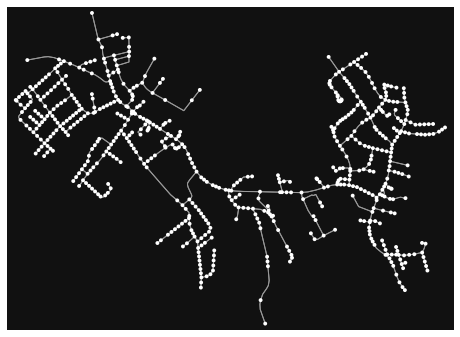

(<Figure size 576x576 with 1 Axes>, <AxesSubplot:>)

In [9]:
ox.plot_graph(simp_graph)

In [9]:
# over unterlottenweiler
geo_load_area.wkt

'POLYGON ((4281997.41869224 2732185.07316504, 4281998.88075016 2732195.14230024, 4281998.01576282 2732213.92516569, 4281993.61512521 2732232.20571892, 4281985.83757831 2732249.32453903, 4281974.9636758 2732264.66411145, 4281961.38566396 2732277.67110312, 4281945.59333238 2732287.87632242, 4281928.15634618 2732294.91164401, 4281909.70369689 2732298.52328794, 4281899.89836158 2732299.48902918, 4281899.80062908 2732299.51867601, 4281899.71055828 2732299.56681985, 4281899.63161057 2732299.63161056, 4281899.56681985 2732299.71055828, 4281899.51867601 2732299.80062907, 4281899.48902918 2732299.89836158, 4281899 2732304.86355813, 4281899 2732400, 4281897.32744326 2732418.12094891, 4281892.36628708 2732435.62960862, 4281884.28416412 2732451.93437859, 4281873.35416141 2732466.48433653, 4281859.9455931 2732478.78785356, 4281844.51152164 2732488.42920582, 4281827.57344925 2732495.08262142, 4281809.70369689 2732498.52328794, 4281799.89836158 2732499.48902918, 4281799.80062908 2732499.51867601, 428

### clustering

In [10]:
from grid.lv_grid.clustering import get_cluster_numbers, apply_AgglomerativeClustering

In [11]:
%%time

n_cluster = get_cluster_numbers(buildings_w_loads_df)

clustering_successfully=False
for i in range(len(simp_graph.nodes)):
    
    # increment n_cluster. n_cluster += 1
    labels = apply_AgglomerativeClustering(simp_graph, n_cluster)
    
    cluster_graph, nodes_w_labels = get_cluster_graph_and_nodes(simp_graph, labels)
    mvlv_subst_list = get_mvlv_subst_loc_list(cluster_graph, nodes_w_labels, street_loads, labels, n_cluster)
    
    if len(mvlv_subst_list) > 0:
        
        print('all clusters are in range')
        
        clustering_successfully=True
        break
        
    else:
        
        n_cluster += 1
        print('n_cluster', n_cluster)
        print('at least one node trespasses dist to substation')
        
if not clustering_successfully:
    
    print('clustering cannot ensure dist from substation to each node <= threshold')

all clusters are in range
Wall time: 1.51 s


In [12]:
n_cluster

6

In [13]:
%%time


# get loadds on mv level
#mv_lv_level_threshold = get_config_osm('mv_lv_threshold_capacity')
# TODO weg mit den 40 wg testing
mv_lv_level_threshold = 1000

loads_mv_df = buildings_w_loads_df.loc[buildings_w_loads_df.capacity >= mv_lv_level_threshold]

#assign cluster id to loads on mv level
mv_cluster_ids = list(range(n_cluster, n_cluster + len(loads_mv_df)))
loads_mv_df['cluster'] = mv_cluster_ids


# map cluster to buildings of lv level
buildings_w_loads_df = buildings_w_loads_df[~buildings_w_loads_df.index.isin(loads_mv_df.index.tolist())]
buildings_w_loads_df['cluster'] = buildings_w_loads_df.nn.map(nodes_w_labels.cluster)


# concat lv and mv level after assignment of cluster ids
buildings_w_loads_df = pd.concat([buildings_w_loads_df, loads_mv_df])

mvlv_subst_list = add_mv_load_station_to_mvlv_subst_list(loads_mv_df, mvlv_subst_list, nodes_w_labels)

Wall time: 155 ms


In [14]:
len(mvlv_subst_list)

8

In [15]:
len(loads_mv_df)

2

In [16]:
loads_mv_df.category.value_counts()

industrial    2
Name: category, dtype: int64

In [23]:
#geo_load_area_proj = ox.project_graph(simp_graph, to_crs='epsg:4326')

nodes, edges = ox.graph_to_gdfs(simp_graph)

poly = wkt.loads(u'POLYGON ((9.403330484845149 47.6685599815124, 9.403431006737179 47.6686146661229, 9.403595823320479 47.6687473706754, 9.40371954906438 47.6688991364868, 9.40374317738072 47.6689491749799, 9.403800322007751 47.6690386630232, 9.40382305214637 47.6690634777434, 9.404039756028309 47.6692760482326, 9.40410869974982 47.6693514433323, 9.4041378769556 47.669387213345, 9.404242065927029 47.6695524062175, 9.4042951641039 47.6697283660561, 9.404295013939359 47.6699079448049, 9.40424162098433 47.6700838473211, 9.4041371537503 47.6702489277306, 9.40398585569767 47.6703964797313, 9.40379387291194 47.6705205090494, 9.40356900445811 47.6706159769765, 9.40332038555019 47.6706790050902, 9.403264276812701 47.6706890053654, 9.40313426309654 47.6707074917854, 9.403051698091719 47.6707163183201, 9.40301432455558 47.670721538073, 9.402966254987099 47.6707331947153, 9.40296504534915 47.6707336760238, 9.40296398961387 47.6707343014007, 9.402963124783961 47.670735048927, 9.40296248117097 47.6707358924025, 9.402962081333079 47.6707368022639, 9.40296193928425 47.6707377466216, 9.402962060003221 47.6707386923763, 9.40297585916192 47.6707719482464, 9.40299121917945 47.6707955779927, 9.403222282236561 47.6711101533155, 9.40327411407006 47.6711903852134, 9.40329601219924 47.6712294023351, 9.403363614248949 47.6713982151605, 9.403381158027949 47.6715726988974, 9.403347967117449 47.671746131171, 9.40326531978458 47.6719118300498, 9.40313639980916 47.6720634114886, 9.40311627262046 47.6720824661541, 9.4031055877419 47.6720936609682, 9.403087338982569 47.672120582853, 9.403072030042519 47.6721633869779, 9.403067434331399 47.6721852730829, 9.403060226227479 47.6722099775711, 9.40304092129522 47.6722957742474, 9.403021260275899 47.6723600107007, 9.402998451239579 47.6724606734393, 9.402998718279649 47.6724925429713, 9.40300460150581 47.6725607837697, 9.403008918952009 47.6725882085804, 9.403022009005429 47.6726229439489, 9.40302260056613 47.672623791891, 9.40302341973001 47.6726245483282, 9.40302443660512 47.6726251856575, 9.40302561408522 47.6726256806224, 9.40306140909353 47.6726349267391, 9.403090548500369 47.6726427233874, 9.403191641533081 47.6726707167649, 9.403523573291441 47.6728039368073, 9.403565560986589 47.6728270197521, 9.40360971469531 47.6728534158537, 9.40367664695516 47.6728893974635, 9.40367789012886 47.6728898398982, 9.40367923330678 47.6728901181167, 9.40368062953357 47.6728902223928, 9.403732688641931 47.6728874971924, 9.40377225948005 47.6728815777084, 9.404294666681871 47.6727858848592, 9.40433484323149 47.6727770934591, 9.40438336135413 47.6727609110802, 9.404384453788831 47.6727603472766, 9.40438536532915 47.6727596518215, 9.404436816074931 47.6727004795622, 9.404467446471971 47.672661232239, 9.404501556532271 47.6726224458596, 9.404661089326449 47.67247704235, 9.40466229404649 47.672476150385, 9.404837004699891 47.6723681286687, 9.40485294602045 47.672359922111, 9.405048126681461 47.6722544211544, 9.405167797525969 47.6721968259815, 9.40521785266564 47.6721754745245, 9.405458496577459 47.6720947297135, 9.405718368174011 47.6720486804217, 9.405986661511839 47.6720392414579, 9.406096972532261 47.6720429865854, 9.40613217746257 47.6720420470428, 9.406147379096531 47.6720426574268, 9.406270659320761 47.6720320384316, 9.40627096451939 47.6720336560412, 9.4064337191598 47.6720198424299, 9.406682704960129 47.6720307721115, 9.406924189793431 47.6720732505146, 9.40714951297101 47.6721457541861, 9.40735059334666 47.6722456828322, 9.40752021911387 47.6723694525634, 9.40765230644503 47.6725126244131, 9.407742117698691 47.6726700635236, 9.407786431368381 47.6728361232925, 9.40778365767321 47.6730048478794, 9.407775452109959 47.6730570252479, 9.40776611054442 47.6738694312795, 9.407772104648281 47.6739141505194, 9.407772489069879 47.6739150321933, 9.407773120439529 47.6739158462484, 9.40777397449413 47.6739165614011, 9.40777501841273 47.6739171501683, 9.40777621207825 47.6739175899242, 9.407777509618651 47.6739178637691, 9.407907897514891 47.6739272611235, 9.408160813870809 47.6739627052708, 9.408398657126201 47.6740308335869, 9.40861228744979 47.6741290280625, 9.408793495333651 47.674253515299, 9.4089353170517 47.6743995114934, 9.40903230227322 47.6745614062515, 9.40908072354658 47.6747329781676, 9.4090925632342 47.6748212901316, 9.409092947685069 47.6748221718005, 9.409093579086599 47.6748229858476, 9.40909443317447 47.6748237009897, 9.40909547712646 47.6748242897441, 9.40909667082421 47.6748247294854, 9.40909796839442 47.6748250033145, 9.40916399510653 47.6748297611406, 9.410365353526521 47.6748362418672, 9.410431481128869 47.6748321969473, 9.4104327848148 47.6748319371506, 9.4104339884437 47.6748315103417, 9.410435045760631 47.6748309329226, 9.41043591613362 47.6748302270831, 9.41043656611463 47.6748294199484, 9.41043697072533 47.674828542536, 9.410443990270039 47.6747838935948, 9.41045328985359 47.6739714876552, 9.410447096676419 47.6739253013548, 9.41041327591287 47.6739062279101, 9.41025901486284 47.6738349163595, 9.41007440050979 47.6737060367544, 9.409931703001551 47.6735547634534, 9.409836708360711 47.6733872306201, 9.409793268125579 47.6732102316824, 9.409803143239371 47.6730309438463, 9.40981357388975 47.6729801871324, 9.40987726164494 47.6728041674334, 9.409992300411441 47.6726405116322, 9.41015393061412 47.6724959901137, 9.410355465366351 47.6723765816311, 9.410588567135321 47.6722872259917, 9.41084359265829 47.672231619725, 9.41110999184226 47.6722120631824, 9.411376744152239 47.6722293653886, 9.41163281444684 47.6722828105785, 9.411729083660131 47.672310428817, 9.411788325330511 47.6723286038534, 9.41180252687565 47.6723332499673, 9.41180364477168 47.672333567895, 9.412020604970129 47.6724121295418, 9.41221218720284 47.6725166027479, 9.412371707773261 47.6726433428697, 9.412493601367061 47.6727879284321, 9.41251820972124 47.6728247326, 9.41256366181519 47.6729021607684, 9.412609737125949 47.6729927903701, 9.41263264058002 47.6730585621262, 9.41266670811552 47.6730764759486, 9.41271483949669 47.6730929277527, 9.4127547572106 47.6731019724626, 9.412818026674181 47.6731140476692, 9.412925507951019 47.6731379745839, 9.41297761631297 47.6731512771621, 9.41318152186418 47.6732173522886, 9.413365728794259 47.6733060273528, 9.413524812772369 47.6734146912012, 9.413560461193899 47.6734436337462, 9.413629085373399 47.6735044820375, 9.4140759189282 47.6739380945742, 9.41414657290804 47.6740146476074, 9.414178150246521 47.674053063855, 9.414283424729939 47.6742186539265, 9.414337272035469 47.6743951757135, 9.414337488264881 47.6745754061629, 9.414330967611081 47.6746191315377, 9.414310874750431 47.674708330524, 9.413976544734419 47.6758132472039, 9.413964807292849 47.6758702087299, 9.413958504807219 47.6759268742536, 9.41395751049858 47.6759843838023, 9.41404490740662 47.6771267735512, 9.414048969348171 47.6771541055834, 9.41406193759064 47.6771890953507, 9.41406252180159 47.6771899357338, 9.414063334497319 47.6771906842894, 9.41406434522148 47.6771913129648, 9.41406551609643 47.6771917982, 9.41406680324274 47.6771921218104, 9.414119447404291 47.6771979432723, 9.414160064102211 47.6771984015522, 9.415673035259161 47.6771658575169, 9.4157235035184 47.6771634829374, 9.41577359137805 47.6771598405556, 9.415823651462469 47.6771549047288, 9.416280748359391 47.6770978752228, 9.41636576719117 47.6770833286931, 9.41644813806246 47.6770652902157, 9.416529624922459 47.6770433735021, 9.417497862017621 47.6767319806815, 9.417617805741889 47.6766982031449, 9.417673191851041 47.6766847320491, 9.41792488859952 47.6766418878151, 9.418184133147291 47.6766332426028, 9.41844086512374 47.6766591319028, 9.41868512164713 47.6767185510426, 9.41890742389333 47.6768091941682, 9.41909914489352 47.6769275437138, 9.419252844296841 47.6770690068896, 9.41936255711191 47.6772280938938, 9.41938206232769 47.6772656528528, 9.419419021482391 47.6773498962827, 9.41950988722798 47.6776019922593, 9.419526867040039 47.6776413051726, 9.41953148480783 47.677650443957, 9.4195522219362 47.6776864116907, 9.419580785275111 47.6777303414764, 9.41965945969786 47.6778914833461, 9.41969153211285 47.6780597817914, 9.41967583877071 47.6782291324925, 9.41961294842441 47.6783933929038, 9.41950514176618 47.6785466050527, 9.419356328762889 47.6786832116528, 9.41929031218714 47.6787330660571, 9.41927484552455 47.6787473022436, 9.419252225822319 47.6787643284793, 9.41922483086155 47.6787949282375, 9.419208404824049 47.6788209294428, 9.41866388974063 47.6798085819579, 9.4186500448128 47.6798383361963, 9.41864139193259 47.6798773691353, 9.418643728605369 47.6799040064023, 9.41864851104291 47.6799184094727, 9.418657568994011 47.6799398334196, 9.4187026561977 47.6801021609762, 9.418702660792761 47.6802673198552, 9.418657582192459 47.6804296348895, 9.418641115683339 47.6804685815897, 9.418602094643569 47.6805469205807, 9.41832396504501 47.681029939943, 9.418310499991209 47.6810574880665, 9.41830128561368 47.6810953920783, 9.41830134350025 47.6810962528674, 9.41830166345872 47.6810970869847, 9.418302231650051 47.6810978583525, 9.418303023498639 47.6810985336073, 9.418304004754919 47.6810990835426, 9.41835430194735 47.6811169528814, 9.41839493573694 47.6811262885176, 9.41936301698518 47.681311301948, 9.419405021620349 47.6813177829342, 9.41946115410933 47.6813204831862, 9.41946244770649 47.6813203657881, 9.41946367905418 47.681320073251, 9.4194726960145 47.6813163989711, 9.419689893074199 47.6812453386649, 9.419922621533519 47.6812022532312, 9.42016307701177 47.6811885875037, 9.42094099488143 47.6811927068515, 9.42100712980522 47.6811886555594, 9.421008433598651 47.6811883956376, 9.421009637288551 47.6811879687137, 9.421010694617641 47.6811873911942, 9.42101156495348 47.6811866852727, 9.42101221484945 47.6811858780776, 9.421012619330501 47.6811850006287, 9.421019630605359 47.6811403511392, 9.42102768033457 47.6804244273671, 9.421057577912149 47.6802423680544, 9.42114190914498 47.6800682991945, 9.42127710880345 47.6799095787238, 9.421457461579561 47.6797729157336, 9.42156256047285 47.6797081274272, 9.42169119988356 47.6796122622096, 9.42191830662232 47.6795022884118, 9.42217460713378 47.6794271658043, 9.42225589767142 47.6794162188774, 9.42235959788353 47.6793955433252, 9.422360801520201 47.679395116386, 9.422361858797171 47.6793945388529, 9.422362729084011 47.6793938329201, 9.42236337893598 47.6793930257162, 9.422363783379719 47.6793921482615, 9.42237079322908 47.6793474986452, 9.42237990593906 47.6785350933233, 9.422373898639711 47.6784903749721, 9.422373513934581 47.6784894933512, 9.422329239970191 47.6784324406216, 9.422306365237089 47.6784092322281, 9.42221138444175 47.6782592085654, 9.422158456634421 47.6780999937283, 9.422149356815121 47.6779369283702, 9.422184389809379 47.6777754822541, 9.42226238009834 47.6776210707776, 9.42238071130221 47.6774788733273, 9.42248068667408 47.6773809565765, 9.42250227596379 47.6773574248154, 9.422511905684569 47.6773423728475, 9.422526873578731 47.6773242766307, 9.4225224812111 47.6773196561984, 9.42248510650127 47.6772934464282, 9.42245266434257 47.6772765370543, 9.42232149144643 47.6772148453048, 9.42222445581676 47.6771645366852, 9.42218141713489 47.6771399979468, 9.42201005447021 47.6770222708204, 9.42187376579245 47.6768851822097, 9.42177723469017 47.6767334434912, 9.42172377829435 47.6765722694837, 9.42171523332072 47.6764071992192, 9.421751893001449 47.6762439055779, 9.421832497066029 47.6760880003306, 9.42195427510811 47.6759448412882, 9.421986740647609 47.6759137519885, 9.422061813568771 47.6758485115522, 9.42208911467897 47.6758269320444, 9.422115073605591 47.6758042700303, 9.42214174019211 47.6757722715036, 9.42214216939818 47.6757713918068, 9.422142339109399 47.6757704725667, 9.42213859023259 47.6757344525718, 9.422131053704961 47.6757117793012, 9.422105592059861 47.6756055439824, 9.422104164951991 47.6755959497204, 9.422101177097829 47.675440707456, 9.42213808547514 47.6752874773351, 9.422152109139841 47.6752501369269, 9.422185220685259 47.675175736657, 9.42267342985177 47.6742302735409, 9.42272568046649 47.6741439087947, 9.422753489832839 47.6741040402755, 9.422896491857241 47.6739447270897, 9.42308538238651 47.6738090259652, 9.423311895230739 47.6737028751936, 9.42356611803927 47.6736309199088, 9.423836926043681 47.673596308842, 9.4239018957681 47.6735926981407, 9.42398332798591 47.6735910675152, 9.424078711695421 47.6735863775342, 9.424080052821679 47.6735861330236, 9.424081301020919 47.673585720992, 9.424082411018301 47.6735851563846, 9.42409994541145 47.6735720422236, 9.424296205600429 47.673452051815, 9.42452397059566 47.6733610072547, 9.424720612594459 47.6733150661375, 9.42469655247816 47.6732190809469, 9.42470462612302 47.6730423279416, 9.4247641602317 47.6728701424104, 9.42487280908264 47.6727093072486, 9.424913865022891 47.6726616962591, 9.425077289973171 47.6725110708436, 9.42528357813282 47.6723868127885, 9.425523657778911 47.672294386298, 9.42578697140719 47.6722378557693, 9.42606193995729 47.6722197070865, 9.426365141538049 47.6722212971916, 9.4264312645043 47.6722172425924, 9.426432568042859 47.6722169826046, 9.426474419344281 47.6722021335061, 9.42671376649052 47.672136545922, 9.42696744507823 47.6721037991115, 9.42722570685218 47.6721051514532, 9.42747862746317 47.6721405509805, 9.427716487778151 47.6722086373778, 9.42775800389569 47.6722239230154, 9.42775930149921 47.6722241966236, 9.427825326577789 47.6722289431928, 9.430357369068719 47.6722421555869, 9.4304234917426 47.6722380985747, 9.43042479526142 47.6722378385394, 9.430425998663409 47.6722374115098, 9.430427055702371 47.6722368338965, 9.43042792575698 47.6722361278968, 9.430428575391449 47.672235320642, 9.430428979640769 47.6722344431543, 9.43043598148485 47.6721897928589, 9.43044544900539 47.671333614426, 9.43047268461018 47.6711599307376, 9.43054950047244 47.670993185114, 9.43067294418571 47.6708397853979, 9.430838271603211 47.6707056265099, 9.431039129194509 47.6705958639317, 9.43126779822194 47.6705147156098, 9.43151549135106 47.6704652998874, 9.431772690299081 47.6704495156902, 9.43310338730678 47.6704564188668, 9.433378276776949 47.6704774869551, 9.433640613395051 47.6705369113302, 9.433878830067499 47.6706320718343, 9.434082423060451 47.6707587726024, 9.434242415103959 47.6709114270439, 9.434351751231 47.6710833041442, 9.43440560989827 47.67126682523, 9.434417492240399 47.6713551346377, 9.43441787709906 47.6713560162194, 9.434418508858361 47.671356830122, 9.434419363240229 47.6713575450679, 9.434420407411141 47.6713581335818, 9.434421601244329 47.6713585730477, 9.434422898861291 47.671358846577, 9.4345204454512 47.6713658533404, 9.43474166559848 47.6713815308524, 9.43498504861482 47.6714320737397, 9.43520952397887 47.6715133281517, 9.435406709707349 47.6716222600625, 9.435569242681259 47.6717548019501, 9.43569105358163 47.6719060046604, 9.43576759354055 47.6720702221924, 9.43579600404181 47.6722413225076, 9.4357972720902 47.6722982730896, 9.43579755694673 47.6722991465949, 9.435820338796059 47.67233373443, 9.43584324209227 47.6723578705514, 9.435856186918461 47.6723696520078, 9.435885196855271 47.6723950851235, 9.436023428127021 47.6725449207527, 9.436115254383949 47.6727102435944, 9.4361570681051 47.6728845595387, 9.43614722626412 47.6730610211475, 9.436086114947811 47.6732326966267, 9.43597613427106 47.6733928421243, 9.43582160416763 47.673535166655, 9.435783333453131 47.6735639338178, 9.43574146783271 47.673595500858, 9.4357013628163 47.6736326701956, 9.43570081096097 47.6736334862277, 9.435700511660171 47.673634360454, 9.43570047701213 47.6736352575369, 9.435722095150879 47.6737178116222, 9.43573403489876 47.6739727182948, 9.435711626324411 47.6741075136497, 9.435702756272811 47.6749170794598, 9.43570877474613 47.6749617971665, 9.435709159653459 47.6749626787422, 9.43570979147705 47.6749634926361, 9.435710645936339 47.6749642075706, 9.43571169019485 47.6749647960713, 9.43571288412244 47.6749652355224, 9.43571418183698 47.674965509036, 9.435844577405531 47.6749748731, 9.436082051573759 47.6750070632138, 9.43630681063649 47.6750681019772, 9.436511260505711 47.6751559270484, 9.4366884931969 47.6752675710325, 9.43683252021926 47.6753992617298, 9.436938474917049 47.6755465495756, 9.43700277692577 47.6757044579688, 9.437023253183661 47.6758676514109, 9.437013893720939 47.6767238286248, 9.43701991353417 47.6767685462214, 9.43702029847725 47.6767694277917, 9.437020930343531 47.6767702416773, 9.437021784850829 47.6767709566011, 9.43708795331624 47.6768082436893, 9.4371977568528 47.6768598266958, 9.437391945053969 47.6770018716763, 9.437536235119 47.6771689008145, 9.437659431597931 47.6773554736813, 9.437677493313419 47.6773796623187, 9.43770760716137 47.6774087682099, 9.43770860539577 47.6774094224896, 9.43778583674426 47.6774435846166, 9.437839892594139 47.6774627120617, 9.43803265766492 47.6775657229611, 9.43819380129905 47.6776911365311, 9.43831772154947 47.6778345931281, 9.43840011032376 47.6779911058553, 9.438438103177161 47.6781552339061, 9.438430378936911 47.6783212716917, 9.438377205687811 47.6784834471798, 9.438360418621221 47.6785099312973, 9.43833116385775 47.6785734486826, 9.438324167958189 47.6786180993501, 9.438315306764499 47.6794305061837, 9.43832132800982 47.6794752236513, 9.43832171299513 47.6794761052159, 9.43832234491491 47.679476919093, 9.438323199484939 47.6794776340057, 9.43832424386447 47.6794782224802, 9.438325437918699 47.6794786619019, 9.438326735760651 47.6794789353841, 9.438392771097099 47.6794836755689, 9.43959424102278 47.6794898354557, 9.439660372266861 47.6794857728833, 9.439661675922491 47.679485512739, 9.43966287941741 47.6794850856094, 9.439663936501841 47.6794845079089, 9.43966480655272 47.6794838018383, 9.43966545613441 47.6794829945314, 9.43966586028391 47.6794821170126, 9.43967285514189 47.6794374662771, 9.43967762612737 47.678998999941, 9.43970684965044 47.6788188409293, 9.43978938692679 47.6786464161621, 9.439921822048291 47.6784888605858, 9.440098674467469 47.6783526937966, 9.440312625833741 47.6782435502828, 9.440554822843721 47.6781659462958, 9.44081524357167 47.6781230929956, 9.44108311212524 47.6781167635944, 9.44134734447729 47.6781472199942, 9.44159700703848 47.6782132019518, 9.44175098807554 47.6782808728577, 9.441752260125231 47.6782795613469, 9.441861336179491 47.678327943505, 9.44186260157003 47.6783282905347, 9.441863942443989 47.6783284649411, 9.441865307824351 47.6783284600936, 9.441866645802371 47.6783282761765, 9.441916469595419 47.6783141959255, 9.4419520040484 47.6782997155023, 9.44248524579799 47.6780576643142, 9.442518830298161 47.6780407866243, 9.44262490632266 47.677969413337, 9.442826318771941 47.6778583500373, 9.443056062105279 47.6777761873305, 9.44330519653726 47.677726122296, 9.443564027851931 47.6777101030354, 9.44360648366508 47.6777103189292, 9.443672612301841 47.6777062539262, 9.44367391589201 47.6777059937337, 9.443675119311891 47.6777055665596, 9.443676176314581 47.6777049888198, 9.443677046280181 47.6777042827165, 9.44367769577631 47.6777034753851, 9.44367809984327 47.6777025978506, 9.443685090970989 47.6776579468168, 9.44369386698156 47.6768455387735, 9.44368784136549 47.6768008215405, 9.4436819534652 47.6767873418306, 9.44360606370169 47.676663311471, 9.443556047133971 47.6765045211873, 9.44354946816518 47.6763422359171, 9.443586544816419 47.6761818436899, 9.44361306877418 47.6761105004393, 9.44361574293734 47.6760794898484, 9.44361355456391 47.6760615415954, 9.44361264207245 47.6760567755956, 9.44360612119692 47.6758697389658, 9.443657501030311 47.6756859132799, 9.443764515549439 47.6755134037253, 9.44392244582283 47.6753598164643, 9.4441243281541 47.6752319232876, 9.444361261163699 47.675135363067, 9.44462279826239 47.6750743931618, 9.44469271439449 47.6750634833006, 9.44474148973595 47.6750506492928, 9.444742660000299 47.6750501499196, 9.44478188118393 47.6750252043829, 9.44480822450091 47.6750028177343, 9.44525374356828 47.6745845180165, 9.445276742740131 47.6745605192892, 9.44529938572777 47.6745269148775, 9.445299696480291 47.6745260211249, 9.445299743078211 47.6745251035032, 9.445299523726391 47.6745241973637, 9.445289275657069 47.6745057203891, 9.44527538765648 47.674479436013, 9.445237589506631 47.6744042010129, 9.44518481385006 47.6742613280277, 9.44516755601939 47.6741145330045, 9.4451862871255 47.6739678257872, 9.44519681365856 47.673926071463, 9.445199098250701 47.6738999532262, 9.44520549495738 47.6738725365313, 9.44520543318896 47.6738716507689, 9.445205107850301 47.6738707917114, 9.445204532382251 47.6738699948495, 9.44517005176483 47.6738398178215, 9.445138462305559 47.6738195034606, 9.443835328924949 47.6730630005963, 9.443804034755971 47.6730464969249, 9.443758969347821 47.6730290012177, 9.443757645823309 47.673028691742, 9.443756260088801 47.6730285552473, 9.44375486112139 47.673028596558, 9.44375349836586 47.673028814214, 9.443752219986999 47.6730292005224, 9.44370959300262 47.673049285735, 9.443680556097799 47.6730675709478, 9.4433914449545 47.6732676176867, 9.44329809583026 47.6733262474971, 9.44325156000118 47.6733527591363, 9.44304198865092 47.6734504099256, 9.44280855308973 47.6735189822979, 9.44255996593539 47.6735559168738, 9.442305505402841 47.6735598351118, 9.4420546689572 47.6735305907681, 9.442046897267151 47.6735291505761, 9.44181640443694 47.6734702867118, 9.441606137928041 47.6733834345324, 9.44142345015222 47.6732716310577, 9.44127472904186 47.6731387857741, 9.44116517468245 47.6729895439141, 9.4410986175023 47.6728291240105, 9.44107738437404 47.6726631354081, 9.441080975169299 47.6723322345002, 9.4410749523259 47.6722875170279, 9.44107456734648 47.6722866354699, 9.44107393547076 47.672285821606, 9.441073080981321 47.6722851067123, 9.44107203671579 47.6722845182621, 9.441070842804599 47.6722840788689, 9.441069545129221 47.6722838054185, 9.441003518776601 47.6722790668407, 9.43980221691365 47.6722729225614, 9.439736094945429 47.6722769852422, 9.43973479147283 47.6722772453886, 9.439692943943751 47.6722920995622, 9.43945361266023 47.6723577155485, 9.43919994081989 47.6723904913113, 9.4389416773599 47.6723891672333, 9.438688747706131 47.6723537942013, 9.438450872267611 47.6722857316493, 9.438409352935521 47.6722704500668, 9.43840805527452 47.6722701765849, 9.438342029181131 47.6722654364011, 9.43724235100767 47.6722597856529, 9.436977665612011 47.6722402286863, 9.436724188704639 47.672185081481, 9.436492273310799 47.6720965964849, 9.43648558249005 47.6720934011053, 9.436481238603751 47.6720918810585, 9.43627789220357 47.6720038872522, 9.43610169119758 47.6718922831951, 9.43595855067958 47.6717608155755, 9.435853275752921 47.6716138978953, 9.43578940023952 47.6714564622906, 9.4357690680838 47.6712937939459, 9.43577034886852 47.6711768725621, 9.435796634040519 47.6710062665327, 9.43587077451782 47.6708422358226, 9.435990021869859 47.6706908601755, 9.43614995589995 47.670557750228, 9.43626611639966 47.6704921737436, 9.43626447703269 47.6704908700552, 9.436409220351139 47.670407626727, 9.436438862925071 47.670384535175, 9.43691011669763 47.6699777282332, 9.4369837816566 47.6699194838443, 9.437021827628859 47.6698918990546, 9.437189952311201 47.6697893043461, 9.437381579799171 47.6697077031922, 9.437591047298421 47.6696495069516, 9.4376713798857 47.6696324794303, 9.43768461082392 47.6696285663376, 9.437696239703561 47.6696260058233, 9.437902528384431 47.6695927268026, 9.43811404687836 47.6695822672237, 9.438371271808659 47.6695835879851, 9.43843739042746 47.6695795261208, 9.438438693838259 47.6695792659895, 9.438439897111399 47.6695788388711, 9.438440954005589 47.6695782611795, 9.43844182390511 47.669577555115, 9.43844247338011 47.6695767478114, 9.43844287747171 47.6695758702929, 9.43844987199277 47.6695312194204, 9.438458728415309 47.6687188086658, 9.438452708251519 47.6686740909732, 9.43845232334359 47.6686732094044, 9.438441370337239 47.6686590995964, 9.43831871930171 47.6685319976835, 9.43822083773107 47.6683638937379, 9.43817510197478 47.6681858990066, 9.43818339180876 47.6680053313277, 9.43824536586083 47.667829614243, 9.43835847573612 47.6676659718015, 9.438518070868581 47.6675211315758, 9.43871758977475 47.6674010480998, 9.438948829837409 47.6673106580941, 9.439202284523359 47.6672536775362, 9.43946753417343 47.667232448915, 9.439733674305829 47.6672478449443, 9.439805123141619 47.6672569819394, 9.439806482714641 47.6672569733307, 9.439807813653511 47.6672567855919, 9.43980906486761 47.66725642593, 9.43981018832644 47.6672559081512, 9.43981114090392 47.6672552521316, 9.439811886033301 47.6672544830537, 9.439812395111421 47.6672536304401, 9.43982228608812 47.667218378977, 9.439823871542631 47.6671918200131, 9.439817030833041 47.6666604965566, 9.43981436981286 47.6666291492613, 9.439804786331051 47.6665962398037, 9.43980426464161 47.6665953338813, 9.439803515326791 47.6665945041871, 9.439802561790749 47.666593776636, 9.43975548832011 47.6665686249637, 9.439706494046829 47.6665469077194, 9.439523578898029 47.6664491522124, 9.439368996124889 47.6663311249733, 9.439247585908211 47.666196521744, 9.439228177401841 47.6661699737375, 9.439142811852779 47.666020829699, 9.439130463033679 47.6659917299131, 9.43908553989292 47.6658322852961, 9.43908412597915 47.6656699804916, 9.43912626780636 47.6655102016028, 9.439210566511949 47.6653582508611, 9.43933422432842 47.6652191706766, 9.43936837267035 47.6651876684735, 9.43943301083999 47.6651334124396, 9.439477705862769 47.6650911987837, 9.43947823286639 47.6650903933613, 9.43949026852883 47.6650525433643, 9.439492884575079 47.6650222039409, 9.439495480911701 47.6647734504962, 9.43951648119114 47.664621161093, 9.43957568194323 47.6644735507074, 9.43967133821004 47.6643349694027, 9.43980063075419 47.6642095011224, 9.43983121822404 47.6641846708357, 9.439831867608749 47.6641838635217, 9.43983227163382 47.6641829859956, 9.439846080613799 47.6640948084551, 9.439903935774479 47.6639118614845, 9.44001699997041 47.6637411280256, 9.44018028728623 47.6635901363186, 9.440386597471029 47.6634655440585, 9.44062683346197 47.6633728448629, 9.44089040250199 47.6633161260706, 9.44116568316635 47.6632978885442, 9.44243148618744 47.66330434753, 9.44249759641971 47.6633002831918, 9.44249889965087 47.6633000230111, 9.44250010274329 47.6632995958466, 9.442502853162321 47.6632980921293, 9.442510072620321 47.6632519758759, 9.44251933694199 47.6623957925011, 9.442546526929601 47.6622221050125, 9.44262329019581 47.6620553501407, 9.442746676355441 47.6619019360843, 9.442911943473449 47.6617677583147, 9.443112740336559 47.6616579730395, 9.443341350540621 47.6615767990772, 9.443588989011459 47.6615273557567, 9.443846139566499 47.6615115430638, 9.444636673684601 47.6615155593694, 9.44490278533778 47.6615353115466, 9.44515750911353 47.6615910482052, 9.44539032407827 47.6616804672498, 9.445591614075919 47.6617998753827, 9.44575306487708 47.6619443406295, 9.44581513403679 47.6620135120869, 9.44581603650043 47.6620141718559, 9.4458615327337 47.6620362889423, 9.445900429506651 47.6620497319499, 9.446622722342131 47.6622691389404, 9.44666362809534 47.6622799397349, 9.446718168601491 47.6622882824316, 9.44671950625021 47.6622883029723, 9.4468162172171 47.6622766004701, 9.446857014483619 47.662270026267, 9.446911748501581 47.6622628729654, 9.44713682535456 47.6622468525241, 9.44736264251382 47.6622571306439, 9.44758253369351 47.6622934039075, 9.44763536351817 47.6623054530023, 9.447741046232331 47.6623330323964, 9.448037192498431 47.6624203845477, 9.448075956140899 47.6624303266426, 9.44812865496354 47.6624381514004, 9.448130020472 47.6624381707528, 9.44813136555368 47.6624380106354, 9.44813263914731 47.6624376771265, 9.44813379290558 47.6624371828865, 9.448172904242259 47.6624120517033, 9.44819847021224 47.6623899833297, 9.448787802290621 47.6618266965261, 9.4488739471005 47.6617529430324, 9.44891725488961 47.661719639762, 9.449121493250789 47.6615925347856, 9.449360581036689 47.6614972058448, 9.44962390243564 47.6614378856051, 9.4498997657986 47.6614172079114, 9.450175922690519 47.6614360908605, 9.45024011308475 47.6614451772489, 9.45037445547125 47.6614692600092, 9.451857569321 47.6617926330308, 9.451900346517521 47.6618003296451, 9.452013420435449 47.6618083478837, 9.45226660228086 47.66184354713, 9.45250475939039 47.6619115087416, 9.4527187224194 47.6620096161347, 9.45290025339512 47.6621340920674, 9.453042362872379 47.6622801440491, 9.45313957904758 47.6624421488384, 9.45314353919966 47.6624512135814, 9.45314417114621 47.6624520273795, 9.45314502564068 47.6624527421823, 9.453146069845261 47.6624533305201, 9.45314726363185 47.6624537697835, 9.45314856112376 47.6624540430918, 9.453214575992421 47.6624587743526, 9.45448035962327 47.6624650939056, 9.454495107731059 47.6624661507188, 9.45449375983989 47.6624561607088, 9.45450328821001 47.6615562059881, 9.454527267584361 47.6613932365759, 9.454594942013999 47.6612359956312, 9.45470402449368 47.6610897960957, 9.454850828985069 47.6609595777948, 9.455030394997509 47.660849740541, 9.455236655212939 47.6607639954869, 9.455462640488969 47.6607052397477, 9.45570071531403 47.6606754585277, 9.455831261895311 47.6606674163268, 9.455832564992139 47.6606671559869, 9.455833767912109 47.660666728675, 9.455834824427511 47.6606661508126, 9.45583569393718 47.6606654446064, 9.455836343026251 47.6606646371957, 9.45583674675067 47.6606637596088, 9.455843724939641 47.6606191074172, 9.455850861432349 47.659943358989, 9.45588202913844 47.6597569471448, 9.45597020968032 47.6595790903707, 9.45611149303466 47.659417673901, 9.45629961503851 47.6592798540237, 9.45652623516642 47.6591717408354, 9.45658760885458 47.65914858649, 9.456633860730889 47.6591219698712, 9.45667715558919 47.6590886977384, 9.45683065143179 47.6589884360755, 9.456832013626579 47.65898768052, 9.457060563007641 47.658885798864, 9.45712108388792 47.6588645607395, 9.45724585200948 47.6588262111547, 9.45732095929856 47.6588062456269, 9.45759767412177 47.6587553777091, 9.4578841175767 47.6587462289555, 9.45816671230841 47.6587792330153, 9.458432063362521 47.6588528255035, 9.458507069915051 47.6588804220349, 9.458508367345409 47.65888069528, 9.458574378123821 47.658885423311, 9.459840074513229 47.6588916807798, 9.46011491309846 47.6589126817632, 9.460377221610109 47.6589720423352, 9.460615434193929 47.659067145151, 9.460819047296621 47.6591937968893, 9.460979082761961 47.6593464131214, 9.46108848370883 47.6595182645175, 9.46114242573633 47.6597017735378, 9.46115435134884 47.659790080572, 9.461154736579561 47.6597909620649, 9.461155368620171 47.659791775818, 9.461156223181749 47.6597924905591, 9.461157267423919 47.6597930788212, 9.46115846121714 47.6597935179978, 9.461159758684451 47.6597937912114, 9.46129012043116 47.6598031249892, 9.46154300392976 47.6598384459461, 9.461780852395981 47.6599064586773, 9.46199452579862 47.6600045496153, 9.462175812974809 47.6601289493399, 9.46231774715214 47.6602748774115, 9.462414873678989 47.6604367260534, 9.46246345967425 47.6606082756327, 9.46246163753519 47.6607829336584, 9.462409476779939 47.6609539881175, 9.46230898145291 47.6611148654147, 9.46216401318121 47.6612593830022, 9.46198014282799 47.6613819869905, 9.461764436435701 47.6614779656052, 9.46152518368088 47.6615436302844, 9.46127157927587 47.6615764574519, 9.46114103125227 47.6615845061405, 9.46113972815915 47.6615847665436, 9.46113852526182 47.6615851939136, 9.46113746878709 47.6615857718271, 9.461136599334569 47.6615864780751, 9.461135950316921 47.6615872855169, 9.46113554667547 47.661588163123, 9.461121774833339 47.6616763434883, 9.46106399759325 47.6618593019422, 9.46095100735384 47.6620300573702, 9.46078778594493 47.6621810802486, 9.46058153033705 47.6623057111063, 9.460341335327749 47.6623984542052, 9.460077792499121 47.6624552199085, 9.45980252313284 47.6624735050425, 9.45853673876155 47.6624672470716, 9.45847063088385 47.6624713211064, 9.45846932775472 47.6624715814775, 9.45846812481444 47.662472008818, 9.458467068291471 47.6624725867053, 9.458466198787271 47.6624732929318, 9.45846554971649 47.6624741003573, 9.458465146022499 47.6624749779532, 9.45845136936355 47.66256315794, 9.458393581625369 47.662746114895, 9.458280580568649 47.6629168674813, 9.45811734850021 47.6630678863006, 9.457911082860649 47.6631925120605, 9.4576708788899 47.6632852492478, 9.45740732856528 47.6633420084864, 9.457132053499031 47.6633602868877, 9.455801537181889 47.6633536761066, 9.455786788793681 47.6633526194697, 9.45578813695797 47.6633626094596, 9.45577909287328 47.6642187937411, 9.45578512757662 47.6642635105892, 9.455785512748511 47.664264392099, 9.455807491903361 47.6642926926425, 9.45590460549003 47.6644545467364, 9.45595317352412 47.6646260988554, 9.455951329093001 47.6648007564107, 9.45589914257137 47.6649718074076, 9.455798618993789 47.6651326783837, 9.455776043905979 47.6651607572738, 9.45577564014485 47.6651616348585, 9.455761858136579 47.6652498143865, 9.45570967052206 47.6654208652547, 9.45560914546804 47.6655817360202, 9.455464145743999 47.6657262443863, 9.455280243421839 47.6658488368177, 9.45506450577269 47.6659448019841, 9.454825223674369 47.6660104518406, 9.45457159296703 47.6660432633804, 9.454441032559179 47.6660513040447, 9.45443972931894 47.6660515643672, 9.45443852626139 47.6660519916625, 9.45443746961949 47.6660525695098, 9.45443659999928 47.6660532757029, 9.454435950819869 47.666054083103, 9.454435547028799 47.6660549606824, 9.45442856685519 47.6660996126643, 9.454419962980801 47.666912025957, 9.45442599680629 47.6669567428207, 9.454426381974811 47.6669576243342, 9.454427013996471 47.6669584381233, 9.4544278685831 47.6669591529145, 9.45442891289334 47.6669597412389, 9.454430106795041 47.6669601804874, 9.454431404407091 47.66696045378, 9.454497425164231 47.6669651842616, 9.454993038114379 47.6669676544092, 9.455250833028879 47.6669861913739, 9.455498279722439 47.6670385140551, 9.45572579568211 47.667122596238, 9.455924570113311 47.6672351817962, 9.45608690511555 47.6673719107704, 9.456206513787309 47.6675274881911, 9.456278763717579 47.6676958891128, 9.45630085643166 47.6678705919212, 9.4562820854806 47.6679836820861, 9.45628454187006 47.6679838676366, 9.45626378198118 47.6681098142875, 9.45626547525649 47.6681399625062, 9.45633393308951 47.6686669685595, 9.456339750070271 47.6686951972272, 9.456355710705029 47.6687312380237, 9.456356333604351 47.6687320196031, 9.45635717706619 47.6687327000093, 9.45635820631791 47.6687332511918, 9.45635937892791 47.6687336504277, 9.45636064655409 47.6687338812581, 9.45641617332466 47.668736123223, 9.45645813133633 47.6687334788909, 9.456645703638911 47.6687151137279, 9.456775619760551 47.6687068105422, 9.45683922045527 47.6687048878128, 9.457099512027479 47.6687144786404, 9.4573519267327 47.6687585437066, 9.45758658202144 47.6688353577808, 9.45764562928861 47.6688598341672, 9.45769913302447 47.6688778406012, 9.457700513779249 47.6688781146876, 9.457701944154159 47.6688782207805, 9.457751703346901 47.6688759613814, 9.457800808634349 47.6688690408098, 9.457883017959229 47.668854505196, 9.457980230293231 47.668833685946, 9.457980692421341 47.6688346723778, 9.45817797347172 47.6687982643524, 9.45841716610361 47.6687846577765, 9.459287777249241 47.6687889641096, 9.45954589712322 47.668807535043, 9.459793633507489 47.6688599736712, 9.46002136901374 47.6689442442817, 9.460220262597771 47.6690570754039, 9.46038259275068 47.6691940867944, 9.46050205725542 47.6693499594631, 9.4605740178737 47.6695186421452, 9.460595680460679 47.6696935862062, 9.46059561180676 47.6696966555928, 9.460602101405261 47.6697318714888, 9.46060253158411 47.6697327725738, 9.46060320358187 47.6697336032928, 9.46060409363424 47.6697343342684, 9.460605170265961 47.669734939651, 9.460606395403421 47.6697353980319, 9.460617797117269 47.6697379278289, 9.46079523830346 47.6697912499953, 9.46097325929307 47.6697462707717, 9.46123114275216 47.6697183153205, 9.46130725894705 47.6697152414398, 9.4613518744162 47.6697118849558, 9.46140707597152 47.6697017849807, 9.461408239300139 47.6697013865222, 9.46146224036046 47.669672250467, 9.46146630024079 47.6696695575645, 9.461545890121061 47.6696209051494, 9.461584966180091 47.6695989061698, 9.461790555591939 47.6695038791736, 9.462018921451969 47.6694367202197, 9.462261903224929 47.6693998291772, 9.462510818164381 47.6693945243127, 9.4627567715397 47.6694209951906, 9.46299097443254 47.6694782959002, 9.46320505775501 47.6695643788514, 9.463391371276609 47.6696761679336, 9.46354325698106 47.6698096684235, 9.4636552869884 47.6699601097181, 9.46372345754145 47.6701221157955, 9.46374533212183 47.6702898973135, 9.463745082666531 47.6703150272829, 9.46374568278571 47.6703495773799, 9.46375307987633 47.6703945678314, 9.46375348982167 47.6703954371927, 9.46375414459111 47.6703962350713, 9.463755018601329 47.6703969302925, 9.463756077703041 47.6703974956925, 9.4637572805148 47.6703979091799, 9.46380953475189 47.6704077775249, 9.46386346111685 47.6704122783358, 9.464129866930341 47.6704538422875, 9.46437786371605 47.6705316958657, 9.46459677211902 47.6706424865373, 9.46477716522951 47.6707814434048, 9.46491127451494 47.6709425826271, 9.46499332437762 47.6711189650736, 9.46501978092825 47.6713029951213, 9.465018104957011 47.6714643572387, 9.46502414849202 47.6715090734271, 9.46502453387542 47.6715099549015, 9.465025166119821 47.6715107686277, 9.465026020928519 47.6715114833348, 9.465027065451601 47.6715120715568, 9.465028259548729 47.6715125106889, 9.465029557331301 47.6715127838553, 9.465095584881359 47.6715175079366, 9.465439170051241 47.6715191872014, 9.465665368467199 47.6715335399817, 9.46588456578545 47.6715739598225, 9.465979229075529 47.6716040072727, 9.465980680523121 47.6716018184145, 9.466009684465471 47.6716106179387, 9.466075345703411 47.6716276558983, 9.466239070030699 47.6716790968922, 9.466246605441521 47.6716819038872, 9.466455627137931 47.6717785463618, 9.466633463680591 47.6719004394449, 9.466773547602729 47.6720430818169, 9.466870705454021 47.6722012058793, 9.46689653324127 47.6722581540396, 9.466910263056731 47.6722802894931, 9.46691952725473 47.6723006071169, 9.466920174808831 47.672301419204, 9.46692104324705 47.6723021307964, 9.46692209949045 47.6723027147894, 9.46696497778845 47.6723181785843, 9.467164488606841 47.6724066860924, 9.467337133134819 47.6725180720226, 9.46747724965833 47.6726486837024, 9.46758024304898 47.6727942379604, 9.467642735473641 47.6729499615726, 9.46766267720033 47.6731107477821, 9.46766050398452 47.6733210114162, 9.467636560395819 47.6734839827915, 9.46756890948504 47.6736412308867, 9.46745983675801 47.6737874423654, 9.46731302742781 47.6739176767699, 9.4671334419284 47.6740275334697, 9.466927148321041 47.6741133003727, 9.4667011172548 47.6741720793724, 9.46646298640978 47.6742018842886, 9.4663324071985 47.6742099390959, 9.466331103811971 47.6742101995589, 9.46632990066237 47.6742106269832, 9.46632884398621 47.6742112049431, 9.46632797439082 47.6742119112279, 9.46632732529438 47.6742127186955, 9.46632692164124 47.6742135963154, 9.466319950631121 47.6742582488865, 9.46631153221246 47.6750706600476, 9.46631757727541 47.6751153760875, 9.466317962707571 47.6751162575559, 9.46631859501634 47.6751170712733, 9.46631944990253 47.6751177859691, 9.46632049451325 47.6751183741778, 9.466321688704831 47.6751188132951, 9.466322986584981 47.6751190864458, 9.466389018873549 47.6751238097423, 9.46759038976785 47.6751296621561, 9.467656513165981 47.6751255826487, 9.46765781656897 47.67512532217, 9.467659019728931 47.6751248947313, 9.467660076408951 47.6751243167589, 9.467660946001519 47.6751236104638, 9.4676615950886 47.6751228029886, 9.467661998726211 47.6751219253642, 9.46766896869384 47.6750772727253, 9.46767781809128 47.6742210918184, 9.46770492970689 47.6740473990145, 9.46778162933512 47.6738806273994, 9.46790496903594 47.6737271858147, 9.468070208659199 47.6735929707903, 9.46827099804783 47.6734831399649, 9.468499621084611 47.6734019139078, 9.468747292202091 47.6733524139495, 9.469004493963119 47.6733365422525, 9.47033526951112 47.6733429926443, 9.47061018939649 47.673363967181, 9.470872583449131 47.673423302242, 9.4711108820434 47.6735183816077, 9.47131457783378 47.6736450129905, 9.4714746890182 47.6737976128595, 9.471584155376791 47.6739694526065, 9.471638149624191 47.6741529552055, 9.47165009643164 47.6742412604926, 9.47165048194856 47.6742421419426, 9.47165111433087 47.6742429556296, 9.47165196927654 47.6742436702841, 9.4716530139304 47.6742442584422, 9.4716542081471 47.6742446975015, 9.471655506033411 47.674244970589, 9.471721537684671 47.6742496906689, 9.47237027442293 47.6742528210203, 9.472639173068879 47.674272899762, 9.47289635061235 47.6743296942072, 9.473130964821859 47.674420809998, 9.473333124568081 47.6745424058295, 9.47349430678879 47.6746893553727, 9.473607715813159 47.6748554633693, 9.47366856989788 47.675033726795, 9.47367430289024 47.675216630084, 9.473624672505119 47.6753964619744, 9.47361418215743 47.6754204650574, 9.47360008937658 47.6754588087516, 9.47358842385565 47.6754977544963, 9.4733796570168 47.6763947990167, 9.473374832797489 47.6764258620331, 9.473377078234151 47.6764613910304, 9.473377399821899 47.6764623014219, 9.47337797210699 47.6764631537101, 9.47337877410679 47.6764639166459, 9.47337977641596 47.6764645622563, 9.473380942285189 47.6764650668704, 9.47344126832259 47.6764812475879, 9.473508518111339 47.6764944098721, 9.47375324559677 47.6765608859694, 9.473973504599529 47.6766589839807, 9.47416047165224 47.6767847742216, 9.474202744282429 47.6768195708266, 9.47420908126645 47.6768243088433, 9.47423948096742 47.6768412918353, 9.474287813021499 47.6768589536197, 9.474328614720029 47.6768689985879, 9.475245426258549 47.67706103588, 9.475303229697159 47.6770709284659, 9.47534935272992 47.6770745760689, 9.47540297115118 47.6770730699503, 9.475483107971289 47.6770665089128, 9.47575693815992 47.6770634767516, 9.47602579181731 47.6770987889369, 9.47627805410322 47.6771709199382, 9.476502826842371 47.6772767535965, 9.476595680406509 47.6773309773121, 9.4766073781652 47.6773365703711, 9.476647779192749 47.6773602285919, 9.4766489124729 47.6773606554815, 9.47670374540826 47.6773722381493, 9.47674833682114 47.677376754314, 9.477786748003361 47.6774452866281, 9.47792088822376 47.6774588818032, 9.477980292497289 47.6774670355123, 9.47823885689788 47.6775217411234, 9.47847542164776 47.6776110461598, 9.478679986401181 47.6777311754667, 9.47884390337115 47.6778770508364, 9.478960242896539 47.6780425056546, 9.479024086416199 47.6782205455585, 9.47903273446008 47.6784036440946, 9.478985820854881 47.6785840608801, 9.478969242691511 47.6786234829687, 9.47892547967013 47.6787102888943, 9.47882042852469 47.6788881124629, 9.47879917394692 47.6789298817438, 9.47878107671213 47.6789720024864, 9.478779934739441 47.6789752406882, 9.478698096747941 47.679136762224, 9.47857219034657 47.6792847550918, 9.478406839460471 47.6794137838208, 9.478208116862399 47.6795191094157, 9.47798332114777 47.679596863429, 9.47774070866283 47.67964419006, 9.47748919023349 47.6796593510591, 9.476990084985861 47.6796569666293, 9.47692395651756 47.6796610517639, 9.476922653046721 47.6796613123523, 9.47692144985764 47.6796617398919, 9.47692039318834 47.6796623179525, 9.476919523645909 47.6796630243197, 9.47691887464647 47.6796638318481, 9.47691847113065 47.6796647095048, 9.47691150854077 47.6797093626395, 9.47690325583593 47.6805217726013, 9.47690931070788 47.6805664879458, 9.476909696361529 47.6805673693746, 9.47691032890399 47.6805681830289, 9.47691118402709 47.6805688976402, 9.476912228868819 47.6805694857465, 9.476913423276629 47.6805699247472, 9.476914721349949 47.6805701977716, 9.476980761584599 47.6805749146704, 9.47748713292671 47.6805773338032, 9.47772903705417 47.6805936518626, 9.47796240027826 47.6806397389668, 9.478179280044589 47.6807140265412, 9.478372294734701 47.6808139861989, 9.478534874878131 47.6809362157833, 9.478661486740579 47.6810765551472, 9.478747820680031 47.6812302277315, 9.478858927551229 47.681500972473, 9.478873009749041 47.6815294492445, 9.47889950613243 47.6815639700731, 9.478900315642401 47.6815646376642, 9.478901311619371 47.6815651778134, 9.47893660516686 47.6815772390313, 9.479149570065591 47.6816682598228, 9.47933303381757 47.6817850166347, 9.479480290850409 47.6819232421647, 9.47958595876997 47.682077884421, 9.47964617510859 47.6822432913501, 9.479658738542479 47.6824134174024, 9.4796231894104 47.6825820444861, 9.479540826582051 47.6827430092362, 9.479414660049761 47.682890428292, 9.47924930096671 47.6830189133484, 9.47905079314317 47.6831237681185, 9.47882639215452 47.6832011600055, 9.47858430013339 47.6832482602069, 9.47833336594176 47.6832633471259, 9.478284552922011 47.683263114417, 9.478218419924961 47.6832672003228, 9.47821711636931 47.6832674609261, 9.47821591310657 47.6832678884792, 9.478214856377599 47.6832684665512, 9.47821398679177 47.6832691729274, 9.478213337766871 47.683269980462, 9.47821293424451 47.683270858122, 9.47819918563818 47.6833590397265, 9.478141444321521 47.6835420052998, 9.478028462757759 47.6837127765721, 9.47786522239352 47.6838638233211, 9.47765892103464 47.6839884850229, 9.47741865549582 47.6840812645792, 9.477155020469191 47.6841380707457, 9.47687964130221 47.6841563985641, 9.4755485856262 47.6841500275623, 9.475273606189759 47.6841290654928, 9.47501115260093 47.6840697412433, 9.474772798101149 47.6839746708112, 9.474569053099939 47.6838480464591, 9.47440890167198 47.6836954518279, 9.474299405400259 47.6835236156924, 9.47424539203544 47.6833401152248, 9.474233438755521 47.6832518106054, 9.47423305312781 47.6832509291683, 9.47423242059492 47.6832501154997, 9.474231565464651 47.6832494008683, 9.47423052059928 47.6832488127372, 9.474229326152271 47.6832483737078, 9.474228028025699 47.6832481006517, 9.474161984613101 47.683243382095, 9.47162939228796 47.6832311830402, 9.471563258796751 47.6832352649237, 9.47154614327509 47.683238685483, 9.47130273233333 47.6832708725683, 9.47105470322894 47.6832716479614, 9.47081084359005 47.6832409841906, 9.47057979329872 47.6831799676675, 9.47036973833827 47.6830907601902, 9.4701881207338 47.68297652234, 9.470167859244221 47.6829611296159, 9.470166921545911 47.6829606743371, 9.470110407240689 47.6829444290455, 9.470063609863651 47.6829368063738, 9.469267333375541 47.6828381618292, 9.46914866188626 47.6828195905992, 9.46909012905704 47.682808480777, 9.468862897064909 47.6827495720294, 9.468856189313289 47.6827473329692, 9.46870089640124 47.6826862642029, 9.46866067101252 47.6826678564919, 9.46861041948031 47.6826513696351, 9.468575918574761 47.6826451062775, 9.46834412867392 47.6825867808176, 9.46813253042777 47.6825002015207, 9.467948576844821 47.6823884179714, 9.46779874708861 47.6822553675016, 9.467688318265409 47.6821057364908, 9.46762117957339 47.6819447952845, 9.46759969535676 47.6817782125483, 9.46760293946215 47.6814644543637, 9.46759689256954 47.6814197385309, 9.46759650706894 47.6814188570697, 9.467595874663189 47.6814180433621, 9.46759501965521 47.6814173286784, 9.467593974902581 47.6814167404834, 9.46759278055444 47.6814163013813, 9.467591482509061 47.6814160282464, 9.4675254420463 47.6814113056827, 9.46632392461192 47.6814054524449, 9.46625779304004 47.6814095311274, 9.466256489470689 47.6814097915884, 9.466140401936739 47.681451026076, 9.46614010811796 47.6814506480061, 9.466120501507501 47.6814592606112, 9.46586543798916 47.6815258029026, 9.46559554425551 47.6815553185745, 9.46555461700409 47.6815568813433, 9.46550567710646 47.6815648227067, 9.46546919248428 47.6815743832802, 9.46525291646148 47.6816387013244, 9.46512867952746 47.6816706931249, 9.465071601793399 47.6816832006453, 9.464815043068601 47.6817208300515, 9.464552532983021 47.6817233204361, 9.464294492445809 47.681690572938, 9.4640511649106 47.6816238875401, 9.463832209682151 47.6815259114552, 9.463646318428919 47.6814005340254, 9.463500870133441 47.6812527323073, 9.46340163818231 47.6810883734791, 9.46339413011998 47.6810712243896, 9.46333648761455 47.6809479723574, 9.463313218781639 47.6809056579334, 9.4628243771756 47.6801360888609, 9.462806336828301 47.6801110504339, 9.46277650902827 47.6800813362775, 9.462737025813439 47.6800547224175, 9.4626533388578 47.6800090134565, 9.46250377733254 47.6798934302818, 9.462385784937171 47.6797622024904, 9.462302866633999 47.6796192284831, 9.462291368385189 47.6795929296395, 9.462290736085469 47.6795921159007, 9.462289881181221 47.6795914011749, 9.462288836526019 47.6795908129289, 9.46228764226527 47.6795903737686, 9.462286344293879 47.6795901005705, 9.46222030665256 47.6795853748035, 9.46101883231858 47.6795794633478, 9.4609527026665 47.6795835388295, 9.460951399116491 47.6795837992276, 9.46095019579632 47.6795842265914, 9.460949138949079 47.6795848044977, 9.46094826918867 47.6795855107378, 9.460947619939599 47.6795863181712, 9.460947216152089 47.6795871957688, 9.460940239722341 47.6796318478759, 9.460936207744879 47.6800170071181, 9.460908319285609 47.6801931411937, 9.460829446388111 47.6803620560164, 9.460702706473519 47.6805170742644, 9.460533109302199 47.6806520679003, 9.46032735898125 47.6807617004362, 9.46009358896378 47.6808416379138, 9.459841040513391 47.6808887202531, 9.459579697347079 47.6809010861935, 9.45931989090699 47.6808782468835, 9.459071891875711 47.6808211052095, 9.458845504095329 47.6807319200968, 9.458820969272789 47.6807198978694, 9.45871726097069 47.6806634666999, 9.458346769890509 47.6804401139627, 9.458308113335191 47.6804193120917, 9.458253378936231 47.6803988839708, 9.45819330638076 47.6803871796467, 9.45814421934036 47.6803834236286, 9.457581805198791 47.6803618265115, 9.45753995304297 47.6803616170442, 9.457485976930201 47.6803667827022, 9.45748470012327 47.6803670861123, 9.457483536122989 47.6803675529091, 9.457482530110131 47.680368164974, 9.45748172113289 47.6803688985497, 9.457458337476391 47.6804021937231, 9.457446156576241 47.6804292667268, 9.45743231937719 47.6804665314076, 9.45739324801327 47.6805529367677, 9.457372360308099 47.6805919351869, 9.457256520907491 47.6807545231273, 9.457094593194389 47.6808979829595, 9.45689322179746 47.6810164275631, 9.456660670158771 47.6811049963239, 9.456406481427109 47.6811600546221, 9.45614108680364 47.6811793430064, 9.45587537741909 47.6811620699295, 9.455815218643041 47.6811539384521, 9.455685665287691 47.6811317545758, 9.455460157111551 47.6810847947903, 9.4554178960885 47.681077592123, 9.455361138933741 47.6810740752327, 9.455359865351189 47.6810741755805, 9.455358649672871 47.6810744510977, 9.455357543999121 47.6810748899764, 9.45535659571572 47.6810754734077, 9.45532324772139 47.6811067201535, 9.45530353083972 47.6811329965214, 9.455048800171941 47.681521111989, 9.45503422484933 47.6815464768507, 9.45502234665668 47.6815808822291, 9.455022289255339 47.681581828289, 9.45502249480676 47.6815827649262, 9.45502295604294 47.6815836590224, 9.455023705811961 47.6815845364928, 9.45506120848362 47.6816152912533, 9.45514375898119 47.6816862040892, 9.455282750296551 47.6818332152439, 9.45537671256413 47.6819957159181, 9.45542204253351 47.6821674753193, 9.45541772680474 47.6823168133847, 9.455419830186161 47.6823169125882, 9.45541534293795 47.6823605383846, 9.45541939863346 47.6823955163425, 9.45541976624251 47.6823963898135, 9.45542038197611 47.6823971969424, 9.455421221528979 47.6823979058689, 9.455422251760821 47.6823984886088, 9.455470525654111 47.6824162215158, 9.45551014253528 47.6824259521296, 9.45575670886217 47.6824772843236, 9.45579653859313 47.6824841464944, 9.455850311305159 47.6824878649706, 9.45585166197408 47.682487778072, 9.45585296139055 47.6824875142896, 9.455854159395731 47.6824870838057, 9.455895110746869 47.6824644484143, 9.456111711981819 47.6823671406821, 9.456352368643911 47.6823004957928, 9.456607706463901 47.682267109736, 9.456867779387689 47.6822682829806, 9.456997366569199 47.6822775623403, 9.457794362940071 47.6822815142862, 9.45805252878203 47.6823000857192, 9.458300309914611 47.682352519, 9.458528088801589 47.6824367789599, 9.458727024175611 47.6825495950825, 9.45888939418125 47.68268658843, 9.459008896095661 47.6828424415915, 9.459080890994519 47.6830111050591, 9.45911231408261 47.6831263455941, 9.45913494057106 47.683186167398, 9.459163137311331 47.6832440031518, 9.459197559832671 47.6833011974034, 9.4592585886572 47.6833856436156, 9.459274744047841 47.6834056175952, 9.45930943635345 47.6834364834254, 9.459440448083869 47.683579207712, 9.459529520435771 47.6837360147316, 9.4595734875774 47.6839013319027, 9.4595707865604 47.6840692841566, 9.45956207674794 47.6841250158335, 9.45955354918879 47.6849374224856, 9.45955958949229 47.6849821386805, 9.459559974881669 47.6849830201684, 9.459581964886301 47.6850113196784, 9.45967912902389 47.6851731688378, 9.45972772876789 47.685344717583, 9.45972589598664 47.685519373455, 9.45967370060661 47.6856904245236, 9.459573148002271 47.6858512973237, 9.45955056582469 47.685879376704, 9.45955016196339 47.6858802542938, 9.45953638066687 47.6859684334107, 9.45948418419308 47.6861394843507, 9.459383630111031 47.6863003569405, 9.45935368227223 47.6863301942091, 9.459383000416221 47.6863603242627, 9.459480166449829 47.6865221734947, 9.45952876677827 47.6866937222166, 9.45954069560565 47.6867820282718, 9.459541081008011 47.6867829097589, 9.45954171335195 47.6867837235109, 9.459542568336939 47.6867844382557, 9.459543613106289 47.686785026526, 9.459544807510211 47.6867854657149, 9.45954610564829 47.6867857389446, 9.45961215227862 47.686790466317, 9.460813794748811 47.6867963933451, 9.460879933679591 47.6867923179699, 9.460881237412689 47.6867920575737, 9.46088244090223 47.6867916302122, 9.460883497898619 47.6867910523088, 9.460884367782221 47.6867903460718, 9.460885017123781 47.6867895386416, 9.46088542096955 47.6867886610473, 9.460899200182959 47.6867004817937, 9.4609513925339 47.6865294302217, 9.461051942166099 47.6863685562054, 9.46119698466117 47.6862240419195, 9.461380945930969 47.6861014408071, 9.461596756455 47.6860054641882, 9.46183612295693 47.6859398002328, 9.462089847079939 47.6859069722505, 9.46222045663891 47.6858989225788, 9.46230192652374 47.6858826490919, 9.46255882963257 47.6858496266798, 9.462820329482989 47.6858515531141, 9.46307612862614 47.6858883525355, 9.46331615406379 47.6859585758402, 9.463530953852549 47.6860594577352, 9.463712069269279 47.6861870256163, 9.463852367890761 47.6863362559849, 9.46394632447493 47.6865012722479, 9.46399023858207 47.6866755761147, 9.463982380360539 47.6868523034846, 9.46392305874631 47.6870244947484, 9.463866179151699 47.6871374141378, 9.463854722487589 47.6871645509167, 9.46384773000967 47.6872014452784, 9.46384782757676 47.6872023430984, 9.4638481880204 47.6872032097648, 9.4638487968595 47.6872040104589, 9.463849629633589 47.6872047130122, 9.46385065288519 47.687205289199, 9.46389910503358 47.6872229190746, 9.463938417531731 47.6872324158627, 9.464177666553679 47.6872812108061, 9.46421862490369 47.6872880803618, 9.464273389953849 47.6872915606424, 9.46427472391459 47.6872914650907, 9.46427600344323 47.6872911928935, 9.464277177895619 47.6872907548244, 9.46427820078649 47.6872901682225, 9.46431226887189 47.6872609765876, 9.464333179995609 47.6872361998879, 9.46450171920374 47.6870111526564, 9.464569557635221 47.686931138516, 9.46460329584953 47.6868957296512, 9.464773737724411 47.6867520192813, 9.46498425808732 47.6866350851346, 9.465225856793589 47.6865499262347, 9.46548820524762 47.6865001831679, 9.465760087918129 47.6864879824678, 9.466029881743751 47.686513845718, 9.4662860529479 47.6865766672576, 9.4663421190109 47.686595048596, 9.46644497060273 47.6866333341279, 9.466510808378199 47.6866555085343, 9.46651216574039 47.6866557688548, 9.466564134579921 47.6866589616481, 9.46660484145622 47.6866576220266, 9.467694156044891 47.6865874404539, 9.46773665970824 47.6865832165098, 9.467790271026089 47.6865720542527, 9.46779141970765 47.6865716274814, 9.46779241688621 47.6865710524054, 9.4677932213232 47.6865703528072, 9.46781408758349 47.686541667079, 9.46786540384255 47.6864460092806, 9.467992796672361 47.6863014002223, 9.46815814962663 47.6861755767702, 9.46835556050728 47.6860730299418, 9.46857798300368 47.6859974199176, 9.46881747818869 47.6859514454152, 9.46906549785407 47.6859367473782, 9.46962338622464 47.6859394526143, 9.469869073905739 47.6859562859174, 9.47010581282867 47.6860038117635, 9.470325290659989 47.6860803614417, 9.470519801047031 47.6861832471565, 9.47068251417824 47.6863088563886, 9.470807716586259 47.6864527787219, 9.470891011775279 47.6866099606879, 9.47092947462694 47.6867748831913, 9.47092175415875 47.6869417552909, 9.4708681210204 47.6871047175333, 9.47082985001585 47.687184725004, 9.470822906273851 47.687211400105, 9.47064723121537 47.6881341001729, 9.470642177085169 47.6881755855062, 9.470639953872031 47.6882169244529, 9.470640538341931 47.6882585491584, 9.47066283466093 47.6885307167194, 9.470667541310601 47.6885605090267, 9.47068214230198 47.6885976725039, 9.470682726911919 47.6885984624743, 9.470683536410551 47.6885991558617, 9.47070961516363 47.688613957018, 9.470723307057771 47.6886195482722, 9.470770307535419 47.6886362727034, 9.470974459839301 47.6887261110968, 9.47115067933122 47.6888398104916, 9.47129294683659 47.6889734873601, 9.47139640273633 47.689122575789, 9.471457512976979 47.689281983421, 9.471474189821629 47.6894462653809, 9.471445863211869 47.6896098102487, 9.47143401737417 47.6896475475243, 9.4714032204649 47.6897272915924, 9.47140118572047 47.6897317124363, 9.47138611948715 47.6897679722976, 9.471384426783921 47.6897676506399, 9.47129953482127 47.6899254428953, 9.4711571456259 47.6900808875708, 9.470970807883131 47.6902134007124, 9.470748369960161 47.6903174007764, 9.47049920096873 47.6903885071797, 9.470233796111369 47.6904237248369, 9.470158138378251 47.6904283929204, 9.470156834600081 47.6904286534266, 9.470155631102539 47.6904290808893, 9.470154574135471 47.6904296588813, 9.47015370431741 47.6904303651908, 9.47015305507508 47.6904311726746, 9.470152651358431 47.6904320503017, 9.47014568139018 47.6904767027662, 9.470137319223401 47.6912891078793, 9.47014336943251 47.6913338233606, 9.47014375504998 47.6913347048087, 9.4701443876169 47.6913355184978, 9.47014524282417 47.6913362331583, 9.470146287806561 47.6913368213263, 9.4701474824061 47.6913372603987, 9.470148780714849 47.6913375335022, 9.470279223904839 47.6913468564953, 9.47053226833687 47.6913821562698, 9.47077027412038 47.6914501485498, 9.47098409517918 47.6915482205536, 9.47116551467651 47.691672603589, 9.471307560755021 47.6918185178576, 9.47140477446259 47.6919803561136, 9.471453419567361 47.6921518991231, 9.47146537005888 47.6922402036628, 9.471465755705671 47.6922410851059, 9.47146638830454 47.692241898787, 9.471467243545129 47.6922426134369, 9.47146828856094 47.692243201592, 9.47146948319272 47.6922436406498, 9.47147078153129 47.6922439137376, 9.471601227253659 47.6922532351531, 9.47183880324428 47.6922853474769, 9.472063679851381 47.6923463123746, 9.4722682590158 47.6924340700001, 9.47244562838481 47.6925456552374, 9.472589794849849 47.6926772978719, 9.47269588704388 47.6928245499631, 9.47276031995662 47.6929824361179, 9.47278091610314 47.6931456215897, 9.47277214652768 47.6940017951202, 9.47277819933082 47.6940465103993, 9.472778585013449 47.694047391837, 9.472779217655081 47.6940482055099, 9.472780072943751 47.694048920149, 9.472781118011101 47.6940495082911, 9.47278231269588 47.6940499473342, 9.472783611086889 47.6940502204062, 9.472849668234099 47.6940549397819, 9.47405148151633 47.6940607215846, 9.47411762872022 47.6940566382305, 9.47411893257024 47.6940563776777, 9.47412013611978 47.6940559501722, 9.47412119311694 47.6940553721429, 9.47412206294204 47.6940546658032, 9.474122712168089 47.6940538582972, 9.47412311584578 47.694052980657, 9.47413687439523 47.6939648000303, 9.47419464184987 47.6937818375167, 9.4743076584276 47.6936110710661, 9.474470940311701 47.6934600303732, 9.474677287489889 47.693335375293, 9.47491760126762 47.693242602213, 9.475181285457809 47.6931858017296, 9.475456713558611 47.6931674783072, 9.47672325437266 47.6931735410518, 9.47678940022114 47.6931694560802, 9.47679070403507 47.6931691954954, 9.47679190754158 47.6931687679603, 9.47679296449042 47.6931681899049, 9.47679383426375 47.6931674835436, 9.47679448343659 47.6931666760214, 9.47679488706167 47.6931657983709, 9.476801851638591 47.6931211455366, 9.476810109085401 47.692308740548, 9.47680405297605 47.6922640254514, 9.476803667237711 47.6922631440271, 9.47680303455428 47.6922623303768, 9.476802179239369 47.6922616157685, 9.476801134162329 47.6922610276643, 9.47679993948478 47.6922605886646, 9.47679864111765 47.6922603156401, 9.476732585914901 47.6922555986453, 9.47553081452946 47.6922498463137, 9.475464669761831 47.6922539305275, 9.475463365964361 47.6922541910966, 9.47546216246822 47.6922546186173, 9.47546110552323 47.69225519666, 9.47546023574707 47.6922559030111, 9.475459586564851 47.6922567105257, 9.475459182924221 47.6922575881717, 9.47544542711316 47.6923457690399, 9.47539068911863 47.69252238949, 9.475284423615379 47.6926879234193, 9.47513098978218 47.6928355796328, 9.47493668207815 47.6929593003324, 9.474709472042161 47.6930540096673, 9.474458681253671 47.6931158220029, 9.47419459887259 47.6931422013565, 9.47392805945548 47.6931320654564, 9.473669998379259 47.6930858301513, 9.473431003125571 47.6930053923462, 9.47322087884899 47.6928940521663, 9.47304824606435 47.6927563775446, 9.47292018696729 47.6925980167912, 9.472841954900939 47.6924254668407, 9.47281675888579 47.6922458066885, 9.472825975499889 47.6913458631386, 9.4728499112894 47.6911828920332, 9.47291756942059 47.6910256420172, 9.47302666343827 47.6908794263389, 9.47317350691373 47.6907491853691, 9.47335313803868 47.6906393196862, 9.473559487294811 47.6905535414031, 9.47378558253123 47.6904947487578, 9.474023784521201 47.6904649282015, 9.47415440375412 47.6904568643131, 9.47415570751267 47.6904566037592, 9.47415691097757 47.6904561762525, 9.474157967900171 47.6904555982218, 9.47415883766366 47.6904548918805, 9.47415948684341 47.6904540843729, 9.474159890491901 47.690453206731, 9.47416685697447 47.6904085540074, 9.474172305732161 47.6898751263183, 9.47421293544171 47.6896616769158, 9.474328089025249 47.6894610510529, 9.474378957438679 47.689396768772, 9.47437935351515 47.6893958881763, 9.474384773808479 47.6893590547726, 9.474382490637851 47.6893280015723, 9.474318262183949 47.6888973036741, 9.474311622683709 47.6888048920386, 9.47431177603986 47.6887744843155, 9.47431624734674 47.6887744952315, 9.474316636670419 47.688676742464, 9.47436660112259 47.6885073713562, 9.474463964167549 47.6883477061836, 9.47460506680353 47.6882037466384, 9.47478460656332 47.6880809021995, 9.47499583679577 47.6879837888812, 9.475230820188481 47.6879160557995, 9.4754807270049 47.6878802480711, 9.47550856392324 47.6878781358624, 9.475515468661809 47.6878775874855, 9.475770934045361 47.6878563919835, 9.475794272402361 47.6878545981987, 9.47585713742191 47.6878501496705, 9.476113990160581 47.6878489893125, 9.47636630745788 47.6878815344174, 9.47660450481737 47.6879465487336, 9.476819534022161 47.6880415626329, 9.4770032268021 47.6881629669087, 9.47714860509782 47.6883061498582, 9.477250146139649 47.6884656724452, 9.477303992272111 47.6886354748926, 9.47731350711298 47.6886918619746, 9.477322825950599 47.6887216899834, 9.47732420915095 47.6887301766315, 9.47732462044114 47.6887310824247, 9.47732527501417 47.6887319202749, 9.477326149775349 47.6887326606211, 9.47732721386105 47.688733277342, 9.47737251031714 47.6887508367094, 9.477409867510531 47.6887609115761, 9.477713179769459 47.6888317326264, 9.477750503696511 47.6888392367514, 9.47779914401003 47.6888444966424, 9.47784839516506 47.6888439860351, 9.477886918278349 47.6888401616906, 9.47796594657709 47.6888299257332, 9.47800966885228 47.6888226236055, 9.47806343026236 47.6888072189794, 9.478064450252729 47.6888067344673, 9.47806529696008 47.6888061159334, 9.47806593262607 47.6888053909608, 9.47808449391454 47.6887679626578, 9.47809188240584 47.6887379275477, 9.47811988935463 47.6885694315513, 9.47812407948585 47.6885213676603, 9.478124491745509 47.6884736232358, 9.47812113192732 47.6884255285242, 9.47809813371892 47.688270912269, 9.478090112173961 47.6882330637179, 9.478079796545609 47.6881956745206, 9.478067095989511 47.6881584153914, 9.478007928251619 47.6880130811152, 9.47796332703113 47.6878331320484, 9.477973879044381 47.6876508210222, 9.47803914122254 47.6874737931592, 9.478156376314351 47.6873094719584, 9.478320667756011 47.6871647480086, 9.47852512590476 47.6870456900605, 9.478761176977789 47.686957290567, 9.47901892257604 47.6869032563593, 9.47928755471869 47.6868858532294, 9.47944953855693 47.6868866238493, 9.479515676105679 47.6868825372105, 9.479516979746361 47.6868822765923, 9.479518183082901 47.6868818490257, 9.47951923987161 47.6868812709422, 9.4795201095008 47.6868805645569, 9.47952075855102 47.686879757016, 9.47952116207971 47.6868788793527, 9.47952812341053 47.6868342262062, 9.47953633627006 47.6860218184999, 9.479530278502001 47.6859771034165, 9.4795298927635 47.6859762219991, 9.47952926011371 47.6859754083621, 9.479528404864951 47.685974693773, 9.47952735988404 47.6859741056931, 9.47951800430525 47.6859706677359, 9.47926188006258 47.6858435947691, 9.479259518320941 47.6858454135683, 9.479187617036411 47.6858027338783, 9.4790695836358 47.6857391545636, 9.478882605649559 47.6856161150436, 9.47873513692706 47.685470587263, 9.47863295717363 47.6853082752078, 9.478580070864121 47.6851355406695, 9.47857855034759 47.6849591538815, 9.478628454697899 47.6847860281552, 9.478727827479339 47.6846229489196, 9.47887277350215 47.6844763077829, 9.47905761154809 47.6843518520393, 9.479275097071181 47.6842544594345, 9.479516706140229 47.6841879470148, 9.479544272535611 47.6841824357581, 9.479545475808701 47.6841820081907, 9.47954653254151 47.6841814301061, 9.479547402124521 47.6841807237196, 9.479548051140039 47.6841799161774, 9.47954845464684 47.6841790385129, 9.47955541557582 47.6841343853059, 9.4795621792986 47.6834652366003, 9.47958868389316 47.683293428921, 9.47966372547684 47.6831283150682, 9.47978448280816 47.6829761016289, 9.479946416311099 47.682842510215, 9.480143438759381 47.6827325624059, 9.4803681441115 47.6826503910106, 9.48061208589216 47.6825990847384, 9.48086609465788 47.682580572114, 9.481082632464609 47.6825933136266, 9.4810829123765 47.6825919127888, 9.481129357030319 47.6825961615941, 9.481146043114361 47.682598745842, 9.48114720022852 47.6825988913589, 9.481147191348301 47.682598923674, 9.48136204363025 47.682632198548, 9.481581306351559 47.6826960246636, 9.48177995063314 47.6827855456643, 9.481951458361371 47.6828978241546, 9.482090201733911 47.6830291759899, 9.482119241783289 47.6830627258097, 9.48217157092007 47.6831300022791, 9.482209030206221 47.6831720900325, 9.48220991039077 47.6831727320239, 9.48221096603047 47.6831732388507, 9.48221215255422 47.6831735891136, 9.482267911525931 47.6831814607683, 9.48231185624218 47.6831829912142, 9.482732974237861 47.6831829912069, 9.482776545194341 47.6831815300114, 9.48283100261034 47.683174133834, 9.4828322460016 47.6831737818781, 9.48290462955279 47.6831406766517, 9.482977865792551 47.6831035153365, 9.48302983100066 47.6830797994676, 9.48326176118964 47.682995425857, 9.483513884858199 47.6829439278617, 9.48377612955866 47.6829273628392, 9.48403801856608 47.6829463925653, 9.48428908936307 47.6830002567996, 9.48432001604427 47.6830092792577, 9.48459434483863 47.6831174875954, 9.48482243351047 47.6832669226976, 9.484869958798219 47.6833066280592, 9.4848710037861 47.6833072160889, 9.484872198324981 47.6833076550022, 9.48487349650925 47.683307927932, 9.48493954097383 47.6833126400248, 9.48614110461469 47.6833182888948, 9.486207237039681 47.6833141982006, 9.4862085405559 47.6833139375021, 9.48620974375318 47.6833135098612, 9.486210800393181 47.6833129317118, 9.486211669869929 47.683312225272, 9.48621231876983 47.6833114176899, 9.486212722156109 47.6833105400003, 9.486226457023211 47.6832223573758, 9.486278561618709 47.6830512933704, 9.48637902521649 47.6828903957474, 9.486523986704229 47.6827458475887, 9.48670787510653 47.6826232036392, 9.48692362370279 47.6825271768652, 9.48716294159613 47.682461457364, 9.4874166322974 47.6824285705797, 9.4876749470858 47.6824297802696, 9.487927959575069 47.6824650399489, 9.48816594710193 47.682532994676, 9.48837976429181 47.6826310331125, 9.488561194456761 47.682755387856, 9.488703265329759 47.6829012801952, 9.48880051700618 47.6830631037272, 9.48884921179536 47.6832346397841, 9.48886119013418 47.6833229428272, 9.48886157601272 47.683323824213, 9.48891386849477 47.6833910597391, 9.488998407233 47.68352547335, 9.489049334698411 47.6836674148845, 9.48906528214339 47.6838130702474, 9.48905171811564 47.684936773174, 9.48904297414702 47.6850322241885, 9.48903506833293 47.6850782750047, 9.4889726093242 47.6852645343302, 9.48885286640698 47.6854375058549, 9.48868134172797 47.6855892408139, 9.488665562192001 47.6856004657548, 9.48864847695932 47.6856139421557, 9.488622242040501 47.6856427296126, 9.48862181948552 47.6856435319032, 9.48860481853316 47.6857301134699, 9.48860353126895 47.6857412017197, 9.48859523448743 47.6857842010293, 9.4885329290013 47.685962098104, 9.488418224480149 47.6861276445067, 9.488255950288879 47.6862738696079, 9.488052938964451 47.6863946162814, 9.487817738552859 47.6864848001864, 9.48775899757409 47.686502208057, 9.48763237939743 47.6865345971567, 9.48755411090986 47.6865515659089, 9.487489674048319 47.6865680443769, 9.48683472469723 47.6867620392253, 9.48679907510688 47.6867739847774, 9.48675611757934 47.6867939314851, 9.486755134342101 47.6867946033435, 9.48675435519888 47.6867953880832, 9.48675380785973 47.6867962577952, 9.486753511790621 47.6867971815484, 9.4867534775212 47.6867981264897, 9.48677212707511 47.6868741535024, 9.48678890297913 47.6870543363273, 9.486751609561329 47.6872330992881, 9.486661777515289 47.6874031025052, 9.4865230948225 47.6875573656976, 9.48634125539783 47.6876895548057, 9.486123725344759 47.6877942420891, 9.48587943641126 47.6878671290145, 9.48561841923128 47.6879052227784, 9.485351391415939 47.6879069592115, 9.485089317416319 47.6878722670143, 9.48484295824346 47.6878025706854, 9.484832569727081 47.6877987539347, 9.484831271429909 47.6877984810049, 9.48470083462577 47.6877891753454, 9.48444779818913 47.6877539082754, 9.484209791460231 47.6876859456179, 9.483995961256859 47.687587899263, 9.48381452514055 47.687463537237, 9.483672455591909 47.6873176388749, 9.48357521206322 47.6871558111265, 9.48352653120533 47.686984273061, 9.48351456119798 47.6868959695979, 9.483514175384499 47.6868950881948, 9.48351354266058 47.6868942745811, 9.48351268734138 47.6868935600234, 9.48351164229644 47.6868929719818, 9.48351044768612 47.6868925330543, 9.48350914941876 47.6868922601088, 9.48344310049352 47.6868875471571, 9.48224145379965 47.6868818686015, 9.48217531647115 47.6868859568878, 9.48217401284389 47.6868862175378, 9.48217280952935 47.6868866451335, 9.48217175277037 47.6868872232427, 9.48217088317749 47.6868879296491, 9.482170234168761 47.6868887372058, 9.482169830685169 47.6868896148789, 9.482162871638099 47.6869342681941, 9.48215469999935 47.6877466757728, 9.482160760246151 47.6877913906746, 9.482161146043101 47.687792272082, 9.48216177875662 47.6877930857031, 9.48216263407196 47.6877938002711, 9.482163679119751 47.6877943883254, 9.482164873739499 47.6877948272673, 9.48216617202249 47.6877951002287, 9.48229660838885 47.6878044089088, 9.48254964360874 47.6878396809507, 9.482787648862111 47.6879076472125, 9.48300147809319 47.6880056959123, 9.48318291415131 47.6881300592534, 9.483324984542859 47.6882759581943, 9.483422229381601 47.6884377860784, 9.483470911239481 47.6886093240702, 9.48348288155397 47.6886976274651, 9.483483267380249 47.6886985088675, 9.483483900125711 47.6886993224806, 9.483484755474359 47.688700037038, 9.483541201504121 47.6887317977916, 9.483615359316939 47.68876535281, 9.4837886245775 47.688879812947, 9.48392798374125 47.6890137737885, 9.48402872886523 47.689162710032, 9.484217275009369 47.689526641932, 9.484220708127321 47.6895331112951, 9.484224212903349 47.6895395618397, 9.48422779032607 47.6895459953851, 9.484317282730069 47.6897033143645, 9.48434006217798 47.6897387760558, 9.484364918189801 47.6897733634543, 9.484392074599301 47.689807388021, 9.484395116083791 47.6898108388553, 9.48442032367551 47.6898363746369, 9.484448985038171 47.6898575174988, 9.48461442471721 47.6900089995895, 9.484729092045351 47.6901805954278, 9.484787865998619 47.6903646423593, 9.48478812138001 47.6905529216388, 9.484782321560241 47.6905901461596, 9.48473490890804 47.6907507485072, 9.48464481077839 47.6909027648277, 9.48451507119697 47.6910410585395, 9.48435007375987 47.6911609567043, 9.484155393539989 47.6912584079383, 9.48393760871471 47.6913301193235, 9.483704078279359 47.6913736676904, 9.483462693359201 47.6913875815096, 9.482196195837711 47.691381596786, 9.482130052722519 47.6913856850311, 9.48212874898095 47.6913859456798, 9.482127545560649 47.691386373274, 9.482126488708509 47.6913869513815, 9.48212561903865 47.6913876577859, 9.482124969972091 47.6913884653405, 9.482124566452031 47.6913893430115, 9.482117606735599 47.6914339962259, 9.482108992907211 47.6922901713408, 9.482085085900859 47.6924531444072, 9.482017453884881 47.692610400003, 9.48190838172623 47.6927566245384, 9.481761554618419 47.6928868771146, 9.48158193359582 47.6929967564868, 9.48137558791985 47.6930825497968, 9.48114948999895 47.6931413580458, 9.48091127977235 47.6931711940653, 9.48078065472307 47.6931792660025, 9.48077935092917 47.6931795266348, 9.480778147455609 47.6931799542138, 9.480777090551349 47.6931805323076, 9.480776220832521 47.6931812387007, 9.480775571722001 47.6931820462465, 9.480775168164691 47.6931829239117, 9.48076820702634 47.6932275770004, 9.48075093317842 47.6949399251355, 9.48075699301787 47.6949846399589, 9.480757378844009 47.6949855213682, 9.48075801162314 47.6949863349947, 9.480758867037981 47.6949870495712, 9.480759912215341 47.6949876376369, 9.48076110698975 47.6949880765928, 9.480762405446541 47.6949883495701, 9.480828464519639 47.6949930641298, 9.48469297443677 47.6950113268758, 9.48482693924176 47.695003044035, 9.48510305231072 47.6950056070454, 9.48537232747166 47.6950470007356, 9.48562294620741 47.6951254083373, 9.48584390871466 47.6952373885301, 9.48602551664014 47.6953780264607, 9.48606704645656 47.6954179616147, 9.48618709217415 47.6955035863968, 9.486352422880749 47.6956489256472, 9.486470256303759 47.6958140551374, 9.48653560352742 47.6959919841631, 9.48654569751921 47.6961751800808, 9.48650011036057 47.6963558871917, 9.486400771460771 47.6965264550819, 9.486251885966571 47.6966796625181, 9.48607226282158 47.6968006029095, 9.486065438972791 47.6968061456894, 9.486064789899279 47.6968069532652, 9.48606438640344 47.6968078309484, 9.486050647504531 47.6968960129688, 9.48599291865024 47.6970789814948, 9.485879933186171 47.6972497597495, 9.48571667273051 47.6974008172025, 9.485510335974791 47.697525492858, 9.485270021294401 47.6976182890024, 9.48500632554844 47.6976751136596, 9.48473087676201 47.6976934610562, 9.48346422395522 47.6976874908941, 9.48339807283562 47.6976915798864, 9.48339676894059 47.6976918405493, 9.483395565383111 47.697692268156, 9.48339450841536 47.6976928462738, 9.48339363865589 47.6976935526861, 9.483392989529159 47.6976943602457, 9.483392585980701 47.6976952379186, 9.48338562648131 47.6977398910776, 9.48337747147608 47.6985522945108, 9.483383534005011 47.6985970091128, 9.483383919902851 47.6985978905114, 9.48338455276757 47.6985987041213, 9.4833854082786 47.6985994186762, 9.483386453559049 47.6986000067158, 9.4833876484395 47.6986004456424, 9.48338894700119 47.6986007185881, 9.48345501094671 47.6986054315585, 9.48465693145161 47.6986110969865, 9.484723083652099 47.6986070072362, 9.48472438756362 47.6986067465576, 9.484766243495519 47.6985918753593, 9.485005638959951 47.698526161153, 9.485259410285661 47.6984932796938, 9.48551780565384 47.6984944945344, 9.48577089558203 47.6985297589919, 9.48600895443135 47.6985977179414, 9.48605050904335 47.6986129812931, 9.48605180761945 47.6986132542072, 9.48611787182198 47.6986179655706, 9.487319792859219 47.698623601759, 9.48738594486127 47.6986195103993, 9.48738724875953 47.698619249689, 9.48738845230549 47.6986188220385, 9.487389509247381 47.6986182438824, 9.487390378967641 47.6986175374386, 9.48739102804333 47.6986167298557, 9.48739143153089 47.6986158521683, 9.48739838767696 47.6985711987708, 9.48740084262114 47.6983247218597, 9.487424826914861 47.6981614289514, 9.48749271100754 47.6980038847356, 9.48760219173154 47.6978574334629, 9.487749554954179 47.6977270430427, 9.48792980160467 47.6976171365342, 9.48813681727103 47.6975314421223, 9.488363579611651 47.697472866667, 9.48860239654638 47.6974433971116, 9.4894393813278 47.69739328197, 9.48948114128161 47.6973894165837, 9.48953270072812 47.6973794213304, 9.48961405674496 47.697351469412, 9.489852574456661 47.6972883920717, 9.490104645469261 47.6972576887267, 9.49036075166827 47.6972605187231, 9.49061122259516 47.6972967752018, 9.49084660054441 47.6973650891329, 9.4910579976333 47.6974628810024, 9.491237431370781 47.6975864581998, 9.49137812606152 47.6977311544333, 9.49140341166714 47.6977636537765, 9.491500699652869 47.697925473774, 9.49154941722705 47.6980970074132, 9.49154769172973 47.6982716628159, 9.491495588964201 47.6984427280702, 9.49139511074533 47.698603629166, 9.49137254030788 47.698631714947, 9.491372136888121 47.6986325926491, 9.491365184181671 47.6986772463006, 9.49135715490895 47.6994896500608, 9.49136322447605 47.6995343642063, 9.491363610517441 47.6995352455764, 9.491364243519669 47.69953605914, 9.491365099156891 47.6995367736323, 9.491366144547349 47.6995373615955, 9.49136733951741 47.6995378004349, 9.49136863814487 47.6995380732859, 9.49149910590385 47.699547370971, 9.49173672786854 47.6995794400265, 9.49196165978657 47.6996403638696, 9.49216630173016 47.6997280840415, 9.492343739225619 47.6998396366917, 9.4924879768627 47.6999712527067, 9.49259414086972 47.7001184850453, 9.49265864381003 47.7002763589822, 9.492679305832491 47.7004395401835, 9.492670865376709 47.7012957125353, 9.49267693628954 47.70134042657, 9.492677322366809 47.7013413079347, 9.49267795541185 47.70134212149, 9.49267881109718 47.7013428359714, 9.492679856539199 47.7013434239217, 9.49268105156229 47.7013438627464, 9.492682350242211 47.7013441355815, 9.492748418548761 47.7013488429401, 9.49395040395634 47.7013544063664, 9.494016558935369 47.7013503110073, 9.49401786286916 47.7013500502184, 9.494019066423871 47.7013496224956, 9.49402012334741 47.7013490442762, 9.494020993022909 47.7013483377807, 9.49402164202915 47.7013475301594, 9.49402204542525 47.7013466524487, 9.49402899619937 47.7013019986844, 9.49404583156621 47.6995896533839, 9.49403975966238 47.6995449393865, 9.494039373575101 47.6995440580257, 9.49403874053051 47.6995432444776, 9.4940378848561 47.6995425300062, 9.494036839435051 47.6995419420684, 9.494035644442191 47.6995415032582, 9.494034345800561 47.6995412304389, 9.493903877604531 47.6995319357752, 9.493650777213681 47.6994966901314, 9.4934127041523 47.6994287478201, 9.493198807787589 47.6993307199497, 9.49301730822385 47.6992063738361, 9.49287518038008 47.6990604882027, 9.492777885948801 47.6988986695104, 9.49272916353693 47.6987271364804, 9.492717175123159 47.6986388345112, 9.49271678906525 47.6986379531454, 9.492694775077 47.6986096604628, 9.492597482057199 47.698447841576, 9.49254876066504 47.6982763084292, 9.492550482765379 47.6981016530083, 9.49260258167226 47.6979305872204, 9.49270305478875 47.6977696849597, 9.492725624119039 47.6977415988916, 9.492726027508629 47.6977407211841, 9.49273297890328 47.6976960674249, 9.49274098602397 47.6968836628405, 9.492734915560019 47.6968389487133, 9.49273452951512 47.6968380673469, 9.4926869816127 47.6967769559399, 9.492621182085919 47.6967072019597, 9.492521618939399 47.6965180971595, 9.4924872001491 47.6963187345585, 9.492482690860379 47.6953949538507, 9.49247894816628 47.6953485565167, 9.492476514982579 47.695333046069, 9.492469228810529 47.6952477917893, 9.4924686654398 47.6952087981278, 9.492490371903431 47.6950388384365, 9.49255960174893 47.6948747970227, 9.49267381651017 47.6947226877944, 9.492828828632399 47.6945880871636, 9.493018955034239 47.6944759296265, 9.49323722547447 47.6943903268799, 9.49347563808157 47.6943344171039, 9.49372545267966 47.6943102499318, 9.49378307775282 47.6943084465785, 9.49390940608334 47.6943085899074, 9.49621920457472 47.6943861021873, 9.49626134160212 47.6943860983063, 9.496315647002911 47.6943805760597, 9.49631691035145 47.6943802660427, 9.49631805812882 47.6943797933879, 9.496319045079661 47.6943791767314, 9.49631983228941 47.6943784403875, 9.49634256719987 47.6943446504322, 9.49635411680546 47.6943172590584, 9.496784501823299 47.6930630363474, 9.496865343637131 47.6929004892964, 9.49699075927496 47.6927514296095, 9.497156101780771 47.6926213798814, 9.497355245061531 47.6925151583579, 9.49758081087249 47.6924367004404, 9.497824442168289 47.6923889129014, 9.49807711269465 47.6923735662057, 9.499363962345249 47.6923794601528, 9.499430105348869 47.6923753614943, 9.499431409027521 47.6923751006396, 9.49943261232688 47.6923746728552, 9.49943366900467 47.6923740945808, 9.499434538453491 47.692373388039, 9.499435187260801 47.692372580382, 9.49943559049338 47.6923717026474, 9.499442535316341 47.6923270483407, 9.499450435247351 47.6915146410688, 9.499444359563739 47.6914699271934, 9.499443973443769 47.6914690458483, 9.499443340412441 47.6914682323282, 9.49944248479671 47.6914675178964, 9.499441439477531 47.691466930008, 9.49944024462579 47.6914664912552, 9.49943894615912 47.691466218499, 9.499308497457831 47.6914569302569, 9.499055433063431 47.6914216970021, 9.498817390178729 47.6913537662053, 9.49860351701119 47.6912557485324, 9.49842203277368 47.6911314109074, 9.49827991179628 47.6909855317276, 9.49818261550779 47.6908237172058, 9.498133882586711 47.6906521859028, 9.498135585341149 47.6904775297339, 9.49818765782882 47.690306460635, 9.498288098468169 47.6901455526273, 9.4984330470289 47.6900009891919, 9.49861693303216 47.6898783256606, 9.498832689849371 47.6897822757525, 9.499072026267649 47.6897165304536, 9.499325745085949 47.6896836161994, 9.499456358311001 47.6896755221057, 9.49945766192107 47.6896752612503, 9.49945886515698 47.689674833465, 9.4994599217789 47.6896742551896, 9.49946079118156 47.6896735486466, 9.499461439954199 47.6896727409883, 9.499461843164941 47.6896718632525, 9.49946878758826 47.6896272088854, 9.49947668646068 47.6888148005483, 9.49947061106025 47.6887700866161, 9.499470224959831 47.6887692052699, 9.49946959196105 47.688768391749, 9.49946873638963 47.6887676773164, 9.499467691124799 47.6887670894276, 9.49946649633538 47.6887666506745, 9.49946519793659 47.6887663779184, 9.499399145165709 47.6887616745979, 9.498197453304501 47.6887561712119, 9.49813131485301 47.6887602691364, 9.49813001125939 47.6887605299762, 9.498128808033821 47.688760957747, 9.49812775141573 47.6887615360099, 9.498126882010229 47.6887622425426, 9.49812623322819 47.6887630501933, 9.498125830001859 47.6887639279246, 9.49811211398902 47.6888521118204, 9.498057457564469 47.6890287439663, 9.497951272264579 47.6891943002433, 9.49779791397758 47.6893419885399, 9.497603674062949 47.6894657497418, 9.497376521278129 47.6895605063366, 9.497125774853471 47.6896223707507, 9.496861722128539 47.689648804865, 9.496595196443041 47.6896387241609, 9.496337132610501 47.6895925422227, 9.496098118225749 47.6895121537657, 9.49588795922844 47.6894008568907, 9.495715277558171 47.6892632177538, 9.495587157416489 47.6891048832096, 9.49550885465128 47.6889323491175, 9.49548358118372 47.6887526938223, 9.49549197166456 47.6878965160142, 9.495485899828619 47.6878518018439, 9.495485513803199 47.6878509204833, 9.495484880878561 47.6878501069391, 9.49548402537757 47.6878493924751, 9.495482980176771 47.687848804548, 9.49548178544249 47.6878483657513, 9.49548048708786 47.6878480929478, 9.495350048257039 47.6878387999794, 9.495097004327929 47.6878035575269, 9.494858983355369 47.6877356180196, 9.494645132704621 47.6876375924583, 9.49446367072316 47.6875132480701, 9.49432157088572 47.687367363512, 9.49422429380872 47.6872055452036, 9.494175577432349 47.6870340118513, 9.49416358915135 47.6869457095406, 9.49416320315526 47.686944828175, 9.49416257026256 47.6869440146228, 9.494161714794901 47.6869433001481, 9.49416066962751 47.6869427122082, 9.494159474925469 47.6869422733968, 9.49415817660064 47.6869420005776, 9.49402774030051 47.6869327060312, 9.493782431271161 47.686899067202, 9.49355094542647 47.6868346790809, 9.4933416333116 47.6867418644033, 9.49316204547114 47.6866239713484, 9.49301866005769 47.6864852527418, 9.492916649148381 47.6863307126241, 9.49285969219908 47.6861659257232, 9.492849843362251 47.6859968363443, 9.492887457448081 47.6858295439358, 9.49297117719143 47.6856700830662, 9.493097982274421 47.6855242057509, 9.49326329832714 47.6853971739777, 9.493461161967559 47.6852935699146, 9.4936844359225 47.6852171306431, 9.49392506646865 47.6851706133747, 9.4941743739095 47.68515569601, 9.495440719410571 47.6851615420147, 9.49550685345457 47.6851574457055, 9.49550815697021 47.6851571848964, 9.495509360133219 47.6851567571536, 9.495510416706569 47.685156178915, 9.495511286086851 47.6851554724018, 9.495511934864179 47.6851546647652, 9.495512338106471 47.685153787042, 9.49551928532504 47.6851091328301, 9.495527245437399 47.6842967230506, 9.495521173978339 47.6842520088045, 9.49552078797897 47.6842511274426, 9.49552015509771 47.6842503138971, 9.495519299655779 47.6842495994322, 9.49551825452742 47.6842490115044, 9.49551705987621 47.6842485727074, 9.49551576161207 47.684248299904, 9.49544971499188 47.6842435941946, 9.49418339206616 47.6842377483102, 9.49390840466719 47.6842168330608, 9.4936459292491 47.6841575534897, 9.493407540016101 47.6840625236238, 9.49320374890954 47.683935933937, 9.49304354203743 47.6837833665418, 9.492933983427839 47.6836115490119, 9.492879903580439 47.6834280576993, 9.49286791832705 47.6833397550949, 9.492867532379829 47.6833388737232, 9.492866899551601 47.6833380601621, 9.49286604416154 47.6833373456762, 9.49286499908189 47.6833367577228, 9.49286380447437 47.6833363188967, 9.492862506247199 47.6833360460617, 9.49273207930962 47.6833267499625, 9.49247905931975 47.6832915013995, 9.49224106261736 47.6832235560701, 9.492027235634909 47.6831255251984, 9.49184579581024 47.683001176216, 9.491703715766571 47.6828552879561, 9.49160645535966 47.6826934669807, 9.49155775188915 47.6825219320987, 9.49154576910527 47.6824336293127, 9.4915453831874 47.682432747936, 9.49152337672245 47.6824044548019, 9.49142611772581 47.682242633632, 9.49137741527411 47.6820710986331, 9.49137914050473 47.6818964418621, 9.491431226611811 47.6817253752782, 9.491531671490691 47.6815644728059, 9.49155423430855 47.6815363867535, 9.49155463758966 47.6815355090434, 9.4915615877355 47.6814908550069, 9.491589135802529 47.6787007349626, 9.49161436164515 47.6785330793944, 9.491685823787529 47.6783716409149, 9.491800965190951 47.6782221951276, 9.491955666249289 47.6780900885391, 9.492144392210641 47.677980047298, 9.492360391205651 47.6778960081316, 9.492595935795441 47.6778409775262, 9.49307455065629 47.6777624817307, 9.493317230080111 47.6777385621747, 9.49356226996224 47.6777454691982, 9.49380118123238 47.6777829635175, 9.49402568710545 47.6778497461922, 9.4942280097804 47.6779435036193, 9.494241291452401 47.6779509763008, 9.494242485946939 47.6779514151129, 9.4942437840458 47.6779516879322, 9.494309822490569 47.677956394377, 9.498173057720081 47.6779741802406, 9.49823918231035 47.6779700822581, 9.498240485629969 47.6779698214154, 9.498241688601979 47.6779693936409, 9.49824274499669 47.6779688153737, 9.49824361421757 47.6779681088363, 9.498244262860849 47.6779673011805, 9.49824466599962 47.6779664234441, 9.49825837878511 47.6778782390636, 9.4983104378977 47.6777071688501, 9.49841085336555 47.677546259726, 9.49855576592593 47.6774016952152, 9.49873960648357 47.6772790306911, 9.498955310156299 47.6771829799106, 9.49919458777345 47.6771172338937, 9.49944824439345 47.6770843191033, 9.4995788256319 47.6770762247878, 9.49958012892205 47.677075963929, 9.499581331861989 47.6770755361396, 9.499582388223249 47.6770749578591, 9.499583257410579 47.6770742513107, 9.499583906021501 47.6770734436467, 9.49958430913035 47.6770725659049, 9.499591251689431 47.6770279112557, 9.499599570910499 47.6761717282065, 9.49960112188578 47.6761617521118, 9.499586349838999 47.6761626678119, 9.499246902092979 47.6761611148403, 9.49892702697999 47.6761329488264, 9.498626844338551 47.6760530692723, 9.498611141792139 47.6760473013815, 9.498573566291491 47.6760350610974, 9.49841481973055 47.6759738382707, 9.498403613455039 47.6759687896099, 9.49821200881456 47.6758637058118, 9.49813938927322 47.6758155935869, 9.49799500583179 47.6757023819216, 9.497994339279989 47.6757017607075, 9.497874517137941 47.6755662817523, 9.497791925780231 47.6754186348301, 9.49774915718629 47.6752634541576, 9.49773804392351 47.675185055489, 9.497738900100339 47.6751850000998, 9.49773385571422 47.6751654723897, 9.49773319692792 47.6751594125108, 9.497739019706071 47.6749880239769, 9.497793274160131 47.6748205685063, 9.49789395121747 47.674663245658, 9.498037323230021 47.6745218798053, 9.49821808202924 47.6744017045199, 9.498277815927141 47.6743690040216, 9.49827868508649 47.6743682974826, 9.49827933368358 47.6743674898252, 9.49827973679324 47.6743666120871, 9.49829344852686 47.6742784275472, 9.49834808821373 47.6741017940058, 9.4984542408565 47.673936236105, 9.498607551145421 47.6737885457455, 9.4988017293125 47.6736647817701, 9.499028809200841 47.6735700214267, 9.499279475072059 47.6735081521047, 9.499543443745299 47.6734817118812, 9.49980988639699 47.6734917854163, 9.500067872728421 47.673537959463, 9.50030681929305 47.6736183398175, 9.500516923605471 47.6737296290142, 9.500689566235369 47.6738672615798, 9.500817664399509 47.6740255913027, 9.500895962548841 47.6741981228399, 9.500921248027231 47.6743777781631, 9.500912527070771 47.6752777318378, 9.50091097637709 47.6752877079555, 9.50092574814896 47.675286792076, 9.50219185161041 47.6752925597865, 9.502257972432441 47.6752884593669, 9.502259275663681 47.675288198476, 9.50226047853948 47.6752877706567, 9.50226153483383 47.6752871923498, 9.50226240395407 47.6752864857795, 9.502263052500281 47.6752856780987, 9.50226345554929 47.6752848003463, 9.502270395535801 47.6752401454863, 9.502278465758129 47.6744050722254, 9.502302296111081 47.6742421074604, 9.50236983013561 47.6740848505734, 9.50247878597129 47.6739386141108, 9.50249947899689 47.6739162326371, 9.502646198546509 47.6737859397411, 9.50282571125674 47.6736760147542, 9.50303195097022 47.673590172185, 9.503257948501931 47.6735313127495, 9.50349606712061 47.6735014253654, 9.50360614972532 47.6734945971057, 9.50360745290428 47.6734943361984, 9.503608655726881 47.6734939083638, 9.503609711969171 47.6734933300434, 9.503610581040491 47.6734926234617, 9.503611229542811 47.6734918157722, 9.503611632554639 47.6734909380141, 9.503618571122081 47.6734462830285, 9.503619723466549 47.6733267148757, 9.503642718102411 47.6731666890003, 9.503707866559431 47.6730120689181, 9.50381304696192 47.6728678897135, 9.503954833901711 47.6727388464318, 9.504128610016631 47.6726291411991, 9.504134462586631 47.6726260652855, 9.504181447507531 47.6725987363059, 9.50421443221304 47.6725774887033, 9.504247408091411 47.6725486006954, 9.50427980514984 47.6725213431667, 9.504450418272629 47.6723834301377, 9.504474719506851 47.6723643414859, 9.50455367678175 47.6723040653993, 9.50458620683686 47.6722671221281, 9.504602017427599 47.6722445957038, 9.504651897300491 47.6721804106277, 9.504690828613031 47.6721349128769, 9.50469450178602 47.6721305650654, 9.504722236880109 47.6720973118704, 9.50474827333006 47.6720577786944, 9.504748591644431 47.6720568589807, 9.50474864867023 47.6720559151648, 9.50474844237494 47.6720549808867, 9.5047479801115 47.6720540894469, 9.504721639255189 47.6720234292204, 9.5046963529698 47.6720017714242, 9.504558936171019 47.6718949231156, 9.504483744033269 47.6718307231864, 9.504455479598381 47.6718041694223, 9.504459749959519 47.6718020907784, 9.504393528202749 47.6717408377634, 9.504350894426359 47.671692753871, 9.50433318436489 47.6716768118572, 9.504283363808179 47.6716214317502, 9.504255337534611 47.6715986048837, 9.504086683251289 47.6714741298949, 9.50407805194047 47.6714678786391, 9.504069336352091 47.6714616841974, 9.504060532674719 47.6714555438611, 9.50365734836952 47.6711795735058, 9.503620044718691 47.6711567951459, 9.5035662713899 47.671133822869, 9.503506212897349 47.6711196666659, 9.503456633983699 47.6711141065717, 9.50238561637121 47.6710360697136, 9.5022640961592 47.6710322424122, 9.502264265971229 47.671029766273, 9.50206462914837 47.6710182315436, 9.50181341092085 47.6709686052776, 9.501581644766871 47.6708863771645, 9.501378476413951 47.6707747920501, 9.501211922937021 47.6706382532277, 9.501088556389959 47.670482148657, 9.50101324449 47.6703126383301, 9.5009889585846 47.6701364111761, 9.500991036731049 47.6699218951392, 9.50098496215621 47.6698771808819, 9.50098457616977 47.669876299533, 9.500983943377671 47.6698754860136, 9.500983088097691 47.6698747715866, 9.500982043197849 47.669874183707, 9.500980848832951 47.6698737449668, 9.500979550901899 47.6698734722266, 9.50091352221393 47.6698687697967, 9.499712271002929 47.669863283352, 9.499646156941999 47.6698673822496, 9.499644853834781 47.6698676431102, 9.499643651064019 47.669868070902, 9.499642594851689 47.6698686491851, 9.49962399129616 47.6698837739151, 9.49942819740121 47.6700129227466, 9.499197181059699 47.6701119380826, 9.498940901022049 47.6701765514539, 9.49889734089767 47.6701841623579, 9.49889611159905 47.6701845622273, 9.49884972613796 47.6702081052024, 9.49881216476242 47.6702235695317, 9.498743651912649 47.6702868479599, 9.498517099345021 47.670457544032, 9.498310536969059 47.6705834545008, 9.498069485811261 47.6706772284047, 9.497804688150559 47.6707346867129, 9.497527944676619 47.6707532687869, 9.496977386799029 47.6707507388742, 9.496728463943491 47.6707335240067, 9.49648883461775 47.6706847908019, 9.496267143177599 47.6706062972634, 9.496071386796689 47.6705008749592, 9.49590862695306 47.6703723268629, 9.49578473469094 47.6702252901496, 9.495704178849079 47.6700650689005, 9.49566986489336 47.6698974427536, 9.495683030162301 47.6697284584052, 9.495743199296861 47.6695642114861, 9.495848201453249 47.6694106266809, 9.49599424866831 47.6692732440214, 9.496176072542561 47.6691570190625, 9.49638711430412 47.6690661441452, 9.496619761394699 47.6690038971916, 9.496865622043829 47.6689725234834, 9.496996183122731 47.6689644322015, 9.49699748622055 47.6689641713724, 9.49699993983285 47.6689632987509, 9.49700126284956 47.6689616511688, 9.4970016659382 47.6689607734331, 9.497008609605111 47.6689161187727, 9.49701654233723 47.6681037024759, 9.49701047141779 47.6680589879614, 9.497010085512789 47.6680581065979, 9.497009452805591 47.6680572930548, 9.49700859761073 47.6680565785961, 9.497007552792949 47.6680559906782, 9.497006358503899 47.6680555518943, 9.497005060639561 47.6680552791067, 9.496939034639929 47.6680505742762, 9.496376441656141 47.6680479858859, 9.49612388536764 47.6680302737166, 9.495881035033319 47.6679801219312, 9.495656912394979 47.6678993936473, 9.49545984337195 47.6677910878746, 9.49529714873254 47.6676592280885, 9.49517487212951 47.667508712744, 9.494958831526681 47.6671687322451, 9.49494124979309 47.6671442607039, 9.494912358539059 47.6671151744011, 9.49491136908161 47.667114494112, 9.49491021098207 47.6671139490337, 9.494908924050669 47.6671135579033, 9.49481817513613 47.6670987539826, 9.494743960621321 47.6670888937092, 9.49468015443373 47.6670781453827, 9.494431914407761 47.6670179320612, 9.494372549607469 47.6669988039243, 9.49427552812203 47.6669634045077, 9.494204716213551 47.6669405642001, 9.494203418116101 47.6669403444012, 9.4942020813985 47.6669403031401, 9.49420075919897 47.6669404420572, 9.494146387937031 47.6669540258792, 9.49410641216253 47.666968981001, 9.49393707977749 47.6670221048179, 9.49393092840876 47.667023686946, 9.49368562617633 47.6670690154285, 9.493432007917621 47.6670816186066, 9.49317952552903 47.6670610267828, 9.49293758856841 47.6670080073777, 9.492715213526189 47.6669245363259, 9.49269959104776 47.666917255979, 9.49255334446714 47.6668381758627, 9.49254130402749 47.6668306569921, 9.492461679072539 47.6667858054035, 9.492416732379571 47.6667625458213, 9.492416035399479 47.6667622120932, 9.492304083582271 47.666708121493, 9.492269909463239 47.6666932473906, 9.49222132002622 47.6666783217827, 9.49221998467689 47.6666781081009, 9.492218613519659 47.6666780725541, 9.49221725800763 47.6666782164762, 9.49221596900696 47.6666785344666, 9.49221479488774 47.6666790145926, 9.49217531538147 47.6667032909646, 9.4921495336096 47.6667245309137, 9.49197223435641 47.6668859649765, 9.49190276591766 47.6669439712691, 9.491866253291541 47.6669719736955, 9.4917070408121 47.6670751939045, 9.491653428751761 47.6671045407648, 9.49164622506823 47.6671089423253, 9.491552560449771 47.6671862954596, 9.4915441283636 47.6671940118632, 9.491508947280691 47.6672232251331, 9.49133529444979 47.6673425113817, 9.491131706179489 47.6674377154575, 9.49090537093096 47.6675054757493, 9.490664280458899 47.6675433996619, 9.490416947596341 47.6675501481097, 9.49017210562706 47.6675254828063, 9.48993839986816 47.6674702746797, 9.48972408236116 47.6673864731154, 9.489536720459711 47.667277037114, 9.48949815803986 47.6672498359276, 9.48941669669734 47.6671866806975, 9.489026351402011 47.6668536550639, 9.488974578569909 47.6668135949497, 9.48882779718474 47.6666753189967, 9.488722566541661 47.6665206928765, 9.488662726629091 47.666355359645, 9.48865046083259 47.6661853530565, 9.48868621631455 47.6660168773573, 9.488768687762709 47.6658560808647, 9.488894865091501 47.6657088315971, 9.489060143345259 47.6655805031401, 9.48925849078551 47.6654757785627, 9.489482669022699 47.6653984795358, 9.48972449715802 47.6653514268864, 9.489975150297679 47.6653363376725, 9.490312364856059 47.6653379092855, 9.490378473854211 47.6653338160151, 9.490379776893739 47.6653335552642, 9.490380979635519 47.6653331275733, 9.490382035858699 47.6653325493783, 9.490382904973339 47.6653318428989, 9.49038355357975 47.6653310352848, 9.49038395675244 47.665330157572, 9.490397679514119 47.6652419736439, 9.490449751738129 47.6650709061318, 9.49055016692494 47.664910003234, 9.490695065822891 47.6647654482355, 9.490878879862009 47.6646427961438, 9.49109454517931 47.6645467602383, 9.49133377407809 47.6644810309674, 9.49158737348885 47.6644481341506, 9.49171792393769 47.664440049141, 9.491719226947779 47.664439788374, 9.49172042965751 47.6644393606682, 9.491721485847251 47.6644387824599, 9.49172235492836 47.6644380759695, 9.491723003502431 47.6644372683471, 9.49172340664521 47.6644363906289, 9.491737126867459 47.6643482064924, 9.49178919372317 47.6641771382639, 9.49188960296725 47.6640162340619, 9.49203449557643 47.6638716772211, 9.492218303222369 47.6637490228202, 9.49243396228781 47.6636529842273, 9.49267318531621 47.6635872519939, 9.49292677946365 47.6635543520533, 9.493184999719359 47.6635555486687, 9.49343792332945 47.6635907958574, 9.493675831045801 47.663658739158, 9.49388958056066 47.6637567676709, 9.494070957786681 47.6638811143751, 9.494212992491351 47.6640270008682, 9.494310226160231 47.6641888209718, 9.494358921795071 47.6643603561497, 9.494370905365949 47.6644486594033, 9.49437129119913 47.6644495407777, 9.49437192382069 47.6644503543374, 9.494372778919431 47.6644510688179, 9.4943738236343 47.6644516567619, 9.49437501781761 47.6644520955752, 9.4943763155774 47.6644523683944, 9.494442336736039 47.6644570747757, 9.495643461431349 47.6644626189933, 9.495709568876549 47.6644585224984, 9.49571087186682 47.6644582616839, 9.495712074543761 47.6644578339341, 9.495713130689021 47.6644572556874, 9.49571399971564 47.6644565491652, 9.49571464822734 47.664455741519, 9.495715051302231 47.6644548637861, 9.49572876469637 47.6643666791442, 9.49578081831379 47.6641956090067, 9.49588121512129 47.6640347011323, 9.496026096573489 47.663890138997, 9.49620989477077 47.6637674778828, 9.49642554645887 47.6636714314158, 9.49666476446475 47.6636056904502, 9.49691835613746 47.6635727812549, 9.49704890351936 47.6635646898775, 9.497050206480189 47.6635644290469, 9.49716611875095 47.6635232005083, 9.497414401489801 47.663455666838, 9.49767774947939 47.6634234721794, 9.49794529283683 47.6634279453887, 9.498205988538571 47.6634689018317, 9.498449076159689 47.6635446510037, 9.498664521957529 47.6636520662954, 9.49884343298225 47.6637867140288, 9.4989784241306 47.6639430364398, 9.49898256317466 47.6639491911627, 9.498983355253531 47.6639499357907, 9.499023129743341 47.6639750147386, 9.49905752625636 47.6639910249355, 9.49932984229677 47.6641048507064, 9.49936624680829 47.6641184490822, 9.499416958530929 47.6641312693889, 9.49941830246309 47.6641314177914, 9.49941966334743 47.6641313864446, 9.499420989137571 47.6641311765471, 9.499422229129589 47.6641307961264, 9.49948909162646 47.6640983912782, 9.49956930510297 47.6640554889938, 9.499630005353611 47.6640262734722, 9.49986575029936 47.6639359449209, 9.50012384137416 47.6638801570061, 9.50039335817519 47.6638612702259, 9.500662896926359 47.6638800837161, 9.500921052922701 47.6639358014426, 9.50097804094591 47.6639526417699, 9.501098345241971 47.6639932563553, 9.50182157597111 47.6642694498743, 9.501856618388629 47.6642814163699, 9.501905217801839 47.664292609815, 9.5019066137761 47.664292745202, 9.50190802265085 47.6642927038334, 9.501909395927701 47.6642924871333, 9.501910686333609 47.6642921025613, 9.501911849448311 47.6642915633556, 9.50194809952324 47.6642669808469, 9.50197168707829 47.6642457626702, 9.50226595638725 47.6639537404561, 9.502446679860549 47.6638099072437, 9.502668154966599 47.6636950619455, 9.502920439410801 47.663614359988, 9.50319220804413 47.6635714240768, 9.503471261199939 47.6635681815954, 9.5036422067445 47.6635910295869, 9.50376485231847 47.6635997621118, 9.5049659578419 47.6636052039592, 9.505032063434999 47.6636011018276, 9.505033366356169 47.6636008409019, 9.50503456893547 47.6636004130494, 9.50503562495831 47.6635998347122, 9.505036493842431 47.6635991281156, 9.505037142197009 47.6635983204137, 9.50503754510623 47.663597442646, 9.505051242305511 47.6635092567861, 9.50510326407905 47.6633381821166, 9.505203630070559 47.6631772655955, 9.50534848291881 47.6630326910312, 9.50553225582329 47.6629100141833, 9.505747886501601 47.6628139492826, 9.505987088587959 47.6627481878917, 9.506240670043089 47.6627152570642, 9.5063712137671 47.6627071545557, 9.50637251665882 47.6627068936139, 9.50637371920608 47.6627064657465, 9.5064145656186 47.6626840947324, 9.506500734215001 47.6626255181393, 9.506692915847911 47.6625347309019, 9.506905852659051 47.6624684278536, 9.507132800129559 47.6624287090432, 9.50725218694881 47.6624226437292, 9.507251910369909 47.662420578905, 9.507390508988481 47.6624121024692, 9.50739172428033 47.6624118492652, 9.507392835650011 47.6624114312954, 9.507393794906861 47.6624108666835, 9.50742848683656 47.6623797446412, 9.507449404328501 47.6623531907665, 9.50793196026884 47.6616551604146, 9.50795084990634 47.6616250564131, 9.50796805880451 47.6615946294561, 9.507983697638529 47.6615636838646, 9.508441217688009 47.6605392477199, 9.50854093459616 47.6603763190453, 9.50868614107347 47.6602298729323, 9.508871148318701 47.6601056463857, 9.509035160768351 47.6600324150211, 9.509061510925241 47.6600179815876, 9.509062379693439 47.6600172749577, 9.509063027939501 47.6600164672305, 9.509063430751789 47.6600155894463, 9.509070362716621 47.6599709338171, 9.509078103132129 47.6591585129645, 9.50907202275909 47.6591137989177, 9.509071636714021 47.6591129175927, 9.5090710039256 47.6591121041158, 9.50907014871146 47.6591113897483, 9.50906910393712 47.659110801943, 9.50906790975252 47.659110363289, 9.50906661204966 47.6591100906434, 9.509063875245049 47.6591098958977, 9.508827808853569 47.6590781407937, 9.508604218031889 47.6590178587218, 9.50840056882512 47.65893106261, 9.50822366130245 47.6588206507257, 9.508079402478041 47.6586903098855, 9.507972609070119 47.6585443923326, 9.507971238316919 47.6585419890098, 9.50792005357664 47.6584735309033, 9.50789553875124 47.6584498442681, 9.50780112683683 47.6583672669506, 9.50766581126817 47.6582218323737, 9.50757427638543 47.6580615367454, 9.50752992622323 47.6578923419364, 9.50753440981298 47.6577205407448, 9.50758755991836 47.6575525228435, 9.50768739932612 47.6573945371355, 9.507705382809529 47.6573766465529, 9.507758385059891 47.6573106039494, 9.50775878787301 47.6573097261689, 9.507772478685981 47.6572215396933, 9.507824484964029 47.6570504631937, 9.507924830102141 47.6568895436668, 9.50806965754054 47.6567449650363, 9.50825340145523 47.6566222832184, 9.508469000677829 47.6565262126346, 9.508708170051291 47.656460445066, 9.5089617187933 47.6564275078038, 9.50909224614969 47.6564194020101, 9.50909354886844 47.656419141035, 9.50909475124603 47.6564187131362, 9.509095807075621 47.6564181347577, 9.50909667578239 47.6564174281262, 9.50909732398234 47.6564166203973, 9.509097726765569 47.6564157426114, 9.509104658199909 47.6563710869014, 9.50911239723345 47.6555586646213, 9.509106317238871 47.6555139504982, 9.50910593121985 47.6555130691719, 9.50910529847479 47.6555122556937, 9.50910444331967 47.6555115413253, 9.509004630090461 47.6554553808922, 9.50880308084901 47.6553137805576, 9.50865232233614 47.6551457356553, 9.50864873145599 47.6551405076156, 9.50862438755567 47.65511584376, 9.507404109819779 47.6540070260576, 9.507379242424911 47.6539865880533, 9.50734014785866 47.6539626338101, 9.50733897608557 47.6539621574513, 9.50733769017215 47.6539618436235, 9.507230433313699 47.6539507784209, 9.507213379931329 47.6539502171527, 9.50697745659156 47.653912346323, 9.506755785698109 47.6538458587614, 9.50655588076455 47.6537530080786, 9.50645999911147 47.6536990541613, 9.5064588050742 47.6536986154777, 9.50645750752121 47.6536983428006, 9.50639149905671 47.6536936436561, 9.50519062441343 47.6536882176228, 9.50517993333659 47.6536888812002, 9.50491374306131 47.6536871251292, 9.504653502529971 47.6536491904759, 9.50440984460624 47.653576627172, 9.50419272452578 47.6534723999953, 9.504011013105711 47.6533407674178, 9.503872134290029 47.6531871075938, 9.503781761843941 47.6530176985999, 9.503743587588099 47.6528394619116, 9.503759170634829 47.6526596796012, 9.50382787377521 47.6524856968132, 9.503946889601639 47.6523246216757, 9.50411135528458 47.6521830349067, 9.505361193693281 47.651306298736, 9.50539166545911 47.6512825775485, 9.50546883557363 47.6511992997008, 9.505510226270619 47.6511485183871, 9.505542357248769 47.6511131865199, 9.505693247524819 47.6509780029128, 9.505879235237879 47.6508645909226, 9.50609359609788 47.650777050775, 9.506170517043969 47.650752050317, 9.50620614557671 47.6507374522768, 9.506222162923761 47.6507322677059, 9.50626471809629 47.6507111206808, 9.50629456512659 47.6506913842315, 9.507359232953011 47.6499181999205, 9.507385287824491 47.6498974819056, 9.50741273319427 47.6498685077279, 9.50743039710953 47.6498394225309, 9.50743283947404 47.6498333334633, 9.507448589094921 47.6497878569156, 9.507545489361741 47.6496028454289, 9.50769991928307 47.6494366875435, 9.50790438283631 47.6492974480063, 9.50795908541942 47.6492676256106, 9.50797304800502 47.6492601185307, 9.50807921045296 47.6492038289423, 9.508079368300841 47.6492037040264, 9.508080029881061 47.6492029043834, 9.50808044729242 47.6492020325612, 9.50808060438518 47.6492011222906, 9.50808049508144 47.6492002087903, 9.50806566638059 47.6491650248356, 9.50804869461526 47.6491396885246, 9.50804024181204 47.6491285616419, 9.507985663214759 47.6490468482406, 9.507962650748921 47.6490071895702, 9.50789116239355 47.6488347352903, 9.50787209206533 47.648656098229, 9.50790620978762 47.6484784964829, 9.50799213646189 47.6483091062415, 9.50812639967622 47.6481547718311, 9.508180691092759 47.6481046747317, 9.50822466430245 47.6480663343542, 9.508229522836359 47.6480623284426, 9.50825640516797 47.6480325663968, 9.50825690807152 47.64803167259, 9.508257159674759 47.6480307314491, 9.50825715141079 47.6480297750192, 9.50824738257389 47.6479955228339, 9.508234437354369 47.6479698850169, 9.507674791986821 47.6470090051316, 9.50763310203917 47.646925547416, 9.507616174529909 47.6468851837617, 9.50757023074431 47.6467119792524, 9.507575490208479 47.6465360496713, 9.507631747262741 47.6463642570814, 9.507736807152821 47.6462033021168, 9.50788657170772 47.6460594626384, 9.50792711072164 47.6460277215042, 9.508016993919711 47.6459640055175, 9.5081345719504 47.6458885108495, 9.508156962098809 47.6458744647978, 9.50817981543978 47.6458604581043, 9.508202680991239 47.6458467671735, 9.50824251292612 47.6458234691351, 9.508262765143559 47.6458111287146, 9.5089185369664 47.6453949218176, 9.50893001901974 47.64538745916, 9.50894136477414 47.6453799080739, 9.50895258210871 47.6453722633155, 9.509287877577149 47.6451382694739, 9.50931381817978 47.6451184001446, 9.509342086490321 47.6450894847324, 9.509342634424661 47.6450886050916, 9.509342933171981 47.64508767213, 9.509342972481999 47.6450867178583, 9.50934275100601 47.6450857750182, 9.50934227634299 47.6450848759593, 9.50931643266301 47.6450549330077, 9.50929216838944 47.6450341103192, 9.50865017888235 47.6445328258464, 9.5086179526709 47.6445101779877, 9.508571046002199 47.6444861965661, 9.50849441379783 47.644461952839, 9.50841254228868 47.6444399525854, 9.508358916247699 47.6444235927725, 9.50815038259779 47.644343802983, 9.507966655960869 47.6442397725771, 9.50781381681732 47.6441149445632, 9.507793890946189 47.6440952706072, 9.507734760967599 47.6440280149276, 9.50773346245871 47.6440285253671, 9.50771864801386 47.6440112737939, 9.50764721456525 47.6439443877152, 9.507615991967819 47.6439228106846, 9.50715280447667 47.6436330209798, 9.50712154425436 47.6436152203062, 9.50707722834686 47.6435964409957, 9.5070759190251 47.6435960945617, 9.50707453745015 47.6435959186648, 9.50697435042202 47.6435959727067, 9.506904738977401 47.6435979713857, 9.506838465872169 47.6435975508765, 9.50656794964533 47.6435767890257, 9.506309515217939 47.6435188274034, 9.506074210735591 47.6434261438995, 9.506020680731471 47.6433996949991, 9.50591489659597 47.6433415169366, 9.505715446438311 47.6432197008627, 9.50566417265088 47.6431913599895, 9.505639314501851 47.6431789505982, 9.50563941282077 47.6431788604082, 9.505502638674731 47.6431115853378, 9.50533683601134 47.6429933258021, 9.50527036897665 47.6429240626085, 9.5052344457972 47.6428940429481, 9.50523340139423 47.6428934551019, 9.50523220761716 47.6428930164028, 9.505230910342309 47.64289274371, 9.505164915819179 47.6428880438118, 9.50449810473866 47.6428850245068, 9.504121465030851 47.6433243207895, 9.50387890638264 47.6436513770452, 9.503869320546499 47.6446474150937, 9.50387539476734 47.6446921297399, 9.503875780616911 47.6446930110892, 9.5038764131476 47.6446938246017, 9.50387726805169 47.6446945390146, 9.503878312475599 47.6446951268733, 9.50387950628282 47.6446955655868, 9.503880803595861 47.6446958382955, 9.50401113479783 47.6447051212033, 9.50426397333902 47.6447403436158, 9.504501808412069 47.6448082639365, 9.504715500500639 47.6449062721489, 9.50489683772426 47.645030602012, 9.50503885138782 47.6451764757705, 9.505136083785819 47.6453382877353, 9.50518479796931 47.645509819683, 9.505208669456991 47.6456855101425, 9.50520810981749 47.6456855448841, 9.505213146017709 47.6457039195477, 9.505206014254959 47.6458900030823, 9.505141895305661 47.6460710153723, 9.5050235873227 47.6462390554068, 9.50485625388918 47.6463867883277, 9.50462293689144 47.6465533565333, 9.50461233278036 47.6465603116301, 9.50460295210665 47.6465680400769, 9.50440124947063 47.6467206126877, 9.504376815282059 47.6467401784298, 9.504353261784919 47.6467601552413, 9.50433049624198 47.6467806217776, 9.504097395131801 47.6470029622932, 9.503932212444299 47.6471321956795, 9.50373359913201 47.6472377115904, 9.503508860363739 47.6473156289635, 9.503266262374449 47.6473630818443, 9.5030147283902 47.6473783248166, 9.50259088281768 47.6473763979326, 9.502524797843749 47.6473804986383, 9.5025234953203 47.6473807595365, 9.502522293099259 47.6473811873651, 9.50252123738146 47.6473817656828, 9.5025203687374 47.6473824722651, 9.50251972054869 47.6473832799587, 9.502519317724801 47.6473841577241, 9.50251238183453 47.6474288132086, 9.502504540675041 47.6482412381549, 9.50251061411891 47.6482859527979, 9.502510999971721 47.6482868341505, 9.502511632524669 47.6482876476695, 9.50258529193469 47.648349200017, 9.50272211061248 47.6484884597767, 9.502818070422149 47.6486425578176, 9.502869791573501 47.6488060672754, 9.502875452163369 47.6489732297916, 9.502834852395409 47.6491381583007, 9.50272893570763 47.6494086117702, 9.5026432815052 47.6495658119194, 9.50251563862842 47.6497093768453, 9.502350520825891 47.6498342293896, 9.50215376726781 47.6499359541211, 9.50193233605675 47.6500109535042, 9.501694058145089 47.6500565751424, 9.50144736036385 47.6500712055947, 9.501234649584941 47.65007023577, 9.501168561046709 47.6500743356479, 9.501167258448231 47.6500745965296, 9.501166056152959 47.6500750243426, 9.501165000364569 47.6500756026464, 9.50116413165631 47.650076309217, 9.501163483412229 47.6500771169014, 9.501163080543931 47.6500779946607, 9.50115614310347 47.6501226499992, 9.5011538936519 47.6503550668564, 9.501133732152111 47.6504868946569, 9.501151344546351 47.650618441162, 9.50114827992833 47.650935073763, 9.501154352500579 47.6509797884219, 9.501154738350129 47.6509806697781, 9.50115537091453 47.6509814833039, 9.501156225884751 47.6509821977359, 9.5011572704047 47.6509827856189, 9.50126406014105 47.6510220283384, 9.50131046983635 47.6510355202971, 9.50153511175097 47.6511428830314, 9.5017219077017 47.6512794653006, 9.501862711546099 47.6514393110147, 9.50195138259576 47.6516154495498, 9.501984053459349 47.651800199703, 9.501959298781379 47.6519855046446, 9.501541193423661 47.6534195577777, 9.50153485333453 47.6534495049929, 9.501535734691609 47.6534887077357, 9.50155149278101 47.6535352542886, 9.501583951662161 47.6537034297336, 9.501568720046491 47.6538727132425, 9.50150634936398 47.6540369711171, 9.501399099096719 47.6541902516973, 9.50125085496898 47.6543270010191, 9.501066988197261 47.6544422640707, 9.500854160893891 47.654531864349, 9.500620084672519 47.6545925552104, 9.50037324120238 47.6546221375274, 9.500122574840971 47.6546195393853, 9.499877168489039 47.6545848549279, 9.499797416210519 47.6545680902246, 9.49973140723305 47.6545633870624, 9.49846581331145 47.6545575912441, 9.498190982524299 47.6545366865833, 9.49792865320094 47.6544774165496, 9.49769039310293 47.6543823947491, 9.49748670847711 47.6542558113002, 9.49732658073628 47.6541032480398, 9.49721707041966 47.6539314323594, 9.49716300589812 47.6537479405291, 9.49715101993208 47.6536596371194, 9.49715063413117 47.6536587557502, 9.49715000159731 47.6536579422024, 9.49708798674811 47.6536061182681, 9.497034846509379 47.6535695036741, 9.496890929262859 47.6534192743766, 9.496794299279509 47.6532526204496, 9.49674885652183 47.6530762688187, 9.496756434724279 47.6528973377832, 9.496816727458411 47.6527230496842, 9.49692730058824 47.6525604393844, 9.49708369059929 47.652416070327, 9.4972795848198 47.6522957696321, 9.49750707625074 47.6522043929195, 9.49857956511697 47.6518670884816, 9.498615670117919 47.6518542494481, 9.498658966149341 47.6518328816692, 9.49865989271208 47.6518322026433, 9.4986606071522 47.6518314149734, 9.498661082376589 47.6518305485295, 9.498661300363869 47.6518296361688, 9.498661252847491 47.6518287124901, 9.49864904269443 47.6517934035898, 9.498634059383891 47.6517677330285, 9.4985137896936 47.6515878711386, 9.498466939168701 47.651507686814, 9.498446667235999 47.651467389932, 9.49838831644702 47.6512997372018, 9.498378730662511 47.6511276275473, 9.49838211049064 47.6510890071671, 9.49840253605405 47.6509768543226, 9.498406540995321 47.650962459779, 9.498414462213359 47.6509361729122, 9.49849888484461 47.6506760823974, 9.49851088597967 47.6506257824188, 9.498518624259789 47.6505755802947, 9.498519039571891 47.6505697043243, 9.49853949379516 47.6504747182683, 9.498521444716619 47.6503891564214, 9.49851845877642 47.6503445028152, 9.498504081519719 47.6502863106483, 9.49849413840095 47.6502632275437, 9.498484951041471 47.6502446509029, 9.49847196175719 47.6502215387251, 9.498429723801889 47.6501672757853, 9.4984089036497 47.6501469530998, 9.498373758857539 47.6501154502634, 9.49833121047763 47.6500809935212, 9.498286524750149 47.6500482409304, 9.498251218288081 47.6500248008426, 9.49824507750934 47.6500214914246, 9.49820450164278 47.6499987113129, 9.49812153989946 47.6499502055392, 9.497950586111889 47.649829536349, 9.497815942968121 47.6496893934799, 9.497809842105161 47.6496815126453, 9.49773707941738 47.6495693876982, 9.497725796490879 47.6495481429934, 9.49767234940912 47.6494807611773, 9.497646299759399 47.6494570125052, 9.49700943335419 47.6489318101146, 9.496978578718339 47.6489088885765, 9.4969333906079 47.648884310276, 9.49691257744416 47.6488771481984, 9.496863106370601 47.6488682240351, 9.49683410484691 47.648867361104, 9.49683295986282 47.6488674988758, 9.496776552251299 47.6488834537396, 9.49673596958686 47.6489007049666, 9.496368842949661 47.6490765206516, 9.49632748631436 47.649098004524, 9.496287573773589 47.649120457706, 9.496248806363599 47.6491440483836, 9.496192888676299 47.6491808313785, 9.49614458828888 47.6492161608774, 9.496044994131839 47.6492972370659, 9.49604021376471 47.6493011732752, 9.496002750751559 47.6493323757243, 9.49582793597269 47.6494526439765, 9.49562274195682 47.649548457654, 9.49541328757584 47.6496107974553, 9.49531867403843 47.6498900961527, 9.49528969116867 47.6501329636735, 9.495276389379921 47.6501329022891, 9.49470555946843 47.65001326592, 9.494226078036499 47.6500740499802, 9.49395924735823 47.6501538161446, 9.493118402261141 47.6504379239552, 9.492343614348361 47.6507673321546, 9.49201906085068 47.6508416626601, 9.4919166622643 47.650879969156, 9.491883094470341 47.6508938776194, 9.49184426671893 47.6509152398528, 9.49184333073995 47.6509159759828, 9.49181791169371 47.6509451426666, 9.491806376671709 47.6509636255844, 9.491798861923369 47.6509795112293, 9.49177552652508 47.6510750667085, 9.49170605704651 47.6512484388074, 9.491586593567821 47.6514088523066, 9.491421991949849 47.6515497862518, 9.4912189431175 47.6516655115, 9.490985701094219 47.6517513236393, 9.49073174746098 47.6518037342521, 9.4904674058822 47.6518206127446, 9.48924522408919 47.6518149122015, 9.48917913234745 47.6518190048284, 9.4891778296439 47.651819265567, 9.489176627208121 47.6518196932477, 9.489175571249159 47.6518202714351, 9.48914773205265 47.651842906517, 9.48897553870008 47.6519591424838, 9.4887746754041 47.6520519631769, 9.48855199617226 47.6521182012367, 9.48831509954725 47.6521555963835, 9.488072069290711 47.6521628725577, 9.4876712749347 47.652149773009, 9.487657347873069 47.6521494157151, 9.487643420566149 47.6521491562625, 9.487629485602829 47.6521489945132, 9.48641824042063 47.6521434303147, 9.48637987325419 47.6521443674261, 9.486331965243251 47.6521497559815, 9.486297213409539 47.6521579750077, 9.48627923235235 47.6521621293811, 9.48615492110576 47.6521901744283, 9.48590195811539 47.6522290216118, 9.485837426470381 47.6522344875973, 9.48570725282355 47.6522411020157, 9.4850369538318 47.6522526122013, 9.484787237070311 47.6522407987576, 9.484545326216519 47.6521972315442, 9.484319961676229 47.6521234846807, 9.484119285938879 47.6520222226934, 9.48395054935628 47.6518971042304, 9.48381984817564 47.6517526498571, 9.48373190429418 47.6515940787102, 9.483689894691651 47.651427119915, 9.48369533669895 47.6512578055833, 9.483748033240801 47.6510922528714, 9.48384608002184 47.6509364429741, 9.4838749506317 47.6509004916626, 9.483875353801009 47.6508996139676, 9.483882306323469 47.6508549597559, 9.48389044163204 47.6500425374498, 9.483884384141209 47.6499978218257, 9.48388399859415 47.6499969404084, 9.48388336631419 47.6499961267826, 9.48388251159945 47.6499954122155, 9.48388146729623 47.6499948241675, 9.48388027353638 47.6499943852369, 9.48387897619558 47.6499941122916, 9.483812974510739 47.6499893995186, 9.482616452386191 47.6499837458286, 9.482376441663879 47.6499676676366, 9.48214478149576 47.6499222445602, 9.48192924230923 47.6498490002032, 9.481737053717771 47.6497503913563, 9.481574662000719 47.649629725579, 9.481529825625641 47.6495895655421, 9.48149126925245 47.6495658828125, 9.481457839065691 47.6495505054148, 9.48060682833491 47.6491971689614, 9.480564541781639 47.6491816859436, 9.480507040848821 47.6491682341524, 9.480446606520641 47.6491634958465, 9.48039858445507 47.6491650498446, 9.479435053829899 47.6492318911949, 9.47934995028008 47.6492415687843, 9.479266978173129 47.6492547643333, 9.47918441613543 47.6492717516022, 9.4787521776673 47.649381684396, 9.478388332633211 47.6495406598778, 9.4783761866001 47.6495475766959, 9.478371707503451 47.6495534422681, 9.478206869547989 47.6496921873846, 9.47800454455845 47.6498059840754, 9.47777281044014 47.6498902888394, 9.477746750061 47.6498956115061, 9.4772116498269 47.6501404635621, 9.47720472421819 47.6508232448436, 9.477213094578291 47.6508850924441, 9.477252270068069 47.6510234536941, 9.47725033057705 47.6511984871462, 9.477197848895891 47.6513698794241, 9.47709685007271 47.6515310156253, 9.47695123177358 47.6516756766222, 9.47676661390717 47.6517982791062, 9.476550121754579 47.6518940910983, 9.476310110969649 47.6519594146056, 9.476055845063719 47.6519917283674, 9.47401823727904 47.652112345668, 9.47397473410348 47.6521163773915, 9.473817195465299 47.6521473458212, 9.47377395933151 47.6521573808638, 9.473712238321561 47.6521694077763, 9.47345332681436 47.6522013421989, 9.473190189076361 47.6521978060942, 9.472972589042451 47.6521648804027, 9.472971944086909 47.6521664538589, 9.4729062279615 47.6521541160428, 9.472853379410379 47.6521497393757, 9.472605552921801 47.6521125411809, 9.47237286934531 47.6520438679398, 9.472163973654689 47.6519462711168, 9.4719866269006 47.6518233767764, 9.471953441591261 47.6517891386403, 9.47189251328283 47.6517381860032, 9.47189146908101 47.6517375978413, 9.471890275382769 47.6517371587803, 9.471888978061401 47.651736885693, 9.47182297522974 47.6517321656875, 9.47055745348057 47.6517260470026, 9.470300711997529 47.6517076834714, 9.470054189178359 47.651655785932, 9.46982735917269 47.6515723488755, 9.46962893920475 47.6514605788856, 9.469466554533589 47.6513247713893, 9.46934644540479 47.6511701455604, 9.46927322725753 47.6510026437239, 9.46924971339957 47.6508287029746, 9.46925555079588 47.6502618341069, 9.466681429503319 47.6496282010156, 9.46628536270144 47.6493382667523, 9.465852241744511 47.6491238049512, 9.46579934719958 47.6491235466053, 9.465546513332541 47.6490882353475, 9.46530870975341 47.6490202304852, 9.465267201181909 47.6490049589321, 9.46526590396415 47.649004685766, 9.465199905229071 47.648999961761, 9.46399914365035 47.6489940835637, 9.46393305349825 47.6489981609419, 9.46393175073789 47.6489984213801, 9.46393054815813 47.6489988487837, 9.46392949197357 47.6489994267279, 9.46392862277267 47.6490001330027, 9.46392797395842 47.6490009404662, 9.46392757046435 47.6490018180881, 9.463920600911351 47.6490464710555, 9.463911695826219 47.6499026620966, 9.463887751688119 47.6500656345081, 9.46382012048768 47.6502228820944, 9.463711087065169 47.6503690915364, 9.46356433530593 47.6504993224455, 9.46338482369881 47.650609174309, 9.46317861780836 47.6506949351986, 9.46295268531955 47.6507537072109, 9.46271466058135 47.6507835044021, 9.46258414013503 47.6507915548795, 9.46258283732244 47.6507918153014, 9.46258163468953 47.6507922426898, 9.462580578452959 47.6507928206204, 9.462579709203171 47.6507935268838, 9.462579060345041 47.6507943343385, 9.46257865681377 47.6507952119547, 9.462564890432381 47.65088339297, 9.462512740229579 47.6510544483124, 9.46241226470771 47.6512153264977, 9.462267324732929 47.6513598449438, 9.462083490081049 47.6514824497284, 9.461867825422569 47.6515784290465, 9.46162861883006 47.6516440943092, 9.46137506324173 47.651676921918, 9.461244540319891 47.6516849707911, 9.461243237477889 47.6516852311968, 9.46124203481296 47.6516856585703, 9.461240978542969 47.6516862364877, 9.46124010925967 47.6516869427401, 9.46123946036921 47.6516877501865, 9.46123905680804 47.6516886277973, 9.46122528788689 47.6517768086034, 9.46116752231694 47.6519597680042, 9.46105455431551 47.652130524382, 9.460891364732049 47.6522815481711, 9.46068514913385 47.6524061798604, 9.46044500055422 47.652498923675, 9.46018150852781 47.6525556899467, 9.45990629209594 47.6525739754768, 9.458640750852551 47.6525677188936, 9.458574655686469 47.6525717930222, 9.45857335280845 47.6525720533959, 9.45853152676016 47.6525869149361, 9.458292311215271 47.6526525728619, 9.45803874852243 47.6526853927137, 9.457780583423769 47.6526841131801, 9.457527737564689 47.6526487834356, 9.45728992813372 47.652580761251, 9.457248419071339 47.6525654866807, 9.457247121806409 47.6525652134199, 9.457181119240101 47.6525604845808, 9.45624906602448 47.652555854892, 9.4559914980071 47.6529235766375, 9.45589757412195 47.6529995142133, 9.455892679860341 47.65346308869, 9.45586553965717 47.6536367802788, 9.45578883196125 47.653803545174, 9.45566550419044 47.6539569745963, 9.45550029548764 47.6540911721947, 9.455299554639881 47.6542009806618, 9.455070996111809 47.6542821799518, 9.45482340356698 47.6543316494803, 9.45456629227281 47.6543474880683, 9.4534937962357 47.6543421346001, 9.453215539653369 47.6544358149898, 9.453215342414881 47.6544370768292, 9.453163157506889 47.6546081273851, 9.453062645790281 47.6547689966692, 9.45291766952217 47.6549135024416, 9.452733799873201 47.6550360912668, 9.45251810285893 47.655132051953, 9.452278867795521 47.6551976966276, 9.452025288715429 47.6552305024831, 9.451894755309899 47.655238540175, 9.45189345233052 47.6552388004688, 9.451892249504761 47.6552392277386, 9.451891193056699 47.6552398055645, 9.45184996547875 47.6552732901805, 9.45176575133457 47.6553564621981, 9.45157152085325 47.6554826823983, 9.45134338518751 47.6555795251583, 9.45109088668047 47.6556429397193, 9.45082458686997 47.6556702735517, 9.450555624665441 47.6556603833226, 9.450295250356829 47.6556136827261, 9.450054354961191 47.6555321251767, 9.449903634646979 47.655451535545, 9.449902012255389 47.6554528894404, 9.449842511522469 47.6554202554106, 9.449324913457611 47.6555722332423, 9.448271556228089 47.6557919263909, 9.44723091403527 47.6560656739893, 9.446416417549839 47.6563405564633, 9.44557501505294 47.6566422966531, 9.44460047073447 47.6569523544598, 9.443468215679241 47.6570816002505, 9.442630093412671 47.657077332728, 9.44219486617548 47.6570567032974, 9.442026244352819 47.6570835560955, 9.441752257521999 47.6570877691725, 9.441482901279009 47.6570535325658, 9.44141755835328 47.6570351472021, 9.440688169530601 47.6570314200099, 9.44032385965293 47.6569755562301, 9.43996855155612 47.6569737376513, 9.439902449241091 47.6569778004809, 9.439901146156821 47.6569780606315, 9.439859311127639 47.6569929149908, 9.43962005123562 47.657058531895, 9.43936645487994 47.657091308357, 9.43910826809657 47.6570899847329, 9.438855413364371 47.6570546118917, 9.438617608212819 47.6569865492605, 9.43857610113163 47.6569712676388, 9.43857480385455 47.6569709941571, 9.438508797341621 47.6569662540568, 9.437307852714509 47.6569600826713, 9.43724175020413 47.6569641438928, 9.43724044710674 47.6569644040118, 9.437239244118841 47.6569648311199, 9.437238187470729 47.6569654088036, 9.437237317768661 47.656966114863, 9.43723666843492 47.6569669221645, 9.43723626442295 47.6569677996841, 9.43722927062151 47.6570124507525, 9.437210568800699 47.6587248205718, 9.437216586776531 47.6587695385472, 9.43721697159036 47.6587704201244, 9.43721760324074 47.6587712340158, 9.437218457453771 47.658771948944, 9.43721950140243 47.6587725374346, 9.437220694968479 47.6587729768724, 9.43722199228368 47.6587732503699, 9.437288000993419 47.6587779912446, 9.43855369258425 47.6587844950113, 9.438810458116579 47.6588029330221, 9.439056983731801 47.6588549008015, 9.439283796004551 47.6589384013546, 9.43948217894045 47.6590502259464, 9.439644508885079 47.6591860773898, 9.439764547483 47.6593407351577, 9.439837681430451 47.65950825598, 9.439861099805871 47.6596822022185, 9.439851792072339 47.6605383864584, 9.43985781254238 47.6605831042513, 9.43985819741475 47.6605839858185, 9.43985882912888 47.660584799694, 9.43985968340842 47.660585514601, 9.43986072742381 47.6605861030659, 9.43986192105424 47.6605865424745, 9.439863218429011 47.6605868159405, 9.43999357836678 47.6605961750926, 9.44024645123976 47.6606315452584, 9.440484275329069 47.660699604245, 9.440697911540081 47.6607977367074, 9.440879150138921 47.6609221716298, 9.44102102621965 47.6610681272198, 9.441118087362961 47.6612299946434, 9.441166603200189 47.6614015535456, 9.441178494956731 47.6614898626509, 9.44117887985835 47.6614907442131, 9.441200849821261 47.6615190477206, 9.44129791237008 47.6616809149504, 9.441346429221451 47.6618524737361, 9.441344535429639 47.6620271312329, 9.441292303266341 47.6621981754481, 9.44119173952023 47.6623590331799, 9.441169157690821 47.6623871090871, 9.441153465987719 47.6624211941542, 9.44112380920299 47.6625193511247, 9.441026863573381 47.6626771895854, 9.44088713654066 47.6628195945076, 9.44070977058591 47.6629413245177, 9.44050129367109 47.6630378991721, 9.440269378977931 47.6631057638825, 9.44002256247061 47.6631424207657, 9.439769928681599 47.6631465205949, 9.439520776291751 47.6631179124683, 9.439284275822519 47.6630576493637, 9.43906913204887 47.6629679493762, 9.438950746022821 47.6628941699814, 9.438914353989199 47.6628758701925, 9.438863821175261 47.6628598618423, 9.43882242787385 47.6628515967048, 9.437949997181351 47.6627092289104, 9.43768018281135 47.6626434781346, 9.43743778764863 47.6625397916795, 9.437234300718201 47.6624030841526, 9.43718901217278 47.6623651828926, 9.43718796815193 47.6623645944026, 9.43718677450315 47.6623641549652, 9.437185477097829 47.6623638814677, 9.437119463805439 47.6623591405351, 9.435918393621 47.6623529537953, 9.43585228407821 47.66235701416, 9.43585098083722 47.6623572742615, 9.43584977771159 47.6623577013531, 9.43584872093691 47.6623582790218, 9.43584785112431 47.6623589850682, 9.4358472017003 47.6623597923592, 9.43582283079034 47.6624127170885, 9.435796266542569 47.6624966861674, 9.43568313824785 47.662667455466, 9.435519763690101 47.6628184658842, 9.43531335053892 47.6629430548529, 9.435073005524419 47.6630357254721, 9.43480933264858 47.6630923890628, 9.43468627490139 47.663109469707, 9.43464424524592 47.6631199670807, 9.4345848343879 47.6631371547942, 9.434548330052751 47.6631490564041, 9.434456116464171 47.6631902905549, 9.434412501994791 47.663213860951, 9.43441084451714 47.6632124579027, 9.4342848728839 47.6632755102851, 9.434270801965219 47.6632814664125, 9.43403928619939 47.6633592229118, 9.43378976696296 47.6634048946368, 9.43353185459604 47.6634167225149, 9.433275482753331 47.6633942509884, 9.433030525745981 47.6633383455626, 9.432806418170721 47.6632511594652, 9.43276488560992 47.6632310946361, 9.432567271005549 47.6631138266289, 9.432531851034909 47.6630881471553, 9.43237030489666 47.662944156046, 9.432255036774791 47.6627810822386, 9.432190789570949 47.6626056363261, 9.432180206545731 47.6624250379514, 9.43222372262991 47.6622467187058, 9.432319546618039 47.6620780163192, 9.43246373496236 47.661925872724, 9.43250193283661 47.6618933720071, 9.432590380879271 47.6618255000319, 9.433804106251459 47.6609843843036, 9.43383189402592 47.6609630655067, 9.43386183746917 47.6609315047784, 9.43386231129076 47.6609306731523, 9.433862527920301 47.6609297939969, 9.433862478489759 47.6609289033018, 9.433862165022649 47.6609280375288, 9.433861600351189 47.6609272321194, 9.43382824260876 47.6608972694212, 9.43379816974122 47.6608774112921, 9.433676373389901 47.6608047578439, 9.433486485910249 47.6606644133498, 9.43334496301728 47.6605000067951, 9.43325825563474 47.6603190327575, 9.43323031574471 47.6601297409718, 9.433245031329889 47.6587918905216, 9.43323901679776 47.6587471723315, 9.43323863205212 47.6587462907403, 9.433238000464851 47.658745476826, 9.43323714630743 47.6587447618668, 9.43323610240474 47.6587441733382, 9.433234908873249 47.658743733857, 9.43323361157986 47.6587434603122, 9.433167603282641 47.6587387169912, 9.43196661787584 47.6587324869304, 9.4319005126638 47.6587365449181, 9.43189920949445 47.6587368049731, 9.431898006420701 47.658737232022, 9.43189694967614 47.6587378096536, 9.43189607987075 47.6587385156698, 9.43189543043075 47.6587393229388, 9.431895026313709 47.6587402004378, 9.431888027633409 47.6587848511215, 9.431884955167551 47.6590635210139, 9.431854676387321 47.6592469292153, 9.431769186356821 47.6594221747775, 9.431632152524021 47.659581738718, 9.431449453993 47.6597187748146, 9.430875487781661 47.6600684612034, 9.430767546190211 47.6601275571672, 9.430712297990111 47.6601546721765, 9.43047190594001 47.6602482419762, 9.4302078645813 47.6603056790789, 9.430202403617139 47.6603064495917, 9.42998756932635 47.660324467733, 9.42993680718374 47.6603258791938, 9.429873825280151 47.6603339270441, 9.429872577379321 47.6603342691836, 9.429826215884621 47.6603549717927, 9.42979377154737 47.6603747022015, 9.42914350077705 47.6608114741625, 9.42912073848998 47.6608275304627, 9.42909860368734 47.6608439296954, 9.42907703069014 47.6608607205211, 9.428899297215951 47.6610060960217, 9.428805757634221 47.6610749080741, 9.4287572056245 47.6611070617175, 9.42854082638541 47.6612229735848, 9.428302990809181 47.6613026414571, 9.427918770034861 47.6615824077015, 9.42729094951723 47.6618041236724, 9.42662320922188 47.6620256268066, 9.425982173123749 47.6622382659531, 9.425594873917071 47.6624767713024, 9.42550146403785 47.6625651892425, 9.42538904626265 47.662657744837, 9.425267288295791 47.6627452600841, 9.42513752573884 47.6628267749698, 9.424957340040869 47.6629255666468, 9.42495017766108 47.6629294656552, 9.424942922782289 47.6629333868684, 9.4249357203256 47.6629372519577, 9.42477869392811 47.6630209150265, 9.424480872486679 47.6632293823668, 9.42385009841693 47.663712064126, 9.42348455184978 47.6639680328511, 9.423467733932309 47.6640427162898, 9.423468568865751 47.6640765409646, 9.423492159064571 47.6642958101427, 9.423496673607501 47.6643219187947, 9.42350879019742 47.6643543147849, 9.42350938168361 47.6643552037112, 9.423537198419339 47.664382822266, 9.423563098883839 47.6644024233434, 9.42477164775242 47.6652401451645, 9.424769812990901 47.6652413560926, 9.42490278332226 47.6653420607307, 9.42502899019331 47.6654833406821, 9.42511450949338 47.6656379356828, 9.4251564062256 47.6658005407574, 9.425154385700649 47.6659059333513, 9.42515621961566 47.6659059429878, 9.42514666574122 47.6667621231386, 9.42515945637269 47.6668573192905, 9.42515515766598 47.6670459064444, 9.42509226055088 47.6672296472336, 9.424973583023929 47.6674003077091, 9.424804442897861 47.66755024001, 9.424644719874131 47.6676643936658, 9.424551457002099 47.6677248167821, 9.424507199188019 47.6677507990332, 9.42429674111032 47.6678517196921, 9.424061224948019 47.6679229552705, 9.42380968556725 47.6679617730052, 9.42355177261166 47.6679666837524, 9.423297380267631 47.6679374991241, 9.42305626764127 47.6678753387154, 9.42283768432144 47.6677825871481, 9.422650015503249 47.6676628025778, 9.422611528171281 47.6676328997253, 9.42253159076232 47.6675642700947, 9.422307895728981 47.6673515415139, 9.42228321119026 47.6673302809329, 9.42224534068205 47.6673058070718, 9.42224417025214 47.6673052966419, 9.422242878413471 47.667304944863, 9.422241511652359 47.6673047643936, 9.42224011915129 47.667304761728, 9.422238751018799 47.667304936962, 9.422190062569831 47.6673179814377, 9.42215537792115 47.6673314028145, 9.42056936924549 47.6680146758132, 9.42034946497148 47.6681092912832, 9.420191945303801 47.6681672766697, 9.420028453314369 47.6682180289146, 9.41986074333286 47.6682610035047, 9.417545221329011 47.6687351794381, 9.417303820806691 47.6687683344117, 9.417057503854769 47.6687705125482, 9.41681488352792 47.6687416376841, 9.41658444359966 47.6686827194972, 9.416374241865119 47.6685958181952, 9.416191628349781 47.6684839724654, 9.416042988283911 47.6683510932074, 9.41593351883331 47.6682018267651, 9.41586704739411 47.6680413924448, 9.415845897802599 47.6678754000027, 9.415847882122319 47.6677004136219, 9.41584188169749 47.6676556946834, 9.415841497183861 47.6676548130352, 9.41584086576291 47.6676539990241, 9.415840011699739 47.6676532839322, 9.41583896781561 47.6676526952402, 9.41583777422627 47.667652255571, 9.415836476800839 47.667651981821, 9.415770458676899 47.6676472280131, 9.414569267354491 47.6676408067725, 9.41450314931754 47.6676448542165, 9.414501845834341 47.6676451140627, 9.414459994783529 47.6676599586145, 9.41422065281999 47.6677255195389, 9.413966987651611 47.6677582368768, 9.413708747959211 47.6677568532563, 9.413455858255141 47.6677214218523, 9.41321803741295 47.6676533043424, 9.41317652927464 47.6676380131615, 9.413175231863621 47.6676377393799, 9.413109214000279 47.6676329839663, 9.41190802328317 47.6676265335068, 9.41184190505221 47.6676305793423, 9.411840601555911 47.6676308391568, 9.411839398107331 47.6676312659829, 9.41183834095445 47.6676318434178, 9.411837470722981 47.667632549271, 9.41182849081461 47.6676437024601, 9.411678566878219 47.6677920198029, 9.41148768376096 47.6679169688598, 9.411263604983869 47.6680134675786, 9.41101544439994 47.6680775910428, 9.410753295482349 47.6681067311307, 9.41048782074181 47.6680997026119, 9.410229817982151 47.668056791362, 9.409989781049299 47.6679797427326, 9.409777472952239 47.6678716905522, 9.40960152873094 47.6677370296444, 9.40906456815364 47.667231258212, 9.408757712393941 47.6674835530567, 9.408650643129 47.6675369745587, 9.40837918428633 47.6676711197619, 9.40836284567327 47.6676842603383, 9.40831887030286 47.6677134423746, 9.408224835134281 47.6677701350305, 9.40812669891123 47.6678238299111, 9.408109962881319 47.6678332951519, 9.40809346925448 47.6678429353958, 9.40807719652981 47.6678527632098, 9.407980239548319 47.6679132621158, 9.40789634615288 47.6679613819428, 9.40780890692799 47.6680074309648, 9.4077193677581 47.6680506477168, 9.407581576432801 47.6681114443786, 9.407569434620211 47.6681168873525, 9.407552106059439 47.6681248228402, 9.4074493281173 47.6681673853294, 9.407395839597751 47.6681873199737, 9.40716948428682 47.6682538243329, 9.40692874999359 47.6682906024705, 9.406868176077969 47.6682958892229, 9.40674504583918 47.6683026851937, 9.406635980240811 47.6683052323502, 9.40661487659346 47.6683056107257, 9.406593557947881 47.6683058773613, 9.406572447967649 47.668306026958, 9.405754390628189 47.6683073875662, 9.405712175281881 47.6683088328466, 9.40566630386188 47.6683098618403, 9.405580279136499 47.6683107773056, 9.40536242898923 47.6683008564717, 9.40531009771105 47.6682955002759, 9.405230263987781 47.6682906022103, 9.405229339870971 47.6682905829924, 9.40516141057071 47.6682914958713, 9.404922944074711 47.668302880748, 9.40482225450388 47.668305075965, 9.40472071928165 47.6683046623742, 9.40462007434447 47.6683016470468, 9.404606938639571 47.6683009123172, 9.404598794994509 47.668300985643, 9.40455648436081 47.6682995347965, 9.40447925649835 47.6683019814708, 9.40438082009662 47.6683139434104, 9.40408426914532 47.6683269456259, 9.403790939499711 47.6682946599097, 9.40370285545414 47.6682778930096, 9.40368317300965 47.6682740344556, 9.40357912109333 47.6682530414213, 9.40357776019051 47.6682529537476, 9.403576400016259 47.6682530460365, 9.403575092103649 47.6682533147913, 9.403573886006029 47.6682537498296, 9.403572827418961 47.6682543346692, 9.4035719564495 47.6682550471519, 9.40357130609617 47.668255860284, 9.40356877841673 47.668261369766, 9.40346836389387 47.6684223926371, 9.403330484845149 47.6685599815124), (9.4957375167281 47.6599039139077, 9.49570179849499 47.6598450952236, 9.49565222390663 47.6596803882203, 9.49564925811773 47.6595123200287, 9.495693006221391 47.6593468717323, 9.49578191092105 47.659189931123, 9.49597391687672 47.6589280520422, 9.49611324513929 47.6587777720945, 9.4962938304599 47.6586491496415, 9.49650851339779 47.6585472838184, 9.496748782898999 47.6584762129883, 9.49700511369393 47.6584387546653, 9.497267343875871 47.6584363938335, 9.497525077700161 47.6584692240849, 9.497768097646659 47.6585359439103, 9.49798676942209 47.6586339082874, 9.498172423857881 47.6587592335251, 9.49831770057218 47.6589069512085, 9.498416839776599 47.6590712051465, 9.49844242587568 47.6591296471964, 9.49848116699868 47.6591956388788, 9.49852720512925 47.6593820261321, 9.498530546174401 47.6594200821623, 9.4985308889583 47.6594210031728, 9.498547908546991 47.6594458473648, 9.498573198781861 47.6594723057012, 9.498570187022951 47.6594736227596, 9.49867591810237 47.6595984032575, 9.4987587417641 47.659767073436, 9.49879043262376 47.6599435012212, 9.498769729277569 47.66012066711, 9.498697454925489 47.6602915221605, 9.498576484701349 47.6604492684536, 9.49841163135078 47.6605876295771, 9.49820945379437 47.6607011003695, 9.49797799618511 47.660785165982, 9.497726467839479 47.6608364815388, 9.49746487677921 47.6608530052443, 9.497074038897541 47.6608512090419, 9.496799175114649 47.6608303009209, 9.49653681538455 47.6607710277056, 9.496298528809721 47.6606760031426, 9.49609482280453 47.660549417472, 9.49593467972449 47.6603968526289, 9.49582516078511 47.6602250360743, 9.49577109473732 47.6600415441171, 9.49575910975094 47.6599532408263, 9.4957375167281 47.6599039139077), (9.483291323734219 47.6778394709368, 9.483282385779519 47.6777757526796, 9.4832819947764 47.6777748506045, 9.48328135819159 47.6777740149027, 9.48328049907099 47.6777732758286, 9.483279448516861 47.6777726601384, 9.48327824456184 47.6777721901217, 9.48317740478849 47.6777486008196, 9.48293015131626 47.6776705479513, 9.482711964139311 47.6775597352019, 9.48253219962079 47.6774209145848, 9.482398566257229 47.6772600391396, 9.48231679413998 47.6770840076223, 9.482290389292849 47.6769003686473, 9.48230608719939 47.6753387568395, 9.48233334372034 47.6751644259727, 9.48241055058854 47.674997085371, 9.482534718421119 47.6748432133067, 9.482701039947401 47.6747087665883, 9.482903076158371 47.6745989499726, 9.483133005598271 47.674518014696, 9.48333840957755 47.6744776465139, 9.48343149698635 47.6744553555862, 9.483432268873431 47.6744568289603, 9.483606965152751 47.6744192745119, 9.483837717467329 47.6743987328737, 9.484070222383741 47.6744059706547, 9.484297224410181 47.6744407619947, 9.484351239267941 47.6744525153825, 9.4844604502469 47.6744799371455, 9.484949575919099 47.6746196802581, 9.484985974236711 47.6746287508834, 9.4850360680056 47.6746360806525, 9.485037474624249 47.6746361058025, 9.485041075428949 47.6746357122549, 9.48504332255987 47.6746337695198, 9.485100595330721 47.6745588450851, 9.48510196930977 47.6745593255205, 9.48518824871987 47.6744479344674, 9.48535156641473 47.674311361812, 9.48555133792642 47.6741991165203, 9.4857797983813 47.6741155613109, 9.486028067975459 47.6740639437659, 9.486286497082441 47.6740462701225, 9.486545041261451 47.6740632273074, 9.48679365159952 47.6741141562415, 9.487022665227499 47.6741970774526, 9.48722318084266 47.6743087680014, 9.487387404651701 47.6744448867316, 9.48750895329467 47.6746001429818, 9.48758310197729 47.6747685022024, 9.48760696816476 47.6749434204924, 9.48760425410077 47.6752162182319, 9.487580372713939 47.6753791938692, 9.48751278019812 47.6755364541955, 9.487403760085879 47.6756826854615, 9.48725699581227 47.6758129465407, 9.4870774462886 47.6759228359014, 9.4868711783603 47.6760086403479, 9.486645161808569 47.676067460505, 9.48640703382295 47.676097308802, 9.486274283510999 47.6761055216182, 9.48627202076559 47.6761073603409, 9.48627137195802 47.6761081679263, 9.486270968629841 47.6761090456192, 9.486264014648089 47.676153699433, 9.48624693244607 47.6778660627662, 9.486252995130769 47.6779107776577, 9.48625338092465 47.6779116590549, 9.486254013582251 47.6779124726562, 9.48625486879097 47.6779131871955, 9.486255913685531 47.6779137752134, 9.48625710811133 47.6779142141127, 9.48625840616711 47.6779144870266, 9.4863244438426 47.6779191982902, 9.48892150664993 47.6779313594209, 9.48917046170277 47.6779485920173, 9.489410117891071 47.6779973411013, 9.489631830658089 47.67807584827, 9.48982760258493 47.6781812817209, 9.48999037183796 47.6783098383836, 9.490114266890499 47.6784568810831, 9.490194818332309 47.678617105791, 9.49022912012496 47.6787847329347, 9.49021593448151 47.6789537158662, 9.490155736579741 47.6791179589722, 9.490050697486931 47.6792715375588, 9.489904605902749 47.6794089115796, 9.48972273153497 47.6795251254945, 9.48951163502999 47.6796159870486, 9.489278931311761 47.6796782185185, 9.489033014866219 47.6797095749675, 9.48890242526959 47.6797176566802, 9.4889011218582 47.6797179174113, 9.488899918767499 47.6797183450827, 9.48889886223172 47.6797189232591, 9.48889799285282 47.6797196297215, 9.488897344040639 47.6797204373211, 9.488896940728599 47.6797213150221, 9.48888321140217 47.6798094981362, 9.488831118801279 47.6799805636607, 9.48873066859656 47.6801414637732, 9.48858572068046 47.680286015049, 9.488401845133341 47.680408662304, 9.488186108196921 47.6805046921009, 9.4879468007213 47.6805704139108, 9.487693119521809 47.6806033019618, 9.487562527444799 47.6806113820699, 9.48756122400396 47.6806116427849, 9.48756002088118 47.6806120704413, 9.487558964311949 47.6806126486045, 9.487558094899491 47.680613355056, 9.487557446054939 47.6806141626472, 9.487557042712981 47.6806150403429, 9.48754331084497 47.6807032232485, 9.487485605769921 47.6808861940172, 9.48737266108976 47.6810569751868, 9.48720945662466 47.6812080360984, 9.487003188597379 47.6813327156039, 9.4867629523527 47.68142551582, 9.48649934129085 47.681482344591, 9.486223979702411 47.6815006959622, 9.48598239747653 47.6814995614288, 9.485731548626759 47.6814820670303, 9.4854902130337 47.6814325827682, 9.485267229733051 47.6813529210369, 9.485070765501961 47.6812459994899, 9.484908015721549 47.6811157341648, 9.48478494083963 47.68096689604, 9.484706048087601 47.6808049362801, 9.484674226444049 47.6806357865734, 9.484686888319731 47.6805045393746, 9.4846876881494 47.6804403505661, 9.48468743661974 47.6804395245194, 9.484686934260591 47.6804387525442, 9.48464511472716 47.6803996396178, 9.48461244318316 47.6803750380119, 9.484470487735759 47.6802465454756, 9.48444050865611 47.6802135925492, 9.484374757184231 47.6801418248355, 9.48437411390079 47.6801413514693, 9.48437298892828 47.6801407853532, 9.48431575720628 47.6801219988181, 9.484287953687231 47.6801149649252, 9.48423685509427 47.6801000094336, 9.484227272681849 47.6800975631702, 9.484218441021 47.6800946200107, 9.48416589902121 47.6800792420179, 9.484141616161089 47.6800711279548, 9.484142855887081 47.6800694311482, 9.48399850287999 47.6800213250719, 9.4837957292492 47.6799167192699, 9.48362654754391 47.6797876643161, 9.48349729502312 47.6796389945988, 9.48341281307397 47.6794762792292, 9.48337626589535 47.6793056134083, 9.48338902202762 47.6791333900937, 9.483397692758571 47.6790937845503, 9.483422482184301 47.6790091091967, 9.48345150176864 47.6789302563547, 9.48346572956406 47.6788793635085, 9.48355046402882 47.6784403165478, 9.48355387152524 47.6784128581341, 9.48355105150171 47.6783778597823, 9.48355071666623 47.6783769290022, 9.48352998816072 47.6783457760261, 9.48349815983843 47.6783116924516, 9.483418244215031 47.6782127607779, 9.483417098020601 47.6782111000453, 9.4833383237545 47.6780648034817, 9.483298408834051 47.6779114733789, 9.48329345798402 47.6778729879487, 9.483291323734219 47.6778394709368), (9.485059196664251 47.6662043069618, 9.485083081614089 47.6660413311513, 9.48515066893062 47.665884071596, 9.48525967455177 47.6657378418666, 9.48540641503584 47.6656075828087, 9.485585932054519 47.665497695612, 9.48579215994485 47.6654118931164, 9.48601813065639 47.6653530743782, 9.48625620916949 47.6653232267301, 9.486406937241441 47.6653138996745, 9.486639735299621 47.6652847354191, 9.486914321214931 47.6652895194843, 9.48718148263676 47.6653327134496, 9.48742960431403 47.6654124393974, 9.48765829062679 47.6655068314332, 9.48767996098892 47.6655131654529, 9.487900332291471 47.6655952766942, 9.48809361483265 47.6657042227924, 9.488252759086601 47.6658360303043, 9.488371960477959 47.6659858919596, 9.48844687110625 47.6661483419744, 9.488474758364569 47.6663174553863, 9.488454604661911 47.6664870641428, 9.488387144603839 47.6666509820644, 9.488274838266021 47.666803230477, 9.48812178152555 47.6669382562845, 9.48793355671228 47.6670511345262, 9.48771702902164 47.6671377480271, 9.487712741490411 47.6671391077044, 9.487512330971221 47.6671896864581, 9.487478000880859 47.6671962589564, 9.48738570013839 47.6672115207524, 9.48691372782163 47.6672774561578, 9.486910838807191 47.6672778574713, 9.486637990585301 47.6673155432264, 9.48637936652031 47.6673335519556, 9.486120540019369 47.6673168545318, 9.48587159352399 47.6672661013946, 9.485642224548011 47.6671832696018, 9.485441367869109 47.6670715858034, 9.485276847452759 47.6669354005325, 9.485155071674081 47.6667800187154, 9.48508078371167 47.6666114930043, 9.485056876833861 47.6664363879896, 9.485059196664251 47.6662043069618), (9.48479819488653 47.6689120712027, 9.485058051080051 47.6689308247263, 9.485307331953219 47.6689838983332, 9.485536228867581 47.6690692037079, 9.485735735132639 47.6691833842807, 9.485898000370801 47.6693219472833, 9.486016639411931 47.6694794405096, 9.486086983565301 47.66964966683, 9.48610626437805 47.6698259280226, 9.48607372264221 47.6700012883306, 9.48599063834992 47.6701688473762, 9.485860280405561 47.6703220116939, 9.4856877780612 47.6704547541965, 9.485479919124209 47.6705618513617, 9.48538351698506 47.6706019742166, 9.48538245244597 47.6706026203533, 9.485351428107631 47.6706296757129, 9.485331479484829 47.6706529773848, 9.48497984574745 47.6711098893586, 9.48484969195566 47.6712467986538, 9.484684874123779 47.6713654038247, 9.484490893530079 47.6714617459189, 9.48427422499817 47.6715326090892, 9.484042100763499 47.6715756279496, 9.48380226904138 47.6715893665423, 9.483661265976661 47.6715887011909, 9.483404420929119 47.6715703685089, 9.483157790026191 47.6715185009148, 9.482930851571631 47.6714350917492, 9.482732326957739 47.6713233465237, 9.482569845465321 47.6711875597138, 9.482449651060829 47.6710329496984, 9.482376362460419 47.670865458195, 9.482352795679001 47.6706915219014, 9.482361839688609 47.6697915679977, 9.482388899366491 47.6696178711401, 9.48246554475651 47.6694510888291, 9.48258883000293 47.6692976303176, 9.482754017048141 47.6691633927856, 9.482954757755399 47.6690535347373, 9.48318333787809 47.6689722777878, 9.48343097349766 47.6689227444549, 9.48368814854093 47.6689068381836, 9.48479819488653 47.6689120712027), (9.48051054869965 47.6634778554673, 9.480534808419099 47.6634677635737, 9.48063199047473 47.6634162288029, 9.480635062136161 47.663418878626, 9.48078783916524 47.6633435946943, 9.48103042946704 47.6632689562931, 9.481290275998949 47.6632288789168, 9.481556740984001 47.6632250032767, 9.481818915735831 47.663257488036, 9.482066067177101 47.6633250033159, 9.482288077174131 47.6634247851303, 9.482317039520501 47.6634445217423, 9.482407940973889 47.6634956968786, 9.482409135033381 47.6634961358227, 9.482410432706001 47.6634964087839, 9.482540807615161 47.6635057172306, 9.482793723740221 47.6635409890231, 9.48303161722888 47.6636089554613, 9.48324534632002 47.6637070047564, 9.48342669771106 47.6638313690888, 9.483568702162129 47.6639772693787, 9.48366590232129 47.6641390989175, 9.48371456247793 47.6643106388061, 9.483726527795641 47.6643989432118, 9.4837269134464 47.6643998246235, 9.483727545899381 47.6644006382447, 9.483728400849831 47.6644013528082, 9.483729445442391 47.6644019408538, 9.48373063953407 47.6644023797832, 9.48373193723646 47.6644026527287, 9.483862314673919 47.6644119595984, 9.48411523614352 47.6644472283247, 9.48435313554824 47.6645151918641, 9.48456687089964 47.6646132385393, 9.484748228654549 47.6647376006315, 9.48489023932861 47.6648834991469, 9.484987445330701 47.665045327445, 9.48503611072571 47.6652168666746, 9.485034364859599 47.6653915247426, 9.484982274319259 47.6655625896346, 9.484881840450569 47.6657234873543, 9.48473692251847 47.6658680345694, 9.48455308945127 47.6659906762515, 9.4843374058582 47.6660866991779, 9.48409816053937 47.6661524130837, 9.483844547921221 47.6661852925008, 9.483713991796609 47.6661933681028, 9.48371268870142 47.6661936287741, 9.483665439068901 47.6662104266231, 9.48345207876271 47.6662707644731, 9.48322639714338 47.6663049321268, 9.48299535081129 47.666311876369, 9.48276606175868 47.6662913831439, 9.48210713173459 47.6661920590613, 9.481864528045319 47.6661383531379, 9.48164178366663 47.6660540118941, 9.48144726195634 47.6659422021263, 9.481288266454481 47.6658071219789, 9.481170766654859 47.6656538432978, 9.481099173892421 47.6654881211803, 9.481083740812499 47.6653727373907, 9.48108194822535 47.6653728482292, 9.48106998722313 47.6652845435799, 9.48106960161126 47.6652836621591, 9.481068969189471 47.665282848523, 9.481068114261319 47.665282133939, 9.4810670696813 47.6652815458683, 9.48106587559192 47.66528110691, 9.481064577881501 47.665280833933, 9.480998556876379 47.6652761194802, 9.48069753933493 47.665274690986, 9.480459125527499 47.6652588252825, 9.48022889404912 47.6652140177913, 9.480014459535949 47.6651417504741, 9.47998689627453 47.6651302354955, 9.47978050072086 47.6650236711665, 9.479609008650931 47.6648917998249, 9.479479081921211 47.6647397444268, 9.479395767515649 47.664573411993, 9.47936230152593 47.6643992641165, 9.479379983502451 47.664224065934, 9.479448126047419 47.6640546233146, 9.47956408159647 47.6638975184777, 9.47972334533614 47.6637588543078, 9.47991973024916 47.6636440172987, 9.48014560747974 47.663557468331, 9.48039220267904 47.663502569408, 9.4804622902601 47.6634920054028, 9.48051054869965 47.6634778554673), (9.478432746965 47.6616697129002, 9.478431697136349 47.6616719972917, 9.47842473837772 47.6617166509163, 9.478407403075041 47.6634290248161, 9.478413457327051 47.6634737404482, 9.478413842880119 47.663474621879, 9.478414475237971 47.6634754355311, 9.478415330099519 47.6634761501364, 9.478479761393009 47.6635124271019, 9.478568157411321 47.6635532517309, 9.478753373245381 47.6636826307851, 9.478896353346791 47.6638345523263, 9.47899125698695 47.6640028107886, 9.479034207100311 47.6641805332252, 9.479023448722799 47.6643604600368, 9.47895942076399 47.664535241504, 9.47884473816767 47.6646977380134, 9.47868408517494 47.6648413117128, 9.47848402403722 47.6649600976801, 9.4782527269836 47.6650492435244, 9.47799964238755 47.6651051076282, 9.47773510877116 47.6651254079274, 9.476506861798899 47.665135157073, 9.47637304543467 47.6651316139045, 9.476309761317291 47.6651277520233, 9.47604716113271 47.665093283209, 9.475800259527251 47.6650236455477, 9.47557923751889 47.6649217105815, 9.475393208828431 47.664791681626, 9.475249844055201 47.6646389204237, 9.475221411293161 47.6646004827583, 9.47516765114483 47.6645175162742, 9.475046135536809 47.6643006160731, 9.47503246081396 47.6642780532403, 9.475017927269059 47.6642557942801, 9.475002483077031 47.6642337598179, 9.474938613069369 47.664148614177, 9.474875735940691 47.6640506485472, 9.47482139964916 47.6639498447303, 9.474776301686751 47.6638474967987, 9.47458066034349 47.663281555655, 9.474573208042781 47.6632586411351, 9.474566133481719 47.6632354362213, 9.47455957572196 47.663212397045, 9.4742226868418 47.661938679732, 9.4742205486277 47.6619308881337, 9.474107645394859 47.6615427890207, 9.474089493527471 47.6614600668928, 9.474084055064001 47.6614235527144, 9.474082464838601 47.6612563382354, 9.474127092463011 47.6610918740062, 9.47421636559433 47.6609359529287, 9.47434713941937 47.6607940669398, 9.47451480747076 47.6606712135822, 9.47471346390873 47.6605717199933, 9.47493611154856 47.6604990905113, 9.47517490830554 47.6604558832607, 9.47542144337964 47.660443620064, 9.475667033456959 47.6604627328485, 9.47572011298068 47.6604703300066, 9.47583984086398 47.6604914847495, 9.47635047787084 47.6605992720945, 9.47638989903413 47.6606061899604, 9.47644308397479 47.6606100869157, 9.47644444767402 47.6606100067481, 9.476445762666341 47.6606097497213, 9.47646323286409 47.6606036587447, 9.4764767033744 47.6605760248439, 9.47647718887662 47.6605752768092, 9.476481213811599 47.6605691383769, 9.47653816948757 47.6604831510074, 9.476681389340129 47.6603174876851, 9.4768737403669 47.6601764223558, 9.47710629696042 47.6600665005668, 9.477165853561919 47.6600443894119, 9.477293360735899 47.6600029153179, 9.47735999551757 47.6599841513166, 9.4775309933092 47.659945062481, 9.477706069901419 47.65991389937, 9.477883366895281 47.6598909927721, 9.47853761735964 47.6598375613031, 9.478667547368319 47.659831338223, 9.478723181191731 47.6598305394965, 9.47898259563912 47.6598442033502, 9.479232988321099 47.6598920948009, 9.47946458846803 47.6599723450468, 9.47966835852294 47.6600818225816, 9.479836346772441 47.6602162553751, 9.47996199763273 47.6603703975563, 9.480040407485109 47.6605382340994, 9.48006851607539 47.6607132155279, 9.480045226001289 47.6608885134838, 9.47997144561513 47.6610572871874, 9.47995047284598 47.6610921504286, 9.47989547391289 47.6611720153887, 9.479881370029171 47.6611901010361, 9.47975086766008 47.661325887823, 9.47958617398055 47.6614434443885, 9.479392731837059 47.6615388855355, 9.47917693431282 47.6616090569531, 9.478945913430261 47.6616516394789, 9.47870730441568 47.661665225758, 9.47850328573637 47.6616642533365, 9.47843718049274 47.6616683394412, 9.47843587748533 47.6616686000503, 9.478432746965 47.6616697129002), (9.471861022146561 47.6655620682233, 9.471889339350771 47.665522868099, 9.472021774487089 47.6653770007289, 9.47219301475246 47.6652509624237, 9.47239673842838 47.6651494059796, 9.472625424787109 47.6650760804027, 9.47287063171372 47.665033692529, 9.473123307319581 47.6650238071147, 9.473374124049769 47.6650467890817, 9.47361382295937 47.6651017900476, 9.473833555458709 47.6651867796399, 9.47402520992174 47.6652986204367, 9.47418171110758 47.6654331837699, 9.47429728134726 47.6655855021206, 9.474367653854401 47.6657499524819, 9.47439023028303 47.6659204639237, 9.47438785208514 47.6661535566012, 9.47436076731198 47.6663272517499, 9.474284100377419 47.6664940286169, 9.47416079713248 47.666647477963, 9.47399559577712 47.6667817026714, 9.473794844815711 47.6668915443929, 9.47356625910135 47.6669727818037, 9.473318623342299 47.6670222928544, 9.473061454466819 47.6670381747701, 9.47285684938335 47.6670371890797, 9.472599287066521 47.6670187270764, 9.47235203366953 47.666966538553, 9.47212464711801 47.66688264094, 9.471925917246869 47.6667702774206, 9.47176352598979 47.6666337915437, 9.47164375042245 47.6664784592993, 9.471571220141019 47.6663102851508, 9.47154873835122 47.6661357699125, 9.471577173577231 47.6659616594484, 9.47165542616608 47.6657946839082, 9.47178047087068 47.6656412975813, 9.471861022146561 47.6655620682233), (9.46906129311 47.6679392024636, 9.46916059680952 47.6681059951421, 9.469208371883949 47.6682828687783, 9.469202672365929 47.6684626209567, 9.469143729795141 47.6686379319704, 9.469033943878561 47.6688016628886, 9.46887778485199 47.6689471462743, 9.46868161150574 47.6690684577123, 9.468453412275441 47.6691606570865, 9.46834723078851 47.6691942383963, 9.46829631560626 47.6692191515452, 9.46829070095602 47.6692218836669, 9.4681949277348 47.6692682297289, 9.467967568769421 47.6693565477376, 9.467718840525199 47.6694126582599, 9.46745859737295 47.6694343382396, 9.467197149963249 47.6694207287307, 9.46694485666551 47.6693723689333, 9.466711713115011 47.6692911748278, 9.466506956141989 47.6691803632539, 9.46633869778497 47.6690443244448, 9.46621360389536 47.668888448071, 9.466191231831351 47.668852419501, 9.46614649292817 47.6687689478979, 9.46614295871823 47.6687611636214, 9.466091435184881 47.6685881193567, 9.466091359718121 47.6684116083681, 9.46614273475781 47.6682385582509, 9.466243543486559 47.6680757607019, 9.466389829059191 47.6679296049734, 9.466404714593351 47.6679175134079, 9.466405363608679 47.6679167059374, 9.46640576721053 47.6679158283144, 9.46641953173657 47.6678276475453, 9.4664716862648 47.6676565917407, 9.466572181464381 47.6674957111313, 9.466717155009009 47.6673511881451, 9.466901035460371 47.6672285765596, 9.467116756403691 47.6671325880975, 9.4673560280049 47.6670669113839, 9.46760965555376 47.6670340702187, 9.46786789275613 47.6670353266062, 9.46812081620693 47.6670706322672, 9.468358706664119 47.6671386304931, 9.46857242248298 47.6672367082738, 9.46875375087078 47.6673610966949, 9.46889572347146 47.667507015751, 9.468992884156821 47.6676688580123, 9.469041498733009 47.6678404040908, 9.46905343968748 47.6679287099272, 9.46905382511337 47.6679295913889, 9.46906129311 47.6679392024636))')


m = folium.Map([poly.centroid.y, poly.centroid.x], zoom_start=16)
folium.GeoJson(poly).add_to(m)
folium.GeoJson(edges).add_to(m)
m

In [16]:
import geopandas
gdf = geopandas.GeoDataFrame(buildings_w_loads_df, geometry=buildings_w_loads_df.geometry)

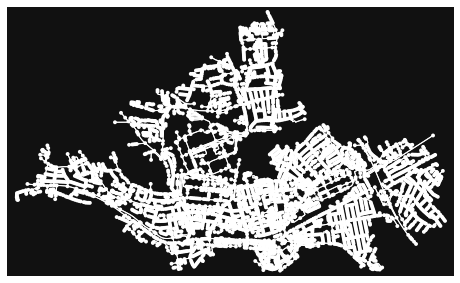

In [41]:
fig, ax = ox.plot_graph(simp_graph, edge_color='w', edge_linewidth=1, show=False, close=False)


Wall time: 4.87 s


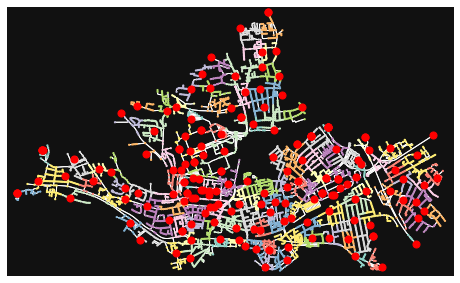

In [19]:
%%time

X = []    # collect nodes
for node in simp_graph.nodes:
    X.append((simp_graph.nodes[node]['x'],simp_graph.nodes[node]['y']))

xy = list(zip(*X))
x = xy[0]
y = xy[1]

nc = ox.plot.get_node_colors_by_attr(cluster_graph, attr='cluster', cmap='Set3')
fig, ax = ox.plot_graph(cluster_graph, node_color=nc, node_size=5, edge_color='w', edge_linewidth=1, show=False, close=False)


#gdf.plot(ax=ax, edgecolor=(1,0,0,1), facecolor=(1,0,0,.3))


#for i, l in enumerate(labels):
    
#    ax.text(x[i], y[i], s=l, c='white')
    
for mvlv_subst_loc in mvlv_subst_list:
    
    ax.scatter(mvlv_subst_loc['x'],mvlv_subst_loc['y'],s=50,c='red')

In [34]:
osmids = []

for mvstation in mvlv_subst_list:
    
    osmids.append(mvstation.get('osmid'))

In [35]:
# 345557226
osmids[0]

345557226

In [36]:
%%time

xy_list = osmids
dist = lambda p1, p2: nx.shortest_path_length(cluster_graph, p1, p2, weight='length')
dm = [[dist(p1, p2) for p2 in xy_list] for p1 in xy_list]


Wall time: 11min 23s


In [38]:
pd.DataFrame(dm)

,0,1,2,3,4,5,6,7,8,9,...,167,168,169,170,171,172,173,174,175,176
0,0.000000,3057.750803,1867.817065,2879.535268,5519.716755,4466.436230,3517.577204,3460.927663,5185.781281,1128.799001,...,5519.716755,6241.623681,1867.817065,3837.850663,1959.484508,1785.785774,2062.740498,2062.740498,2062.740498,2062.740498
1,3057.750803,0.000000,2332.617450,4402.326566,3292.344555,2457.102801,1462.806224,1817.297574,3176.447852,2175.362754,...,3292.344555,4232.290252,2332.617450,1349.710127,1602.622296,1344.659308,1845.619863,1845.619863,1845.619863,1845.619863
2,1867.817065,2332.617450,0.000000,3212.392829,4653.466449,3600.185924,2651.326899,2735.794310,4319.530976,985.429016,...,4653.466449,5375.373375,0.000000,2971.600358,1237.317746,1063.619012,942.935048,942.935048,942.935048,942.935048
3,2879.535268,4402.326566,3212.392829,0.000000,6864.292518,5811.011993,4862.152968,4805.503426,6530.357045,2473.374764,...,6864.292518,7586.199444,3212.392829,5182.426427,3304.060271,3130.361537,3407.316261,3407.316261,3407.316261,3407.316261
4,5519.716755,3292.344555,4653.466449,6864.292518,0.000000,3589.734437,2453.249734,4696.739531,4320.781434,4637.328705,...,0.000000,5376.623834,4653.466449,2373.472621,4170.048342,3912.085353,4140.184505,4140.184505,4140.184505,4140.184505
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
172,1785.785774,1344.659308,1063.619012,3130.361537,3912.085353,2858.804829,1909.945803,1747.836168,3578.149880,903.397725,...,3912.085353,4633.992280,1063.619012,2230.219262,257.962988,0.000000,998.344294,998.344294,998.344294,998.344294
173,2062.740498,1845.619863,942.935048,3407.316261,4140.184505,2965.632297,2016.773271,2321.865757,3684.977348,1180.352449,...,4140.184505,4740.819748,942.935048,2458.318414,1172.043028,998.344294,0.000000,0.000000,0.000000,0.000000
174,2062.740498,1845.619863,942.935048,3407.316261,4140.184505,2965.632297,2016.773271,2321.865757,3684.977348,1180.352449,...,4140.184505,4740.819748,942.935048,2458.318414,1172.043028,998.344294,0.000000,0.000000,0.000000,0.000000
175,2062.740498,1845.619863,942.935048,3407.316261,4140.184505,2965.632297,2016.773271,2321.865757,3684.977348,1180.352449,...,4140.184505,4740.819748,942.935048,2458.318414,1172.043028,998.344294,0.000000,0.000000,0.000000,0.000000


In [39]:
len(cluster_graph.nodes), len(cluster_graph.edges)

(5659, 12528)

In [43]:
buildings_w_loads_df.nn

-11795410      1609415255701
-11270365         3511868004
-10622846         8041997283
-10622845           70792945
-10363165          177585688
                   ...      
 743425899      846252760103
 330847907        2055806731
 330847909        2055806731
 2062268026       2055806731
 4185847129       2055806731
Name: nn, Length: 12772, dtype: int64

In [24]:
len(buildings_w_loads_df), len(buildings_w_loads_df.loc[buildings_w_loads_df.capacity < 5500]), len(buildings_w_loads_df.loc[buildings_w_loads_df.capacity > 5500])

(12772, 12765, 7)

In [21]:
buildings_w_loads_df.loc[buildings_w_loads_df.capacity < 5500].sort_values('capacity', ascending=False)


,category,area,geometry,raccordement_building,name,number_households,n_amenities_inside,osm_id_building,geometry_amenity,x,y,capacity,nn,nn_dist,nn_coords,cluster
100342458,school,85415.0000,"POLYGON ((4283083.273 2726885.506, 4283093.346...",POINT (4283152.28671644 2726804.041308777),Gemeinschaftsschule Schreienesch,1.0,1.0,NaN,NaN,4283152.286716,2726804.041309,5312.813000,188960660,33.307790,POINT (4283166.253758295 2726773.803408181),153
89309362,industrial,31325.1000,"POLYGON ((4280803.303 2727739.533, 4280813.679...",POINT (4280873.017927655 2727677.585071916),None,1.0,1.0,NaN,NaN,4280873.017928,2727677.585072,5152.978950,663643865801,54.267409,POINT (4280922.445206905 2727699.988101861),141
89371949,industrial,25327.8000,"POLYGON ((4277792.778 2728092.748, 4278005.869...",POINT (4277933.24010508 2727988.637153339),None,1.0,1.0,NaN,NaN,4277933.240105,2727988.637153,4166.423100,94779988,1027.546386,POINT (4278705.300408176 2727310.570442497),150
89309361,industrial,22860.4000,"POLYGON ((4280706.128 2727735.292, 4280735.953...",POINT (4280770.70413539 2727669.99442703),None,1.0,1.0,NaN,NaN,4280770.704135,2727669.994427,3760.535800,455640350805,38.581720,POINT (4280808.172740509 2727679.195119872),140
89309363,industrial,20814.6000,"POLYGON ((4280921.384 2727752.982, 4280940.830...",POINT (4281042.657579781 2727764.311829919),None,1.0,1.0,NaN,NaN,4281042.65758,2727764.31183,3424.001700,1269518757501,20.931968,POINT (4281032.050311864 2727782.357138211),142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126996667,place_of_worship,95.1084,"POLYGON ((4283382.189 2730773.161, 4283382.368...",POINT (4283385.915033999 2730770.307868303),None,1.0,1.0,NaN,NaN,4283385.915034,2730770.307868,0.009511,177585688,1948.572137,POINT (4281843.296583772 2729579.819863414),54
125963551,place_of_worship,92.2192,"POLYGON ((4282022.571 2728745.593, 4282025.896...",POINT (4282028.307829497 2728746.186054747),St. Blasius-Kapelle,1.0,1.0,NaN,NaN,4282028.307829,2728746.186055,0.009222,284934381901,17.575357,POINT (4282012.447704466 2728753.759006374),70
290570089,place_of_worship,88.1108,"POLYGON ((4278870.505 2728933.648, 4278874.051...",POINT (4278874.894615591 2728932.759306513),Gedenkkapelle,1.0,1.0,NaN,NaN,4278874.894616,2728932.759307,0.008811,249113245,1046.276453,POINT (4279086.343050268 2727908.072049021),4
675853367,place_of_worship,61.7612,"POLYGON ((4276788.173 2728760.272, 4276789.214...",POINT (4276791.281387898 2728760.098863105),None,1.0,1.0,NaN,NaN,4276791.281388,2728760.098863,0.006176,94779988,2400.958444,POINT (4278705.300408176 2727310.570442497),49


In [13]:
from shapely.geometry import MultiPoint, Point, shape
from grid.lv_grid.geo import get_points_in_load_area, get_convex_hull_from_points

In [14]:
# init empty stations_df
lv_stations = pd.DataFrame(columns=['la_id', 'geom'])
lv_stations.index.name = 'mvlv_subst_id'

In [29]:
# add stations for cluster load centers
last_row_ix = len(lv_stations)
for mvlv_subst_loc in mvlv_subst_list:
    
    cluster_id = mvlv_subst_loc.get('cluster')
    # TODO: check lon lat instead x, y?
    lv_stations.loc[last_row_ix+cluster_id] = [id_db, Point(mvlv_subst_loc.get('x'),mvlv_subst_loc.get('y'))]


C:\Users\Robert\anaconda3\envs\ox\lib\site-packages\pandas\core\dtypes\cast.py:881: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  element = np.asarray(element)


In [30]:
%%time

ch_polys = []

for cluster_i in range(len(mvlv_subst_list)):

    # get convex hull per cluster
    cluster_geo_list = buildings_w_loads_df.loc[buildings_w_loads_df.cluster==cluster_i].geometry.tolist()

    points = get_points_in_load_area(cluster_geo_list)

    polygon = get_convex_hull_from_points(points)
    
    ch_polys.append(polygon)

Wall time: 66.9 ms


In [31]:
lv_stations

,la_id,geom
mvlv_subst_id,,
0,5588,POINT (4282465.613186001 2732307.092790205)
1,5588,POINT (4282038.495855372 2732459.481623211)
2,5588,POINT (4282171.955938512 2732383.531130372)
3,5588,POINT (4282081.426960234 2732230.693110299)
4,5588,POINT (4282194.306077464 2732456.63506963)


In [11]:
lv_stations.head(2)

,la_id,geom
mvlv_subst_id,,
2873,2520,POINT(9.49063792246541 47.7452397283099)
3053,2728,POINT(9.49342672911522 47.7327193529698)


In [ ]:
# init empty stations_df
lv_grid_districts = pd.DataFrame(columns=['la_id', 'geom'])
lv_grid_districts.index.name = 'mvlv_subst_id'

In [12]:
lv_grid_districts.head(2)

,la_id,population,peak_load_residential,peak_load_retail,peak_load_industrial,peak_load_agricultural,peak_load,geom,sector_count_residential,sector_count_retail,sector_count_industrial,sector_count_agricultural,sector_consumption_residential,sector_consumption_retail,sector_consumption_industrial,sector_consumption_agricultural
mvlv_subst_id,,,,,,,,,,,,,,,,
419093,5372,10.0,3.493570,0.0,0.0,99.525989,103.019559,MULTIPOLYGON(((9.44476423426424 47.69930354485...,0.0,0.0,0.0,2.0,16346.482102,0.0,0.0,414070.515734
420154,4830,3.0,1.048071,0.0,0.0,0.000000,1.048071,MULTIPOLYGON(((9.49954883830014 47.68339565373...,1.0,0.0,0.0,0.0,4903.944631,0.0,0.0,0.000000


In [22]:
# update load areal peak loads in the end 
# due to residentials at feeder needs to be updated
buildings_w_loads_df.capacity.sum()

250.2653091931388

In [ ]:
# additionally for object
# lv_grid as lv_grid-Obect

# df
la_id
population
peak_load_residential
peak_load_retail
peak_load_industrial
peak_load_agricultural
peak_load
geom
sector_count_residential
sector_count_retail
sector_count_industrial
sector_count_agricultural
sector_consumption_residential
sector_consumption_retail
sector_consumption_industrial
sector_consumption_agricultural

In [15]:
# district e.g.
'id_db': 4563,
'geo_data': <shapely.geometry.multipolygon.MultiPolygon at 0x17ffc430160>,
'lv_load_area': lv_load_area_4544,
'lv_grid': lv_grid_4563,
'population': 80,
'peak_load_residential': 27.9485612387548,
'peak_load_retail': 0.0,
'peak_load_industrial': 0.0,
'peak_load_agricultural': 0.0,
'peak_load': 27.9485612387548,
'sector_count_residential': 1,
'sector_count_retail': 0,
'sector_count_industrial': 0,
'sector_count_agricultural': 0,
'sector_consumption_residential': 130771.856816184,
'sector_consumption_retail': 0.0,
'sector_consumption_industrial': 0.0,
'sector_consumption_agricultural': 0.0

,category,area,geometry,raccordement_building,name,number_households,n_amenities_inside,osm_id_building,geometry_amenity,x,y,capacity,nn,nn_dist,nn_coords
443340114,restaurant,732.547,"POLYGON ((9.483392699999998 47.70459640000707,...",POINT (9.48352605 47.70469195000704),Sportplatz-Restaurant,1.0,1.0,301431136.0,0101000020e6100000c3d3861e8cf72240da9a83ea30da...,9.483526,47.704692,67.035376,443338172,29.025206,POINT (9.483255199999999 47.70450509625661)


In [ ]:
# todo check if truncate creates subgrpahs
# if len(subgraphs) > 1:
    # there are unconnected subgraphs
    # then for each subgraph
        # cluserting
        # for each cluster
            # build lv_grid_district

### Clustering

In [27]:
n_clusters = get_n_cluster(buildings_w_loads_df)
if n_clusters < len(fn_fallenbrunnen_la._lv_grid_districts):
    n_clusters = len(fn_fallenbrunnen_la._lv_grid_districts)
buildings_w_loads_df = cluster_k_means(buildings_w_loads_df, n_clusters)

In [29]:
n_clusters

3

### Update and add _districts

In [30]:
for i in range(n_clusters):
    
    print(len(buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==i)]))


99
85
79


In [28]:
buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0)]

,category,capacity,area,number_households,x,y,geometry,raccordement,nn,nn_dist,Cluster
osm_id,,,,,,,,,,,
8598838279,ice_cream,20.966863,229.121,0.645161,9.437183,47.674769,"POLYGON ((9.437094099999998 47.67477800001394,...",POINT (9.437183076702567 47.67476938145773),475940044,19.021132,0
144020300,public_building,244.695822,2113.09,0.8125,9.438239,47.675506,"POLYGON ((9.437905999999998 47.67551250001376,...",POINT (9.438238891069723 47.67550616796044),1576023053,34.831012,0
144023114,school,102.108142,1641.61,0.552632,9.438521,47.673818,"POLYGON ((9.438203599999998 47.67375600001416,...",POINT (9.438521488700175 47.67381754064048),68844093,33.677840,0
314909001,residential,1.246721,100,0.72973,9.43711,47.674319,"POLYGON ((9.4370154 47.67431780001401, 9.43711...",POINT (9.437109750000001 47.67431900001404),2080880814,14.638173,0
314909020,house,1.102239,100,0.645161,9.437548,47.674401,"POLYGON ((9.4374646 47.674413400014, 9.4375446...",POINT (9.437548450000001 47.67440130001403),314975344,15.374000,0
...,...,...,...,...,...,...,...,...,...,...,...
314913916,residential,2.904399,100,1.7,9.436301,47.672468,"POLYGON ((9.436173800000001 47.67246730001447,...",POINT (9.436301343479869 47.67246766666069),311379901,30.431139,0
338514542,school,407.558658,6552.39,0.594203,9.438414,47.673881,"POLYGON ((9.437957300000001 47.67387860001414,...",POINT (9.438414351486788 47.67388107322754),68844093,31.901109,0
401560706,residential,1.102239,100,0.645161,9.43769,47.674448,"POLYGON ((9.4376228 47.674467300014, 9.4377058...",POINT (9.437690147469656 47.67444791593603),314975344,27.030240,0


In [16]:
%%time

geometry = buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0), 'geometry'].tolist()

points = get_points_in_load_area(geometry)
        
len(points)

Wall time: 9.38 ms


140

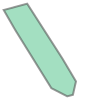

In [17]:
get_convex_hull_from_points(points)

In [24]:
fn_fallenbrunnen_la.lv_load_area_group.__dict__

{'id_db': 20,
 'mv_grid_district': mv_grid_district_40,
 '_lv_load_areas': [lv_load_area_4544,
  lv_load_area_4545,
  lv_load_area_4548,
  MVCableDist_mvgd_40_26],
 'peak_load': 65.35928151751943,
 'branch_length_sum': 0,
 'peak_load_max': 1000.0,
 'branch_length_max': 2000.0,
 'root_node': MVCableDist_mvgd_40_23}

In [28]:
nd._mv_grid_districts[0].__dict__

{'id_db': 40,
 'mv_grid': mv_grid_40,
 '_lv_load_areas': [lv_load_area_2128,
  lv_load_area_2292,
  lv_load_area_2383,
  lv_load_area_2520,
  lv_load_area_2521,
  lv_load_area_2561,
  lv_load_area_2608,
  lv_load_area_2625,
  lv_load_area_2633,
  lv_load_area_2705,
  lv_load_area_2728,
  lv_load_area_2763,
  lv_load_area_2765,
  lv_load_area_2840,
  lv_load_area_2842,
  lv_load_area_3029,
  lv_load_area_3088,
  lv_load_area_3089,
  lv_load_area_3119,
  lv_load_area_3160,
  lv_load_area_3235,
  lv_load_area_3277,
  lv_load_area_3304,
  lv_load_area_3305,
  lv_load_area_3307,
  lv_load_area_3311,
  lv_load_area_3314,
  lv_load_area_3403,
  lv_load_area_3413,
  lv_load_area_3645,
  lv_load_area_3661,
  lv_load_area_3731,
  lv_load_area_3780,
  lv_load_area_3805,
  lv_load_area_3911,
  lv_load_area_3986,
  lv_load_area_3987,
  lv_load_area_3992,
  lv_load_area_4212,
  lv_load_area_4337,
  lv_load_area_4347,
  lv_load_area_4487,
  lv_load_area_4488,
  lv_load_area_4544,
  lv_load_area_4545,

In [17]:
fn_fallenbrunnen_la._lv_grid_districts[0].lv_grid._station.__dict__

{'id_db': 4563,
 'geo_data': <shapely.geometry.point.Point at 0x118800eba90>,
 'grid': lv_grid_4563,
 '_transformers': [Transformer_lv_grid_4563_1],
 'v_level_operation': None,
 'lv_load_area': lv_load_area_4544,
 'voltage_res': [0.9897135909377942, 1.0123145234795161]}

In [17]:
preprocessed_clusters = []   
    

for cluster_id in range(n_clusters):
    
    if cluster_id < len(fn_fallenbrunnen_la._lv_grid_districts):
        
        print('delete or update _lv_grid_districts[', cluster_id, ']')
        
        # GET NEW VALUES FOR DISTRICT        
        # get convex hull of cluster
        points = get_points_in_load_area(buildings_w_loads_df.loc[buildings_w_loads_df['Cluster']==cluster_id])
        district_convex_hull = get_convex_hull_from_points(points)
        
        # get location of substation for cluster
        station_x, station_y = get_location_substation_at_pi(graph, buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0)])

        
        # UPDATE VALUES
        # update values of _lv_grid_districts[cluster_id]
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].geo_data  = district_convex_hull
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].poulation = buildings_w_loads_df.loc[buildings_w_loads_df['Cluster']==cluster_id]['number_households'].sum()
        
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].peak_load = buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==0)]['capacity'].sum()
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].peak_load_residential = buildings_w_loads_df.loc[(buildings_w_loads_df['Cluster']==cluster_id) & buildings_w_loads_df['number_households'] > 0]['capacity'].sum()
        
        
        # ADD / RESET DING0 ELEMENTS
        # update position of substation
        fn_fallenbrunnen_la._lv_grid_districts[0].lv_grid._station.geo_data = get_Point_from_x_y(station_x, station_y)
        
        # reset list to add new elements
        fn_fallenbrunnen_la._lv_grid_districts[cluster_id].lv_grid._station.transformers.clear()
        
        
        # update trafo and loads
        #fn_fallenbrunnen_la._lv_grid_districts[cluster_id].lv_grid.build_grid()
        
        
    else:
        
        print('add _lv_grid_districts id', cluster_id)
        
        
        
        
        
    break
    

update _lv_grid_districts 0
add _lv_grid_districts id 1
add _lv_grid_districts id 2


In [21]:
fn_fallenbrunnen_la._lv_grid_districts[0].lv_grid._station.__dict__

{'id_db': 4563,
 'geo_data': <shapely.geometry.point.Point at 0x1d50cd257f0>,
 'grid': lv_grid_4563,
 '_transformers': [Transformer_lv_grid_4563_1],
 'v_level_operation': None,
 'lv_load_area': lv_load_area_4544,
 'voltage_res': [0.9897135909377942, 1.0123145234795161]}

In [19]:
#lv_district_of_interest.lv_grid.graph_draw(mode='LV')

In [16]:
lv_district_of_interest.lv_grid.__dict__ # .geo_data.wkt

NameError: name 'lv_district_of_interest' is not defined

In [19]:
from sklearn.cluster import AgglomerativeClustering
import numpy as np

In [20]:
X = []    # collect nodes

for node in graph.nodes:

    X.append([graph.nodes[node]['X'], graph.nodes[node]['Y']])
    
    
X = np.array(X)



# clustering

adj_mat_sparse = nx.adjacency_matrix(graph, weight='length')

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=adj_mat_sparse).fit(X)






# assign cluster labels

i_label = 0

for node in list(graph.nodes):

    graph.nodes[node]['cluster'] = clustering.labels_[i_label]
    
    i_label += 1
    
labels = nx.get_node_attributes(graph, 'cluster') 

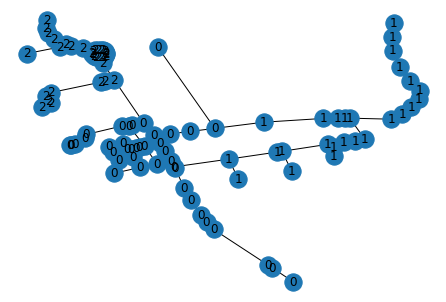

In [23]:
nx.draw(graph, node_coords_dict,labels=labels)

In [24]:
X = []    # collect nodes

for node in graph.nodes:

    X.append([graph.nodes[node]['X'], graph.nodes[node]['Y']])
    
    
X = np.array(X)



# clustering

adj_mat_sparse = nx.to_numpy_matrix(graph, weight='length')

clustering = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward', connectivity=adj_mat_sparse).fit(X)






# assign cluster labels

i_label = 0

for node in list(graph.nodes):

    graph.nodes[node]['cluster'] = clustering.labels_[i_label]
    
    i_label += 1
    
labels = nx.get_node_attributes(graph, 'cluster') 

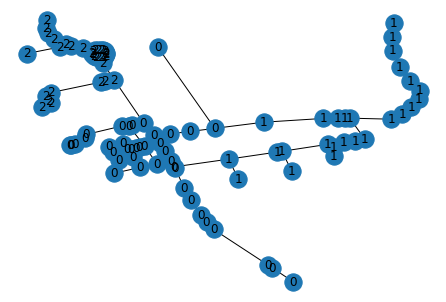

In [25]:
nx.draw(graph, node_coords_dict,labels=labels)